In [186]:
# In the end we will create a requirements.txt file with all the libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [187]:
df = pd.read_csv(r"EHIS_2019_IT\MICRODATI\EHIS_Microdati_2019.txt", sep='\t', encoding='utf-8')
print("Shape:", df.shape)

Shape: (45930, 244)


In [188]:
df.head(5)

PID2  HHID2       WGT  PROXY  INTMETHOD  SEX  AGE_CLA75 COUNTRY  REG  RIP  \
0     1      1  1054.076      1         20    1          6      IT   10    1   
1     2      1  1054.076      1         20    2          6      IT   10    1   
2     3      2  1264.041      1         20    2          7      IT   10    1   
3     4      2  1264.041      1         20    1          4      IT   10    1   
4     5      2  1264.041      1         20    1          1      IT   10    1   

   ...  PROBF5  PROBF6  ASS_SAN  COLF  BABYS  ASSIST  HCOLF  HBABYS  HASSIST  \
0  ...       2       2        1     2      2       2     -2      -2       -2   
1  ...       2       2        1     2      2       2     -2      -2       -2   
2  ...       2       2        1     2      2       2     -2      -2       -2   
3  ...       2       2        1     2      2       2     -2      -2       -2   
4  ...       2       2        1     2      2       2     -2      -2       -2   

   RISECO  
0       2  
1       2  
2       3  
3       3  
4       3  

[5 rows x 244 columns]

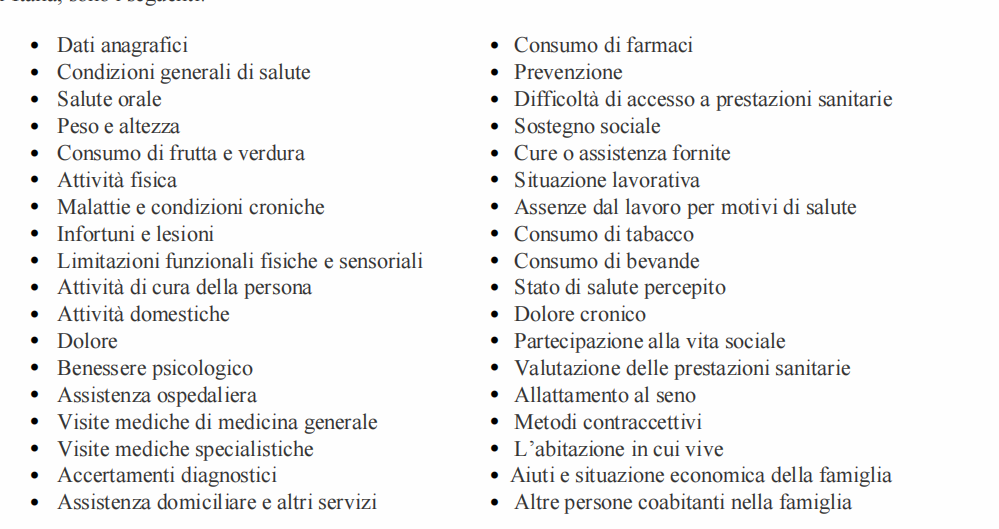

In [189]:
# df to csv
#df.to_csv(r"EHIS_2019_IT\MICRODATI\EHIS_Microdati_2019.csv", index=False, encoding='utf-8')

In [190]:
# Nomi colonne
print(df.columns.tolist())
# for each col visualize datatype, for readability not on \n but on the same row
for col in df.columns:
    print(f"{col}: {df[col].dtype}", end=", ")

['PID2', 'HHID2', 'WGT', 'PROXY', 'INTMETHOD', 'SEX', 'AGE_CLA75', 'COUNTRY', 'REG', 'RIP', 'BIRTHPLACE2', 'CITIZEN2', 'BIRTHPLACEFATH2', 'BIRTHPLACEMOTH2', 'HATLEVEL4', 'MAINSTAT', 'POSIZ', 'MARSTALEGAL', 'HHNBPERS', 'HHNBPERS_0_13', 'HHTYPE', 'RELPAR', 'TIPNU2', 'NUMNU2', 'RPNUC2', 'HHINCOME', 'REDPR', 'HS1', 'HS2', 'HS3', 'CD1A', 'CD1a1', 'CD1B', 'CD1b1', 'CD1C', 'CD1c1', 'CD1D', 'CD1d1', 'CD1E', 'CD1e1', 'CUORE', 'CUORE1', 'CD1F', 'CD1f1', 'CD1G', 'CD1g1', 'CD1H', 'CD1h1', 'CD1I', 'CD1i1', 'CD1J', 'CD1j1', 'CD1K', 'CD1k1', 'CD1L', 'CD1l1', 'CD1M', 'CD1m1', 'CD1N', 'CD1n1', 'INREN', 'INREN1', 'CD1O', 'CD1o1', 'CD1P', 'CD1p1', 'ANSIA', 'ANSIA1', 'TUMOR', 'TUMOR1', 'ALZH', 'ALZH1', 'PARKIN', 'PARKIN1', 'ALTCRO', 'ALTCRO1', 'CD2', 'AC1A', 'AC1AN', 'AC1B', 'AC1BN', 'AC1C', 'AC1cN', 'AC2', 'AW1', 'AW2', 'PL1', 'PL2', 'PL3', 'PL4', 'PL5', 'PL6', 'PL7', 'PL8', 'PL9', 'PC1A', 'PC1B', 'PC1C', 'PC1D', 'PC1E', 'PC2', 'PC21AB', 'PC21CEF', 'PC21D', 'PC21G', 'PC3', 'PC45', 'HA1A', 'HA1B', 'HA1C',

In [191]:
# Column names are quite vague, on ISTAT website there is a file with the description of the variables, we use mapping to add a brief description to the columns
with open(r"C:\Users\emanu\SL_ISTAT\Lista delle variabili ISTAT.txt", encoding="utf-8") as f:
    descrizioni = [line.strip() for line in f.readlines()]

print("N colonne nel DataFrame:", len(df.columns))
print("N descrizioni nel file ISTAT:", len(descrizioni))
# n rows match so we can procede

N colonne nel DataFrame: 244
N descrizioni nel file ISTAT: 244


In [192]:
mappa_variabili = list(zip(df.columns, descrizioni))

# check if the number of columns and descriptions match
for nome, descrizione in mappa_variabili[:15]:
    print(f"{nome} → {descrizione}")

# Luckily it does, seams like the columns are in the same order as the descriptions in the file

PID2 → Numero identificativo del rispondente
HHID2 → Numero identificativo della famiglia
WGT → Peso di riporto all'universo
PROXY → Risposta proxy
INTMETHOD → Metodo dell'intervista
SEX → Sesso
AGE_CLA75 → Classe di et
COUNTRY → Paese di residenza
REG → Regione
RIP → Ripartizione geografica
BIRTHPLACE2 → Paese di nascita
CITIZEN2 → Cittadinanza
BIRTHPLACEFATH2 → Paese di nascita del padre
BIRTHPLACEMOTH2 → Paese di nascita della madre
HATLEVEL4 → Titolo di studio


In [193]:
df_mapping = pd.DataFrame({
    "Nome_colonna": df.columns,
    "Descrizione_ISTAT": descrizioni
})

output_path = "Mapping_variabili_EHIS_2019.xlsx"
df_mapping.to_excel(output_path, index=False)
print(f"File salvato in: {output_path}")

File salvato in: Mapping_variabili_EHIS_2019.xlsx


We have a lot of variables so it's quite confusing to look at those alltogether, I want to divide them in MacroThemes to allow us to divide our research into topics and maybe perform some cool things later :)

In [194]:
def tema(desc):
    desc = desc.lower()

    # ANAGRAFICA E CONTESTO FAMILIARE
    if any(k in desc for k in [
        'identificativo', 'sesso', 'classe di et', 'paese di residenza', 'regione', 'ripartizione geografica',
        'paese di nascita', 'cittadinanza', 'padre', 'madre', 'stato civile',
        'numero componenti', 'tipo di famiglia', 'relazione di parentela', 'tipo di nucleo',
        'figli', 'allattamento'
    ]):
        return "Anagrafica e contesto familiare"

    # CONDIZIONE SOCIO-ECONOMICA
    if any(k in desc for k in [
        'titolo di studio', 'condizione professionale', 'posizione nella professione',
        'quinti di reddito', 'fonte principale di reddito',
        'colf', 'baby sitter', 'spese abitazione', 'ore settimanali', 'persona che assiste'
    ]):
        return "Condizione socio-economica"

    # SALUTE PERCEPITA
    if 'giudizio sullo stato di salute' in desc or 'salute in generale' in desc or 'salute dei suoi denti' in desc:
        return "Salute percepita"

    # CONDIZIONI CRONICHE E LIMITAZIONI
    if 'croniche:' in desc or 'diagnosticata da un medico' in desc or 'limitazioni che durano' in desc:
        return "Condizioni croniche e limitazioni"

    # INFORTUNI E ASSENZE
    if any(k in desc for k in ['incidente', 'infortunio', 'assenze dal lavoro', 'giorni di assenza']):
        return "Infortuni e assenze"

    # LIMITAZIONI FUNZIONALI E AUTONOMIA
    if any(k in desc for k in ['difficoltà', 'aiuto', 'ausili', 'cura della persona', 'attività domestiche']):
        return "Limitazioni funzionali e autonomia"

    # ACCESSO AI SERVIZI SANITARI
    if any(k in desc for k in [
        'visita', 'cure mediche', 'dentista', 'medico di famiglia', 'specialistica',
        'prenotare', 'lista d attesa', 'spesa', 'assistenza domiciliare',
        'accertamenti diagnostici', 'vaccino', 'farmaci prescritti', 'rinuncia'
    ]):
        return "Accesso ai servizi sanitari"

    # SALUTE MENTALE
    if any(k in desc for k in [
        'depressione', 'ansia', 'scarso interesse', 'sentirsi giù', 'agitazione',
        'energia', 'concentrarsi', 'fallimento', 'problemi ad addormentarsi', 'scarsa opinione di sé'
    ]):
        return "Salute mentale"

    # STILI DI VITA
    if any(k in desc for k in [
        'attività fisica', 'cammina', 'bicicletta', 'sport', 'tempo libero',
        'potenziare i muscoli', 'seduto', 'frutta', 'verdura', 'bevande zuccherate',
        'sigarette', 'fumatore', 'fumo', 'sigaretta elettronica', 'acqua', 'appetito'
    ]):
        return "Stili di vita"

    # SUPPORTO SOCIALE E CAREGIVING
    if any(k in desc for k in [
        'persone vicine', 'attenti a quello che le accade', 'aiuto pratico dai vicini',
        'si prende cura', 'assiste', 'ore a settimana'
    ]):
        return "Supporto sociale e caregiving"

    # CONDIZIONI ABITATIVE
    if any(k in desc for k in [
        'abitazione', 'stanze', 'piano', 'scale', 'ascensore', 'spese abitazione',
        'muffe', 'umidità', 'cattive condizioni'
    ]):
        return "Condizioni abitative"

    # METODO E RILEVAZIONE
    if any(k in desc for k in ['proxy', 'intervista', 'metodo']):
        return "Metodo e rilevazione"

    # TECNICO / PONDERAZIONE
    if any(k in desc for k in ['peso']):
        return "Tecnico / ponderazione"

    return "Altro / Da rivedere"


df_mapping["Tema"] = df_mapping["Descrizione_ISTAT"].apply(tema)

output_path = "Mapping_variabili_EHIS_2019.xlsx"
# we save on same excel file but on a different sheet
with pd.ExcelWriter(output_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_mapping.to_excel(writer, sheet_name="Mapping con Tema", index=False)


This Mapping helped us to gave a general overview of the main themes of our variables, ofc since it's based on keywords it might have some mistake due to context so we review the mapping manually on excel and eventually change something if it's not how we like it, I report those here to allow reproducibility, so if by mistake we rerun the whole things we are not gonna lose all the hardwork done :(

In [195]:
# Manual dictionary to override the tema for some rows that are not correctly classified by the function (Altro / Da rivedere)
override_temi = {

    "HHNBPERS_0_13": "Anagrafica e contesto familiare",
    "NUMNU2": "Anagrafica e contesto familiare",
    "RPNUC2": "Anagrafica e contesto familiare",
    "HS2": "Condizioni croniche e limitazioni",
    "AC1AN": "Infortuni e assenze",
    "AC1BN": "Infortuni e assenze",
    "AC1cN": "Infortuni e assenze",
    "PL1": "Vista / Udito",
    "PL2": "Vista / Udito",
    "PL3": "Vista / Udito",
    "PL4": "Vista / Udito",
    "PL5": "Vista / Udito",
    "PL8": "Limitazioni funzionali e autonomia",
    "PL9": "Limitazioni funzionali e autonomia",
    "PC1A": "Limitazioni funzionali e autonomia",
    "PC1B": "Limitazioni funzionali e autonomia",
    "PC1C": "Limitazioni funzionali e autonomia",
    "PC1D": "Limitazioni funzionali e autonomia",
    "PC1E": "Limitazioni funzionali e autonomia",
    "PC45": "Limitazioni funzionali e autonomia",
    "HA1A": "Limitazioni funzionali e autonomia",
    "HA1B": "Limitazioni funzionali e autonomia",
    "HA1C": "Limitazioni funzionali e autonomia",
    "HA1D": "Limitazioni funzionali e autonomia",
    "HA1E": "Limitazioni funzionali e autonomia",
    "HA1F": "Limitazioni funzionali e autonomia",
    "HA1G": "Limitazioni funzionali e autonomia",
    "HA45": "Limitazioni funzionali e autonomia",
    "PN1": "Salute percepita",
    "PN2": "Salute percepita",
    "MH1A": "Salute percepita",
    "MH1B": "Salute percepita",
    "MH1C": "Salute percepita",
    "MH1D": "Salute percepita",
    "MH1E": "Stili di vita",
    "MH1F": "Salute mentale",
    "MH1G": "Salute mentale",
    "MH1H": "Salute mentale",
    "HO12": "Accesso ai servizi sanitari",
    "AM1": "Accesso ai servizi sanitari",
    "LAVDEN": "Stili di vita",
    "DOVEDENT": "Accesso ai servizi sanitari",
    "VVIC": "Accesso ai servizi sanitari",
    "VECO1": "Accesso ai servizi sanitari",
    "VFID": "Accesso ai servizi sanitari",
    "AM6A": "Accesso ai servizi sanitari",
    "AM6B": "Accesso ai servizi sanitari",
    "AM64": "Accesso ai servizi sanitari",
    "AECO1": "Accesso ai servizi sanitari",
    "AFID": "Accesso ai servizi sanitari",
    "MD1": "Accesso ai servizi sanitari",
    "MD2": "Accesso ai servizi sanitari",
    "PA2": "Accesso ai servizi sanitari",
    "PA3": "Accesso ai servizi sanitari",
    "PA4": "Accesso ai servizi sanitari",
    "PA5": "Accesso ai servizi sanitari",
    "PA6": "Accesso ai servizi sanitari",
    "PA7": "Accesso ai servizi sanitari",
    "MAMSINT": "Accesso ai servizi sanitari",
    "INDMAM": "Accesso ai servizi sanitari",
    "CETAMAM": "Accesso ai servizi sanitari",
    "NMAMMO": "Accesso ai servizi sanitari",
    "PA8": "Accesso ai servizi sanitari",
    "PA89": "Accesso ai servizi sanitari",
    "CETAPAPH": "Accesso ai servizi sanitari",
    "NPAPHPV": "Accesso ai servizi sanitari",
    "UN1A": "Accesso ai servizi sanitari",
    "UN1B": "Accesso ai servizi sanitari",
    "BMI_CLASS": "Stili di vita",
    "PE1": "Stili di vita",
    "PE8": "Stili di vita",
    "DH6": "Stili di vita",
    "FUMO": "Stili di vita",
    "SK4_CL": "Stili di vita",
    "CETAFU": "Stili di vita",
    "ABUSO": "Stili di vita",
    "RISCHIO": "Stili di vita",
    "SS1": "Stili di vita",
    "SS3": "Supporto sociale e caregiving",
    "PROBF4": "Condizioni abitative",
    "ASS_SAN": "Condizione socio-economica",
    "COLF": "Condizioni abitative",
    "RISECO": "Condizione socio-economica",
}

df_mapping["Tema"] = df_mapping.apply(
    lambda row: override_temi.get(row["Nome_colonna"], row["Tema"]),
    axis=1
)
df_mapping.to_excel(output_path, sheet_name="Mapping con Tema", index=False)
print(f"File aggiornato e salvato in: {output_path}")

File aggiornato e salvato in: Mapping_variabili_EHIS_2019.xlsx


Yeah this took a lot but it's complitely worth it

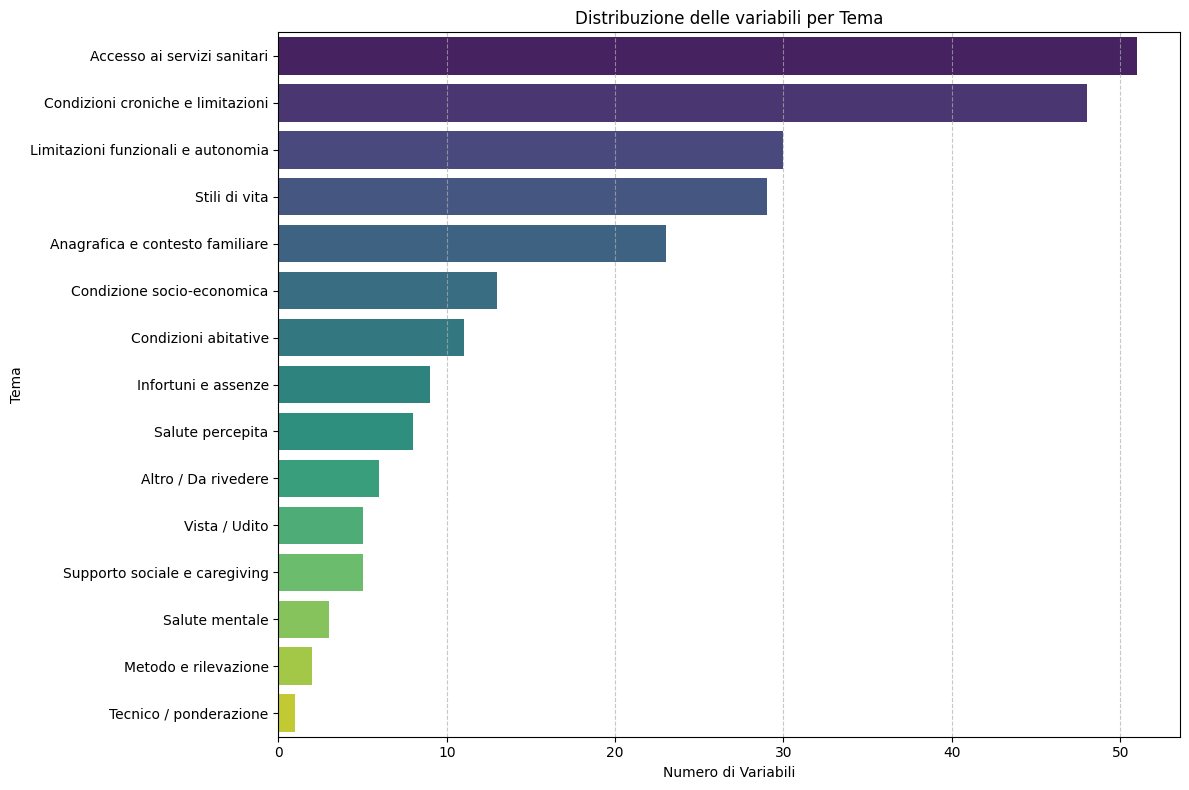

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

tema_counts = df_mapping['Tema'].value_counts().reset_index()
tema_counts.columns = ['Tema', 'Count']

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=tema_counts, y='Tema', x='Count', hue='Tema', palette='viridis', dodge=False, legend=False)
plt.title('Distribuzione delle variabili per Tema')
plt.xlabel('Numero di Variabili')
plt.ylabel('Tema')
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


Just to clarify, crawling between 244 variable it's quite a challenge, this first division allowed us to divide more or less the variables into meaningfull topics, leading to a partial anlysis in subgroup, easier and more efficient

In [197]:
def extract_df_by_tema(df, df_mapping, tema):
    colonne_tema = df_mapping[df_mapping["Tema"] == tema]["Nome_colonna"].tolist()
    colonne_presenti = [col for col in colonne_tema if col in df.columns]
    return df[colonne_presenti]


In [198]:
# dataset vuoto a cui ci aggiungo le variabili che creo
df_finale = pd.DataFrame()

### Some adjustment on themes
Made while working on the themes itself

In [199]:
# HATLEVEL4 to condizione socio-economica
# HS1 from salute percepita to condizioni croniche e limitazioni
# CD2 in Accesso ai servizi sanitari

# Tecnico / Ponderazione

In [200]:
tema_scelto = "Tecnico / ponderazione"
df_tema_tecnico_ponderazione = extract_df_by_tema(df, df_mapping, tema_scelto)
df_tema_tecnico_ponderazione.head()

WGT
0  1054.076
1  1054.076
2  1264.041
3  1264.041
4  1264.041

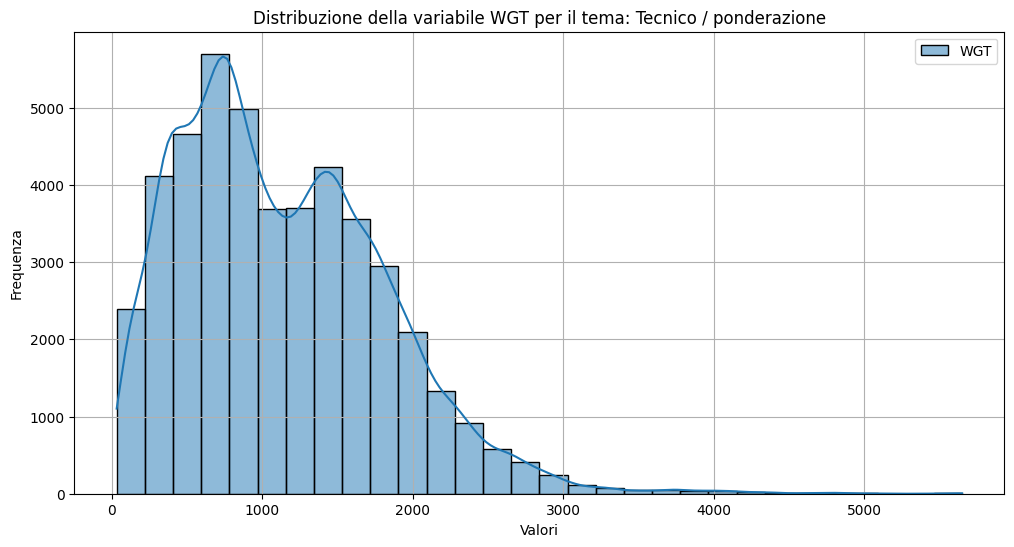

In [201]:
# show distributtion
plt.figure(figsize=(12, 6))
sns.histplot(df_tema_tecnico_ponderazione, kde=True, bins=30)
plt.title(f'Distribuzione della variabile WGT per il tema: {tema_scelto}')
plt.xlabel('Valori')
plt.ylabel('Frequenza')
plt.grid(True)
plt.show()

In [202]:
# add to df_finale
df_finale = pd.concat([df_finale, df_tema_tecnico_ponderazione], axis=1)

# Metodo e Rilevazione

In [203]:
tema_scelto = "Metodo e rilevazione"
df_tema_metodo_rilevazione = extract_df_by_tema(df, df_mapping, tema_scelto)
df_tema_metodo_rilevazione.head()

PROXY  INTMETHOD
0      1         20
1      1         20
2      1         20
3      1         20
4      1         20

In [204]:
df_tema_metodo_rilevazione['PROXY'].value_counts()
# convert into 0 1
df_tema_metodo_rilevazione['PROXY'] = df_tema_metodo_rilevazione['PROXY'].replace({
    1: 1,  # intervista diretta
    2: 0  # intervista proxy
})

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\7032365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tema_metodo_rilevazione['PROXY'] = df_tema_metodo_rilevazione['PROXY'].replace({


Codifica se la risposta è stata fornita direttamente o da un altro membro (proxy interview) → condiziona la qualità dei dati

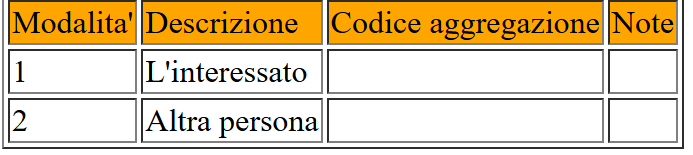

In [205]:
df_tema_metodo_rilevazione['INTMETHOD'].value_counts()
# Face-to-face, non-electronic version 

INTMETHOD
20    45930
Name: count, dtype: int64

In [206]:
# we have only one value for this column, so we can drop it
df_tema_metodo_rilevazione = df_tema_metodo_rilevazione.drop(columns=['INTMETHOD'])

In [207]:
# add to df_finale
df_finale = pd.concat([df_finale, df_tema_metodo_rilevazione], axis=1)

### Focus Proxy

In [208]:
# seleziona solo le colonne che contengono con proxy = 1
df_finale_proxy = df[df['PROXY'] == 2]
# df_finale_proxy.head()
df_finale_proxy.shape

(6579, 244)

In [209]:
# df_finale_proxy['DH1'].value_counts()
# df_finale_proxy['PN1'].value_counts()
# Some -3 on variables are still present, we cannot just remove Proxy = 2 to deal with this

# Anagrafica e contesto familiare

In [210]:
tema_scelto = "Anagrafica e contesto familiare"
df_tema_anagrafe_famiglia = extract_df_by_tema(df, df_mapping, tema_scelto)
df_tema_anagrafe_famiglia.head()

PID2  HHID2  SEX  AGE_CLA75 COUNTRY  REG  RIP  BIRTHPLACE2  CITIZEN2  \
0     1      1    1          6      IT   10    1           20        20   
1     2      1    2          6      IT   10    1           20        20   
2     3      2    2          7      IT   10    1           20        20   
3     4      2    1          4      IT   10    1           20        20   
4     5      2    1          1      IT   10    1           10        20   

   BIRTHPLACEFATH2  ...  HHNBPERS_0_13  HHTYPE  RELPAR  TIPNU2  NUMNU2  \
0               20  ...              0       4       1       1       1   
1               20  ...              0       4       2       1       1   
2               20  ...              0       3       1       2       1   
3               20  ...              0       3       2       2       1   
4               20  ...              0       3       6       2       1   

   RPNUC2  FIGLI_N  ALSENO  DALSENO  DALLESC  
0       2       -2      -2       -2       -2  
1       1        2      -2       -2       -2  
2       1       -2      -2       -2       -2  
3       2       -2      -2       -2       -2  
4       3       -2      -2       -2       -2  

[5 rows x 23 columns]

In [211]:
df_tema_anagrafe_famiglia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45930 entries, 0 to 45929
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PID2             45930 non-null  int64 
 1   HHID2            45930 non-null  int64 
 2   SEX              45930 non-null  int64 
 3   AGE_CLA75        45930 non-null  int64 
 4   COUNTRY          45930 non-null  object
 5   REG              45930 non-null  int64 
 6   RIP              45930 non-null  int64 
 7   BIRTHPLACE2      45930 non-null  int64 
 8   CITIZEN2         45930 non-null  int64 
 9   BIRTHPLACEFATH2  45930 non-null  int64 
 10  BIRTHPLACEMOTH2  45930 non-null  int64 
 11  MARSTALEGAL      45930 non-null  int64 
 12  HHNBPERS         45930 non-null  int64 
 13  HHNBPERS_0_13    45930 non-null  int64 
 14  HHTYPE           45930 non-null  int64 
 15  RELPAR           45930 non-null  int64 
 16  TIPNU2           45930 non-null  int64 
 17  NUMNU2           45930 non-null

### Household info (Nucleo Familiare)

In [212]:
print("Unique PID2 count:", df_tema_anagrafe_famiglia['PID2'].nunique())
# identificativo univoco dell’individuo
print("Unique HHID2 count:", df_tema_anagrafe_famiglia['HHID2'].nunique())
# identificativo univoco della famiglia di fatto (ff)

Unique PID2 count: 45930
Unique HHID2 count: 22792


In [213]:
household_df = df_tema_anagrafe_famiglia[['HHID2', 'PID2']]
household_sizes = household_df.groupby('HHID2').size().reset_index(name='HouseholdSize')

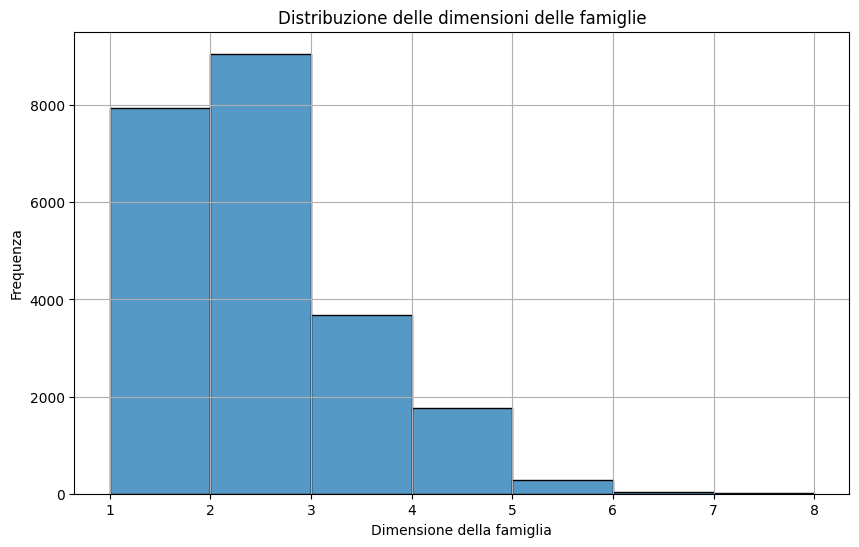

In [214]:
plt.figure(figsize=(10, 6))
sns.histplot(household_sizes['HouseholdSize'], bins=range(1, household_sizes['HouseholdSize'].max() + 2), kde=False)
plt.title('Distribuzione delle dimensioni delle famiglie')
plt.xlabel('Dimensione della famiglia')
plt.ylabel('Frequenza')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [215]:
# PID2 behave like the index + 1, we can remove it
df_tema_anagrafe_famiglia = df_tema_anagrafe_famiglia.drop(columns=['PID2'])
df = df.drop(columns=['PID2'])

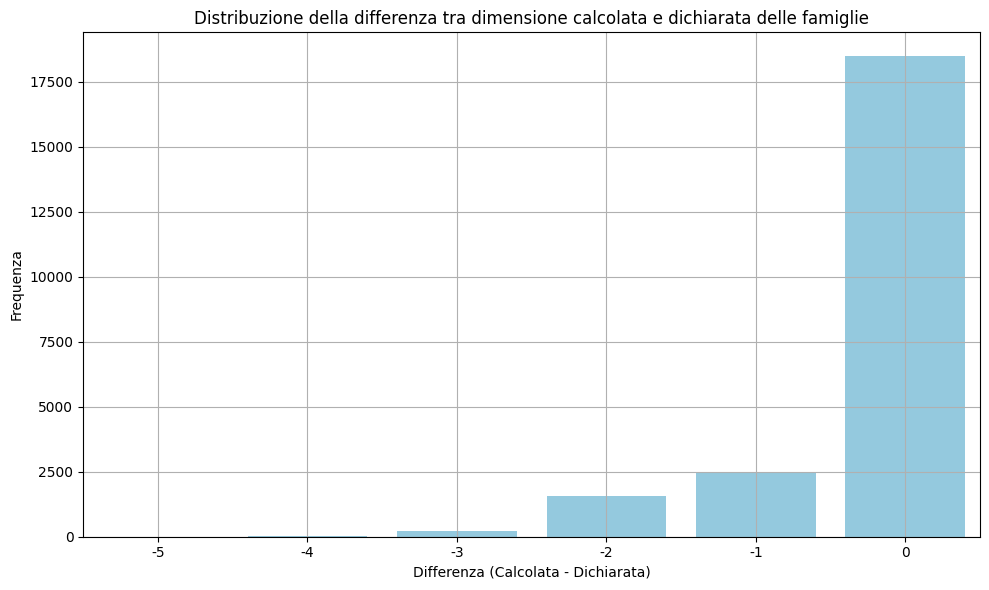


Distribuzione 'Differenza (Calcolata - Dichiarata)':
18484

Distribuzione 'ExplainedByChildren':
ExplainedByChildren
True     22059
False      733
Name: count, dtype: int64


In [216]:
df_household_check = df_tema_anagrafe_famiglia[['HHID2', 'HHNBPERS', 'HHNBPERS_0_13']] # Var n° 19-20
computed_sizes = df_household_check.groupby('HHID2').size().reset_index(name='ComputedSize')
reported_sizes = df_household_check.drop_duplicates(subset='HHID2')[['HHID2', 'HHNBPERS', 'HHNBPERS_0_13']]
size_comparison = pd.merge(computed_sizes, reported_sizes, on='HHID2')

size_comparison['Difference'] = size_comparison['ComputedSize'] - size_comparison['HHNBPERS']
size_comparison['ExplainedByChildren'] = (size_comparison['Difference'] + size_comparison['HHNBPERS_0_13']) == 0
diff_counts = size_comparison['Difference'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=diff_counts.index, y=diff_counts.values, color='skyblue')
plt.title('Distribuzione della differenza tra dimensione calcolata e dichiarata delle famiglie')
plt.xlabel('Differenza (Calcolata - Dichiarata)')
plt.ylabel('Frequenza')
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nDistribuzione 'Differenza (Calcolata - Dichiarata)':")
print(size_comparison['Difference'].value_counts().get(0, 0))  
print("\nDistribuzione 'ExplainedByChildren':")
print(size_comparison['ExplainedByChildren'].value_counts())



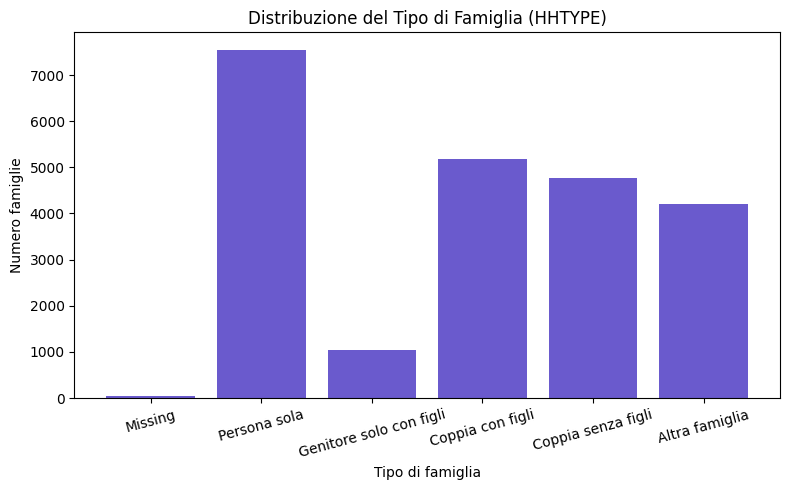

In [217]:
hhtype_labels = {
    -1: "Missing",
    1: "Persona sola",
    2: "Genitore solo con figli",
    3: "Coppia con figli",
    4: "Coppia senza figli",
    5: "Altra famiglia"
}

# Estrai una riga per famiglia
df_fam_types = df_tema_anagrafe_famiglia[['HHID2', 'HHTYPE']].drop_duplicates(subset='HHID2')

# Conta e mappa le etichette
hhtype_counts = df_fam_types['HHTYPE'].value_counts().sort_index()
labels = [hhtype_labels.get(code, str(code)) for code in hhtype_counts.index]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(labels, hhtype_counts.values, color='slateblue')
plt.title("Distribuzione del Tipo di Famiglia (HHTYPE)")
plt.xlabel("Tipo di famiglia")
plt.ylabel("Numero famiglie")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



In [218]:
hhtype_counts

HHTYPE
-1      52
 1    7548
 2    1038
 3    5181
 4    4763
 5    4210
Name: count, dtype: int64

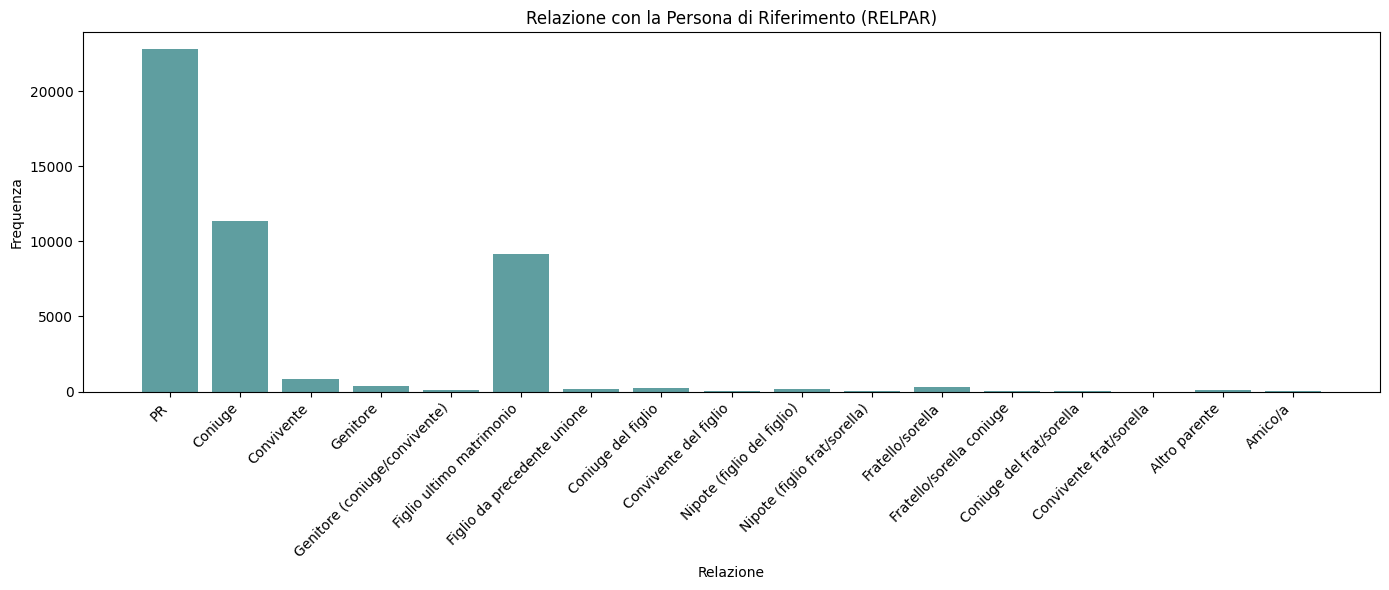

In [219]:
relpar_labels = {
    1: "PR",
    2: "Coniuge",
    3: "Convivente",
    4: "Genitore",
    5: "Genitore (coniuge/convivente)",
    6: "Figlio ultimo matrimonio",
    7: "Figlio da precedente unione",
    8: "Coniuge del figlio",
    9: "Convivente del figlio",
    10: "Nipote (figlio del figlio)",
    11: "Nipote (figlio frat/sorella)",
    12: "Fratello/sorella",
    13: "Fratello/sorella coniuge",
    14: "Coniuge del frat/sorella",
    15: "Convivente frat/sorella",
    16: "Altro parente",
    17: "Amico/a",
   -1: "Missing"
}

# Conta valori
relpar_counts = df_tema_anagrafe_famiglia['RELPAR'].value_counts().sort_index()
relpar_names = [relpar_labels.get(code, str(code)) for code in relpar_counts.index]

# Plot RELPAR
plt.figure(figsize=(14, 6))
plt.bar(relpar_names, relpar_counts.values, color='cadetblue')
plt.title("Relazione con la Persona di Riferimento (RELPAR)")
plt.xlabel("Relazione")
plt.ylabel("Frequenza")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [220]:
relpar_counts

RELPAR
1     22792
2     11362
3       850
4       398
5       105
6      9188
7       180
8       204
9        49
10      195
11       67
12      330
13       29
14       23
15        1
16      105
17       52
Name: count, dtype: int64

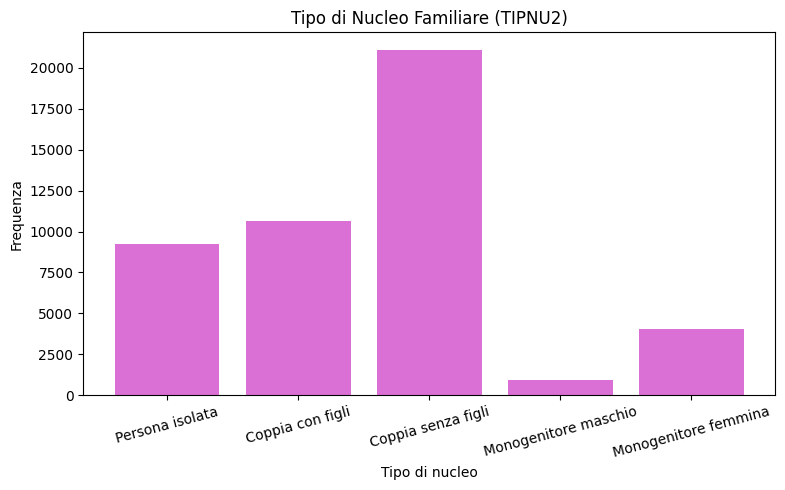

In [221]:
tipnu2_labels = {
    0: "Persona isolata",
    1: "Coppia con figli",
    2: "Coppia senza figli",
    3: "Monogenitore maschio",
    4: "Monogenitore femmina"
}

# Conta valori
tipnu2_counts = df_tema_anagrafe_famiglia['TIPNU2'].value_counts().sort_index()
tipnu2_names = [tipnu2_labels.get(code, str(code)) for code in tipnu2_counts.index]

# Plot TIPNU2
plt.figure(figsize=(8, 5))
plt.bar(tipnu2_names, tipnu2_counts.values, color='orchid')
plt.title("Tipo di Nucleo Familiare (TIPNU2)")
plt.xlabel("Tipo di nucleo")
plt.ylabel("Frequenza")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [222]:
tipnu2_counts

TIPNU2
0     9242
1    10633
2    21105
3      906
4     4044
Name: count, dtype: int64

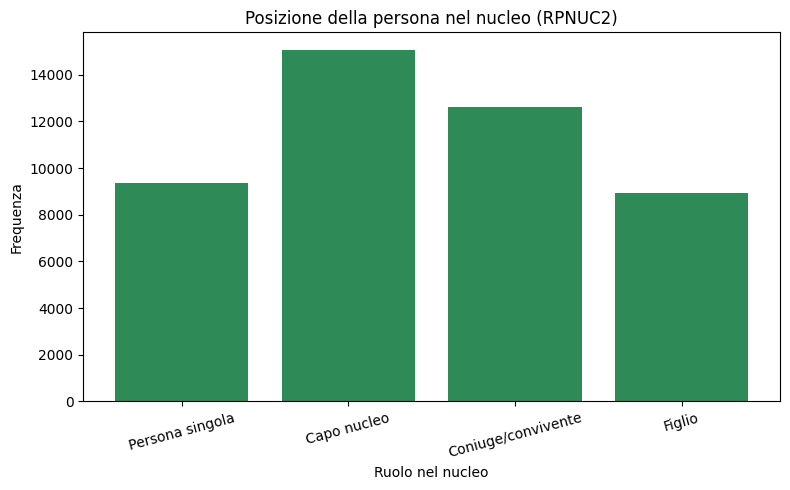

In [223]:
rp_labels = {
    0: "Persona singola",
    1: "Capo nucleo",
    2: "Coniuge/convivente",
    3: "Figlio"
}


# Conta e mappa etichette
rp_counts = df_tema_anagrafe_famiglia['RPNUC2'].value_counts().sort_index()
rp_names = [rp_labels.get(code, str(code)) for code in rp_counts.index]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(rp_names, rp_counts.values, color='seagreen')
plt.title("Posizione della persona nel nucleo (RPNUC2)")
plt.xlabel("Ruolo nel nucleo")
plt.ylabel("Frequenza")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [224]:
rp_counts

RPNUC2
0     9345
1    15065
2    12608
3     8912
Name: count, dtype: int64

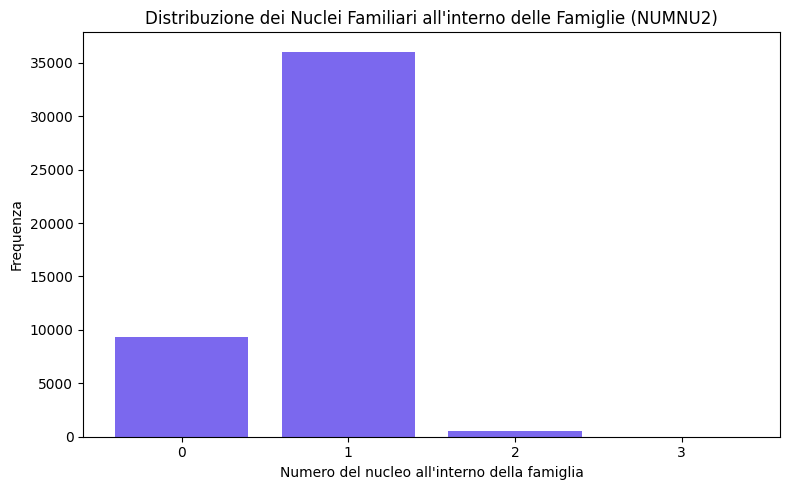

In [225]:
numnu2_counts = df_tema_anagrafe_famiglia['NUMNU2'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(numnu2_counts.index.astype(str), numnu2_counts.values, color='mediumslateblue')
plt.title("Distribuzione dei Nuclei Familiari all'interno delle Famiglie (NUMNU2)")
plt.xlabel("Numero del nucleo all'interno della famiglia")
plt.ylabel("Frequenza")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [226]:
numnu2_counts

NUMNU2
0     9339
1    36056
2      526
3        9
Name: count, dtype: int64

| NUMNU2 | Significato operativo                                                                                                                                                                                                      |
| ------ | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 0      | Persona **senza nucleo associato** (es. persona isolata, ospite, convivente non incluso)                                                                                                                                   |
| 1      | **Primo nucleo familiare** della famiglia di fatto (standard)                                                                                                                                                              |
| 2, 3…  | **Nuclei aggiuntivi** presenti nella stessa famiglia (`HHID2`) – indicano **famiglie complesse** con più nuclei interni (es. due fratelli sposati con figli che vivono insieme, con due nuclei distinti ma stesso `HHID2`) |


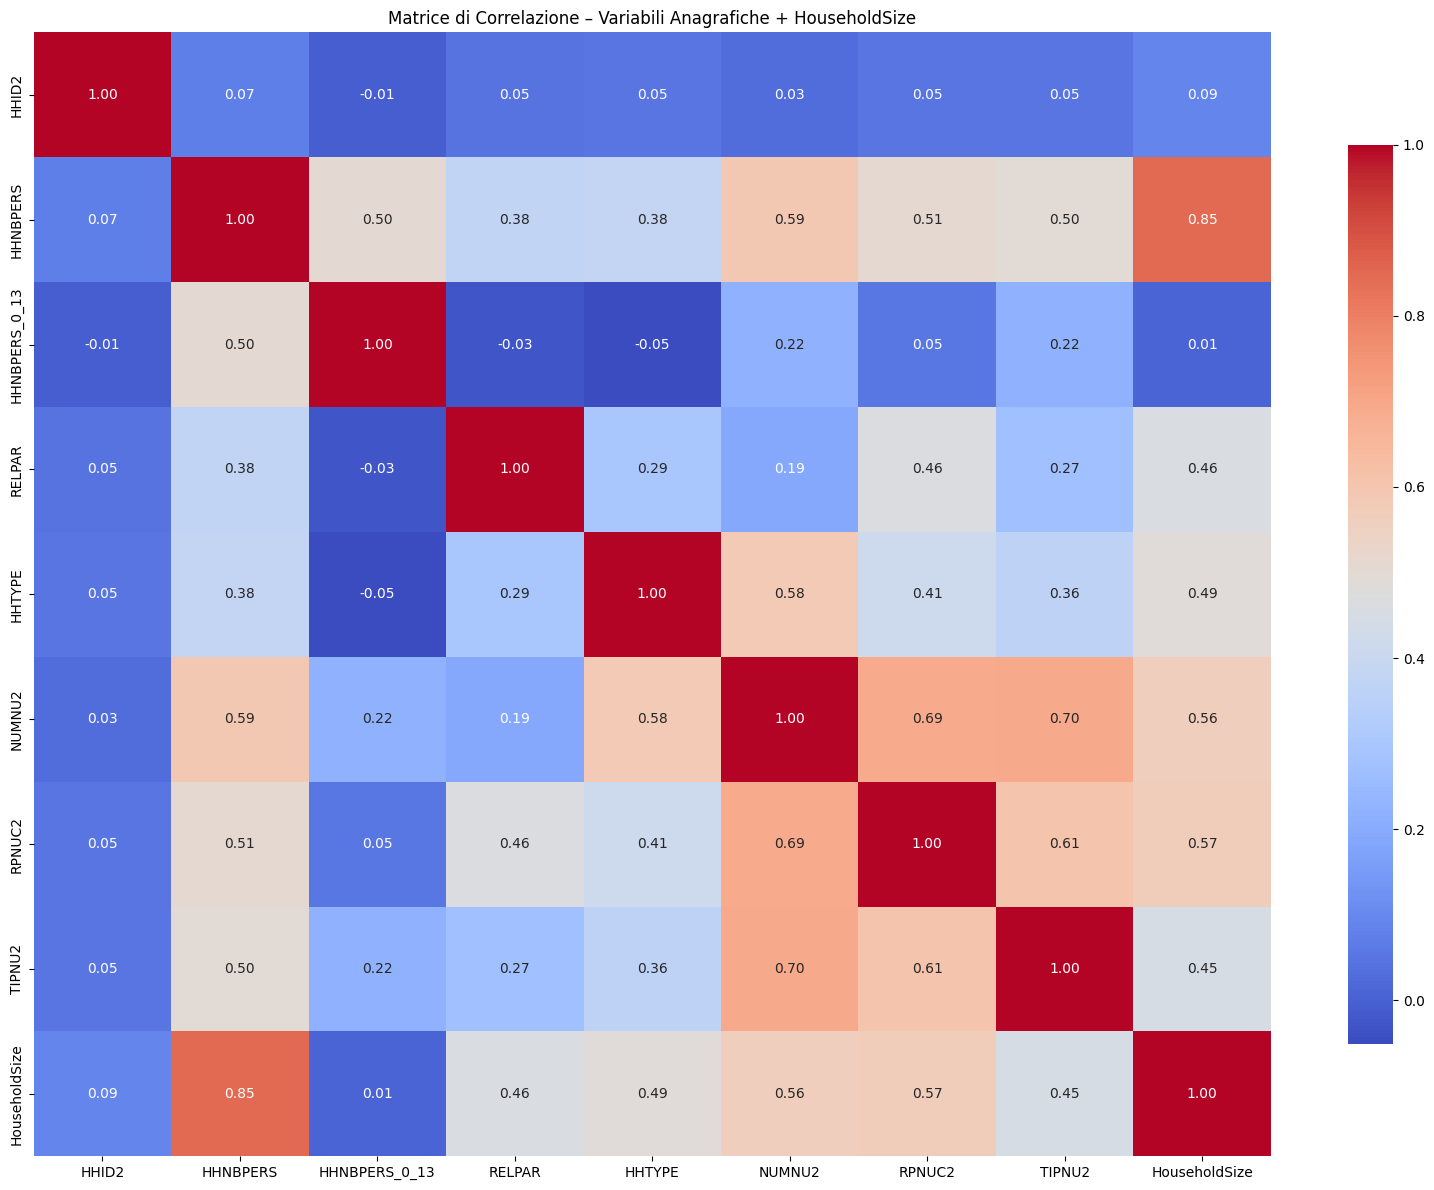

In [227]:
df_household = df_tema_anagrafe_famiglia[['HHID2','HHNBPERS', 'HHNBPERS_0_13', 'RELPAR',  'HHTYPE', 'NUMNU2', 'RPNUC2', 'TIPNU2']]
df_corr_input = df_household.merge(household_sizes, on='HHID2', how='left')

# Selezioniamo solo variabili numeriche
df_corr_num = df_corr_input.select_dtypes(include=['int64', 'float64'])

# Calcola matrice di correlazione
corr_matrix = df_corr_num.corr()

# --- Plot heatmap ---
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=False, cbar_kws={"shrink": 0.8})
plt.title("Matrice di Correlazione – Variabili Anagrafiche + HouseholdSize")
plt.tight_layout()
plt.show()



### Semplificare la Complessità delle Variabili Sovrapposte

In [228]:
df_household.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45930 entries, 0 to 45929
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   HHID2          45930 non-null  int64
 1   HHNBPERS       45930 non-null  int64
 2   HHNBPERS_0_13  45930 non-null  int64
 3   RELPAR         45930 non-null  int64
 4   HHTYPE         45930 non-null  int64
 5   NUMNU2         45930 non-null  int64
 6   RPNUC2         45930 non-null  int64
 7   TIPNU2         45930 non-null  int64
dtypes: int64(8)
memory usage: 2.8 MB


C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\136638472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_household[cat_vars] = df_household[cat_vars].astype(str)


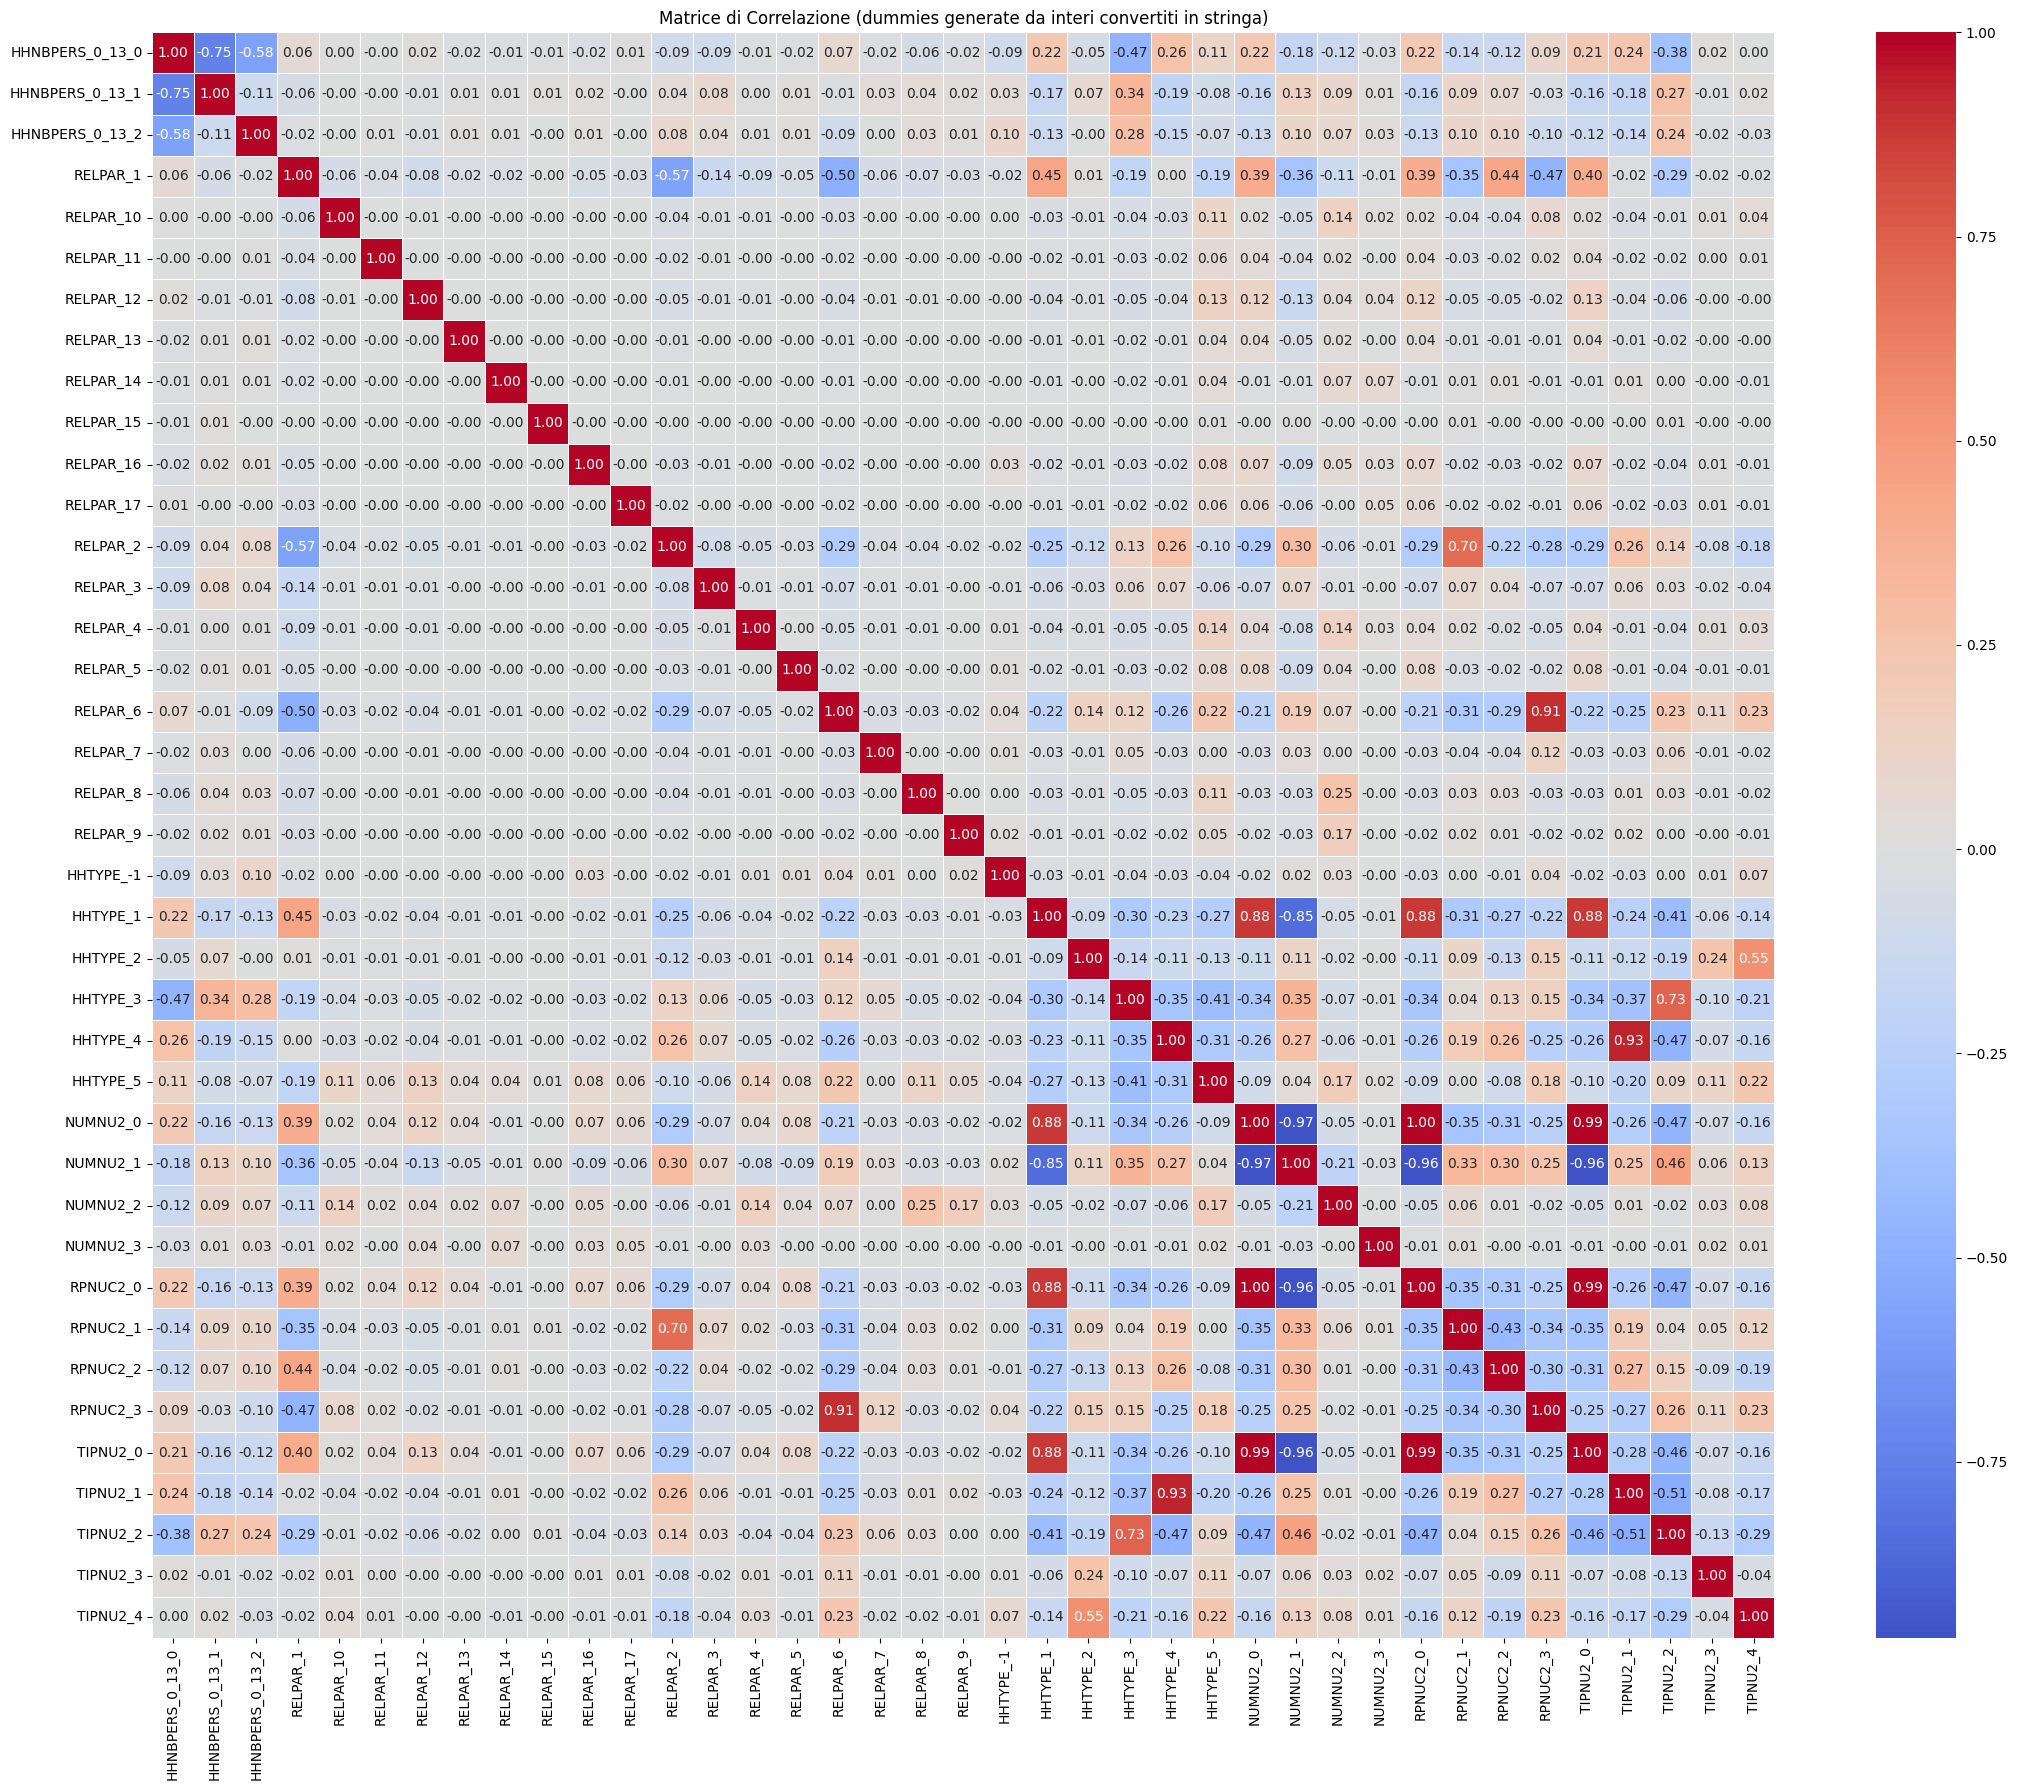

In [229]:
cat_vars = ['HHNBPERS_0_13', 'RELPAR',  'HHTYPE', 'NUMNU2', 'RPNUC2', 'TIPNU2']
df_household[cat_vars] = df_household[cat_vars].astype(str)
df_dummies = pd.get_dummies(df_household[cat_vars], prefix=cat_vars, prefix_sep='_', drop_first=False)
corr_matrix = df_dummies.corr()

plt.figure(figsize=(22, 18))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Matrice di Correlazione (dummies generate da interi convertiti in stringa)")
plt.tight_layout()
plt.show()


In [230]:
# Trova coppie perfettamente correlate (ρ = 1.0, escludendo diagonale)
to_remove = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        var1 = corr_matrix.columns[i]
        var2 = corr_matrix.columns[j]
        if corr_matrix.iloc[i, j] == 1.0:
            to_remove.add(var2)  # tieni var1, rimuovi var2

df_cleaned = df_dummies.drop(columns=to_remove)
print(f"Colonne rimosse per ρ = 1.0: {sorted(to_remove)}")

Colonne rimosse per ρ = 1.0: []


Persona sola vs Numero di componenti nel nucleo familiare = 1

In [231]:
# Calcola tutte le coppie con correlazione > 0.99 e < 1
almost_equal_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        var1 = corr_matrix.columns[i]
        var2 = corr_matrix.columns[j]
        corr_val = corr_matrix.iloc[i, j]
        if 0.99 < abs(corr_val) < 1.0:
            almost_equal_pairs.append((var1, var2, round(corr_val, 5)))

# Ordina le coppie per correlazione decrescente
almost_equal_pairs = sorted(almost_equal_pairs, key=lambda x: -abs(x[2]))

# Stampa risultati
for v1, v2, rho in almost_equal_pairs:
    print(f"{v1} ↔ {v2} → ρ = {rho}")


NUMNU2_0 ↔ RPNUC2_0 → ρ = 0.9996
RPNUC2_0 ↔ TIPNU2_0 → ρ = 0.99308
NUMNU2_0 ↔ TIPNU2_0 → ρ = 0.99267


In [232]:
A = 'RPNUC2_0'
B = 'NUMNU2_0'

diff_mask = df_dummies[A] != df_dummies[B]
n_diff = diff_mask.sum()

print(f"{A} ≠ {B} in {n_diff} casi")
#print(df_dummies.loc[diff_mask, [A, B]])

RPNUC2_0 ≠ NUMNU2_0 in 6 casi


Even though the info are almost the same we need to keep it to account to this possible diffencies

Same goes for the other since correlation was even lower

In [233]:
df_dummies.drop(columns=['HHNBPERS_0_13_0', 'RELPAR_1', 'HHTYPE_-1', 'NUMNU2_0', 'RPNUC2_0', 'TIPNU2_0' ], inplace=True)
# removing baselines

In [234]:
rename_map = {
    #'HHNBPERS_0_13_0': 'famiglia_senza_bambini',
    'HHNBPERS_0_13_1': 'famiglia_1_bambino',
    'HHNBPERS_0_13_2': 'famiglia_2+_bambini',
    #'RELPAR_1': 'relazione_pr',
    'RELPAR_2': 'relazione_coniuge',
    'RELPAR_3': 'relazione_convivente',
    'RELPAR_4': 'relazione_genitore',
    'RELPAR_5': 'relazione_genitore_coniuge',
    'RELPAR_6': 'relazione_figlio_ultimo_matrim',
    'RELPAR_7': 'relazione_figlio_precedente_unione',
    'RELPAR_8': 'relazione_coniuge_figlio',
    'RELPAR_9': 'relazione_convivente_figlio',
    'RELPAR_10': 'relazione_nipote_figlio',
    'RELPAR_11': 'relazione_nipote_fratello',
    'RELPAR_12': 'relazione_fratello_sorella',
    'RELPAR_13': 'relazione_fratello_coniuge',
    'RELPAR_14': 'relazione_coniuge_fratello',
    'RELPAR_15': 'relazione_convivente_fratello',
    'RELPAR_16': 'relazione_altro_parente',
    'RELPAR_17': 'relazione_amico',
    #'HHTYPE_-1': 'famiglia_missing',
    'HHTYPE_1': 'famiglia_persona_sola',
    'HHTYPE_2': 'famiglia_genitore_solo',
    'HHTYPE_3': 'famiglia_coppia_con_figli',
    'HHTYPE_4': 'famiglia_coppia_senza_figli',
    'HHTYPE_5': 'famiglia_altro_tipo',
    #'NUMNU2_0': 'nucleo_senza_associazione',
    'NUMNU2_1': 'nucleo_principale',
    'NUMNU2_2': 'nucleo_secondario',
    'NUMNU2_3': 'nucleo_terziario',
    #'RPNUC2_0': 'ruolo_singolo',
    'RPNUC2_1': 'ruolo_capo_nucleo',
    'RPNUC2_2': 'ruolo_coniuge',
    'RPNUC2_3': 'ruolo_figlio',
    #'TIPNU2_0': 'nucleo_persona_isolata',
    'TIPNU2_1': 'nucleo_coppia_con_figli',
    'TIPNU2_2': 'nucleo_coppia_senza_figli',
    'TIPNU2_3': 'nucleo_monogenitore_uomo',
    'TIPNU2_4': 'nucleo_monogenitore_donna'
}
# are baselines
df_dummies_renamed = df_dummies.rename(columns=rename_map)

In [235]:
# add to df_finale
df_finale = pd.concat([df_finale, df_dummies_renamed], axis=1)
df_finale['membri_famiglia'] = df['HHNBPERS']

### Maternità

In [236]:
df_tema_anagrafe_famiglia_maternita = df_tema_anagrafe_famiglia[['FIGLI_N', 'ALSENO', 'DALSENO', 'DALLESC']]
# presenza di figli ≤36 mesi
df_finale['ha_figli_piccoli'] = (df_tema_anagrafe_famiglia_maternita['FIGLI_N'] == 1).astype(int)
df_finale['non_ha_figli_piccoli'] = (df_tema_anagrafe_famiglia_maternita['FIGLI_N'] == 2).astype(int)

# allattamento al seno
df_finale['mai_allattato'] = (df_tema_anagrafe_famiglia_maternita['ALSENO'] == 3).astype(int)
df_finale['ha_allattato'] = (df_tema_anagrafe_famiglia_maternita['ALSENO'] == 2).astype(int)
df_finale['sta_allattato'] = (df_tema_anagrafe_famiglia_maternita['ALSENO'] == 1).astype(int)
df_finale['allattamento_missing'] = (df_tema_anagrafe_famiglia_maternita['ALSENO'] == -1).astype(int)


In [237]:
# Mappa ordinalmente da codice a mesi (0 = <1 mese, 13 = 13+ mesi)
df_finale['mesi_allattamento'] = df_tema_anagrafe_famiglia_maternita['DALSENO'].replace({
    '00': 0, '01': 1, '02': 2, '03': 3, '04': 4, '05': 5,
    '06': 6, '07': 7, '08': 8, '09': 9, '10': 10, '11': 11,
    '12': 12, '13': 13
}).astype(float).replace({ -2: 0 }) 

# Durata in mesi dell’allattamento esclusivo
df_finale['mesi_allattamento_esclusivo'] = df_tema_anagrafe_famiglia_maternita['DALLESC'].replace({
    0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7
}).replace({ -2: 0 }) 


In [238]:
df_tema_anagrafe_famiglia_maternita.drop(columns=['FIGLI_N','ALSENO', 'DALSENO', 'DALLESC'], inplace=True)
# add to df_finale
df_finale = pd.concat([df_finale, df_tema_anagrafe_famiglia_maternita], axis=1)

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\2466934735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tema_anagrafe_famiglia_maternita.drop(columns=['FIGLI_N','ALSENO', 'DALSENO', 'DALLESC'], inplace=True)


In [239]:
df_figli_piccoli = df_finale[df_finale['ha_figli_piccoli'] == 1]
# df_figli_piccoli

### Questionario Giallo

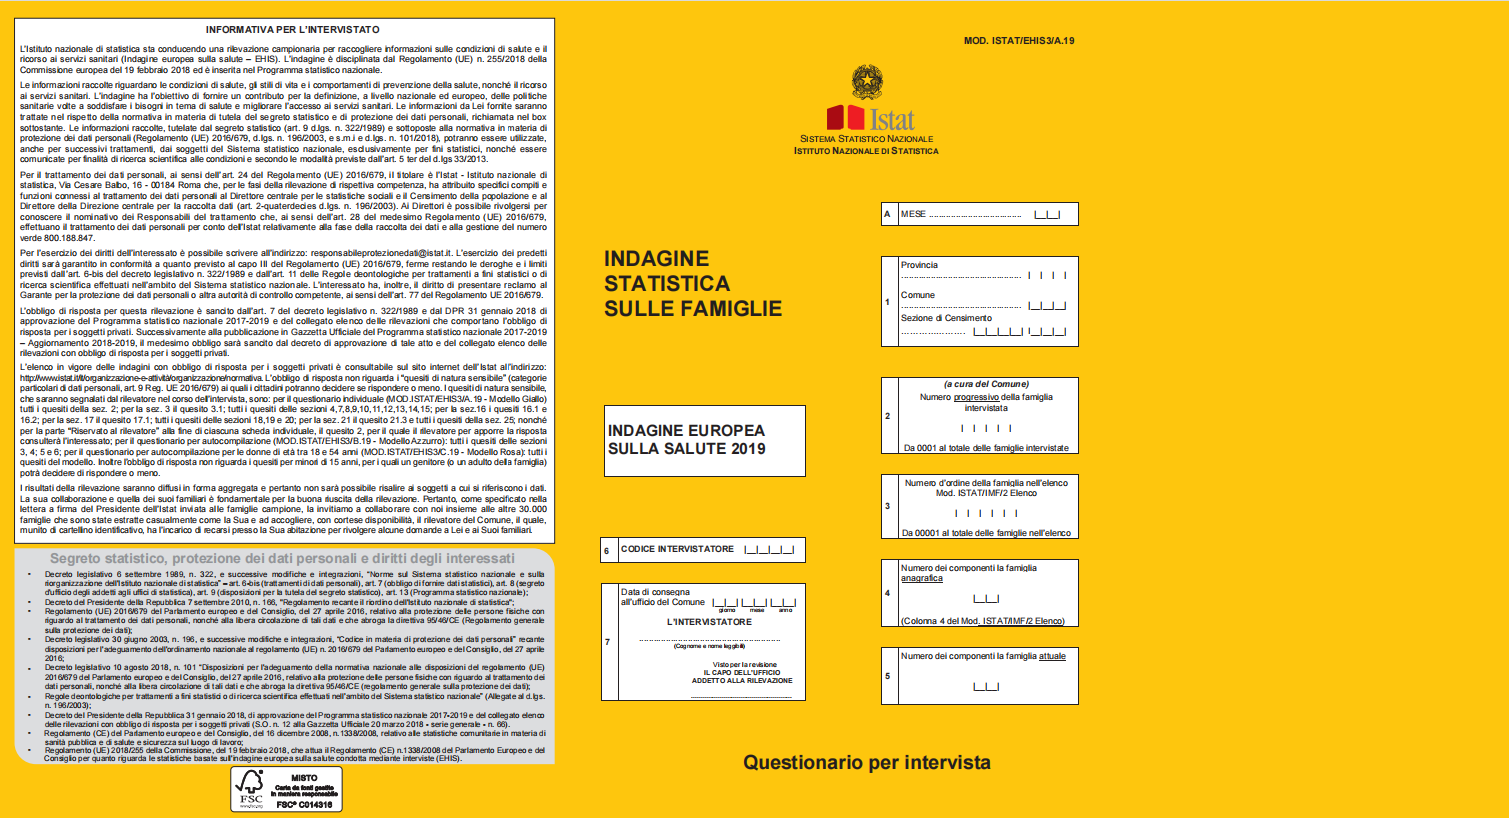

##### Socio-anagrafico

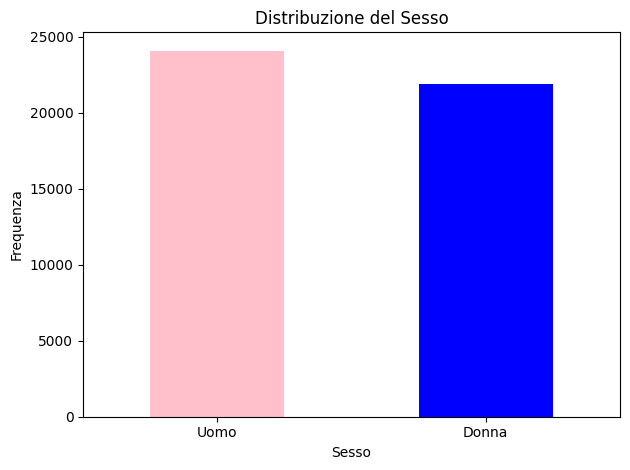

In [240]:
# Question 1.2 Questionario Giallo
df_tema_anagrafe_famiglia['Sesso'] = df_tema_anagrafe_famiglia['SEX'].replace({1: 'Donna', 2: 'Uomo'})

df_tema_anagrafe_famiglia['Sesso'].value_counts().plot(kind='bar', color=['pink', 'blue'])
plt.title('Distribuzione del Sesso')
plt.xlabel('Sesso')
plt.ylabel('Frequenza')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


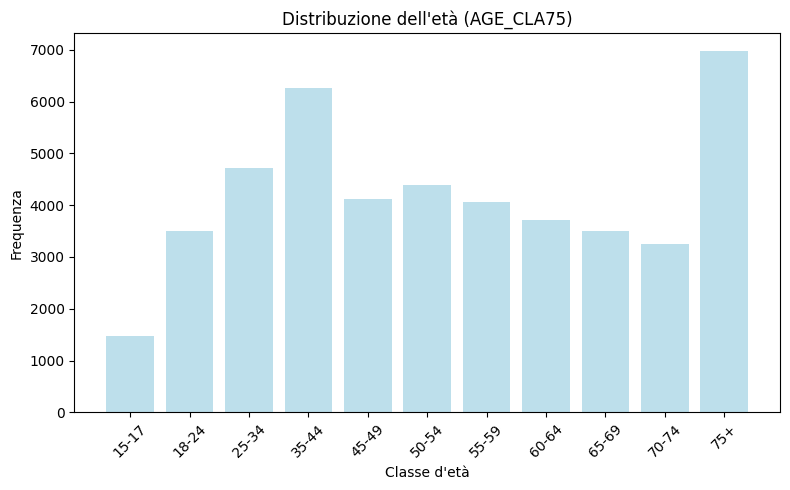

In [241]:
# Question 1.3 Questionario Giallo
age_order = list(range(1, 12))
age_labels = ['15-17', '18-24', '25-34', '35-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+']

age_counts = df_tema_anagrafe_famiglia['AGE_CLA75'].value_counts().reindex(age_order)

plt.figure(figsize=(8, 5))
plt.bar(x=age_labels, height=age_counts, color='lightblue', alpha=0.8)
plt.title("Distribuzione dell'età (AGE_CLA75)")
plt.xlabel("Classe d'età")
plt.ylabel("Frequenza")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [242]:
country_counts = df_tema_anagrafe_famiglia['COUNTRY'].value_counts().reset_index()
country_counts
# variabile inutile analiticamente

COUNTRY  count
0      IT  45930

In [243]:
df_tema_anagrafe_famiglia = df_tema_anagrafe_famiglia.drop(columns=['COUNTRY'])
df = df.drop(columns=['COUNTRY'])

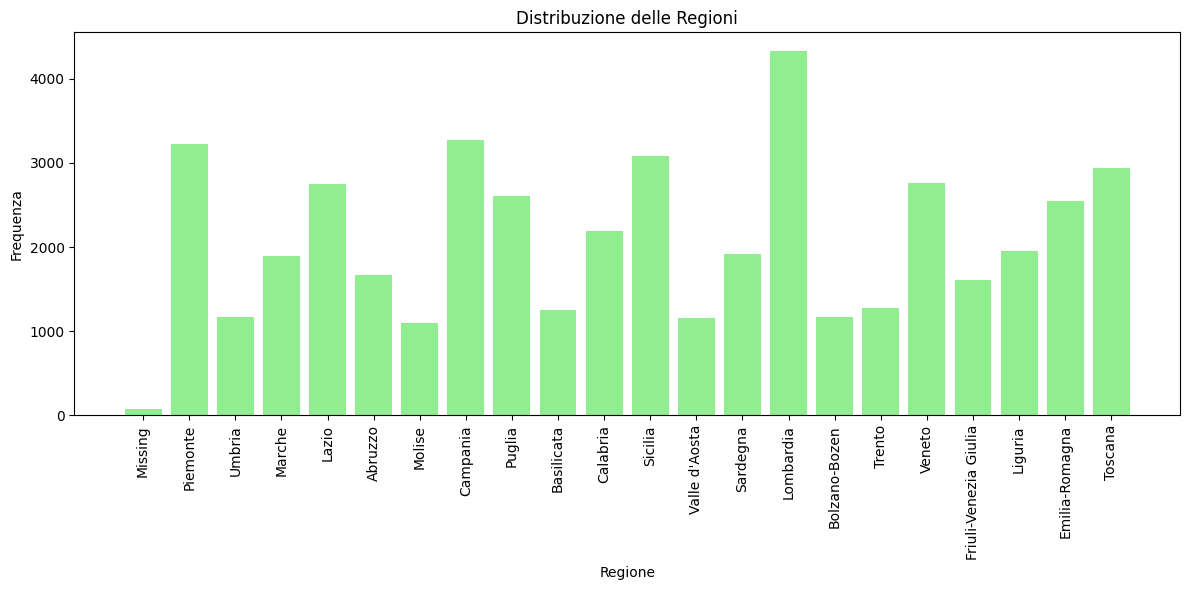

In [244]:
reg_labels = {
    '-1': 'Missing', '10': 'Piemonte', '20': "Valle d'Aosta", '30': 'Lombardia',
    '41': 'Bolzano-Bozen', '42': 'Trento', '50': 'Veneto', '60': 'Friuli-Venezia Giulia',
    '70': 'Liguria', '80': 'Emilia-Romagna', '90': 'Toscana', '100': 'Umbria',
    '110': 'Marche', '120': 'Lazio', '130': 'Abruzzo', '140': 'Molise', '150': 'Campania',
    '160': 'Puglia', '170': 'Basilicata', '180': 'Calabria', '190': 'Sicilia', '200': 'Sardegna'
}

reg_counts = df_tema_anagrafe_famiglia['REG'].astype(str).value_counts().sort_index()
labels = [reg_labels.get(code, code) for code in reg_counts.index]

plt.figure(figsize=(12, 6))
plt.bar(labels, reg_counts.values, color='lightgreen')
plt.title("Distribuzione delle Regioni")
plt.xlabel("Regione")
plt.ylabel("Frequenza")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


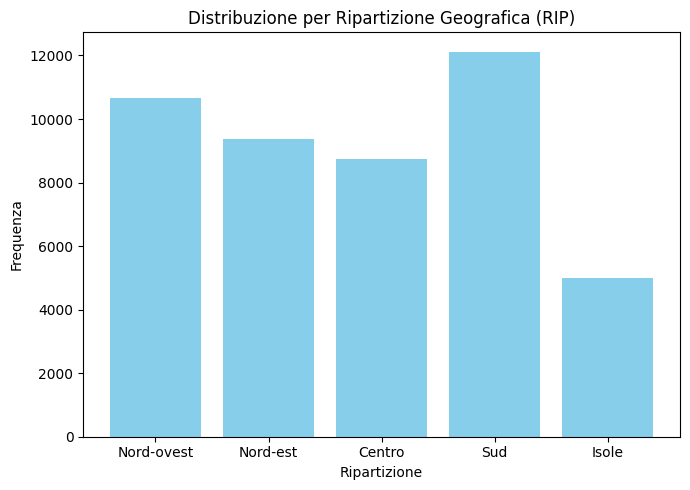

In [245]:
rip_labels = {1: "Nord-ovest", 2: "Nord-est", 3: "Centro", 4: "Sud", 5: "Isole"}

rip_counts = df_tema_anagrafe_famiglia['RIP'].value_counts().sort_index()
labels = [rip_labels.get(code, str(code)) for code in rip_counts.index]

plt.figure(figsize=(7, 5))
plt.bar(labels, rip_counts.values, color='skyblue')
plt.title("Distribuzione per Ripartizione Geografica (RIP)")
plt.xlabel("Ripartizione")
plt.ylabel("Frequenza")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



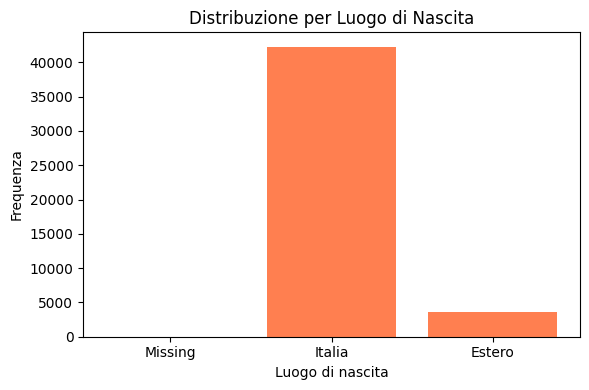

In [246]:
# Question 1.4 Questionario Giallo

birthplace_labels = {-1: "Missing", 10: "Italia", 20: "Estero"}

df['nato_in_italia'] = (df['BIRTHPLACE2'] == 10).astype(int)
df['nato_estero'] = (df['BIRTHPLACE2'] == 20).astype(int)

birthplace_counts = df['BIRTHPLACE2'].value_counts().sort_index()
labels = [birthplace_labels.get(code, str(code)) for code in birthplace_counts.index]

plt.figure(figsize=(6, 4))
plt.bar(labels, birthplace_counts.values, color='coral')
plt.title("Distribuzione per Luogo di Nascita")
plt.xlabel("Luogo di nascita")
plt.ylabel("Frequenza")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



In [247]:
birthplace_counts

BIRTHPLACE2
-1         2
 10    42265
 20     3663
Name: count, dtype: int64

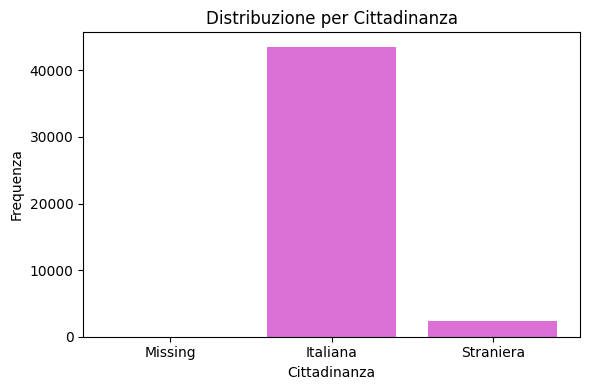

In [248]:
# Question 1.5 Questionario Giallo

citizen_labels = {-1: "Missing", 10: "Italiana", 20: "Straniera"}

df['cittadinanza_italiana'] = (df['CITIZEN2'] == 10).astype(int)
df['cittadinanza_straniera'] = (df['CITIZEN2'] == 20).astype(int)

citizen_counts = df['CITIZEN2'].value_counts().sort_index()
labels = [citizen_labels.get(code, str(code)) for code in citizen_counts.index]

plt.figure(figsize=(6, 4))
plt.bar(labels, citizen_counts.values, color='orchid')
plt.title("Distribuzione per Cittadinanza")
plt.xlabel("Cittadinanza")
plt.ylabel("Frequenza")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [249]:
citizen_counts

CITIZEN2
-1         1
 10    43525
 20     2404
Name: count, dtype: int64

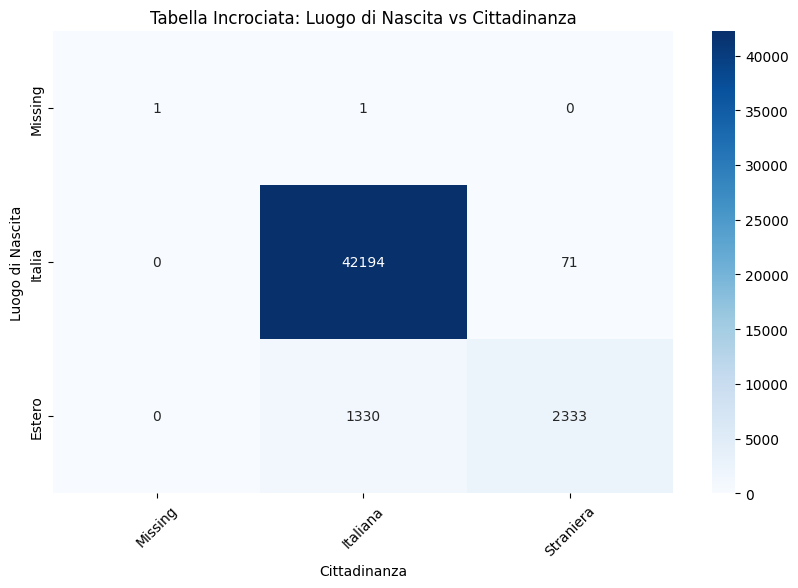

In [250]:
df_birth_citizen = df[['BIRTHPLACE2', 'CITIZEN2']]
cross_tab = pd.crosstab(df_birth_citizen['BIRTHPLACE2'], df_birth_citizen['CITIZEN2'])
cross_tab.index = cross_tab.index.map(birthplace_labels)
cross_tab.columns = cross_tab.columns.map(citizen_labels)

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title("Tabella Incrociata: Luogo di Nascita vs Cittadinanza")
plt.xlabel("Cittadinanza")
plt.ylabel("Luogo di Nascita")
plt.xticks(rotation=45)
plt.show()

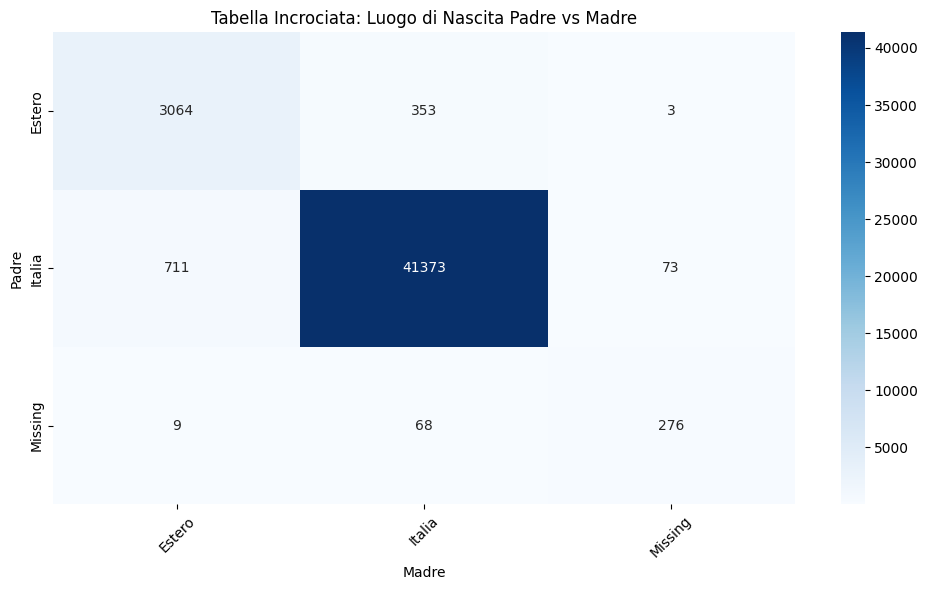

In [251]:
place_map = {
    -1: "Missing",
    10: "Italia",
    20: "Estero"
}

# Etichette leggibili
df['padre_nato'] = df['BIRTHPLACEFATH2'].map(place_map)
df['madre_nata'] = df['BIRTHPLACEMOTH2'].map(place_map)

# Dummies specifiche
df['padre_nato_estero'] = (df['BIRTHPLACEFATH2'] == 20).astype(int)
df['madre_nata_estero'] = (df['BIRTHPLACEMOTH2'] == 20).astype(int)

cross_tab_parents = pd.crosstab(
    df['padre_nato'],
    df['madre_nata']
)

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab_parents, annot=True, fmt='d', cmap='Blues')
plt.title("Tabella Incrociata: Luogo di Nascita Padre vs Madre")
plt.xlabel("Madre")
plt.ylabel("Padre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


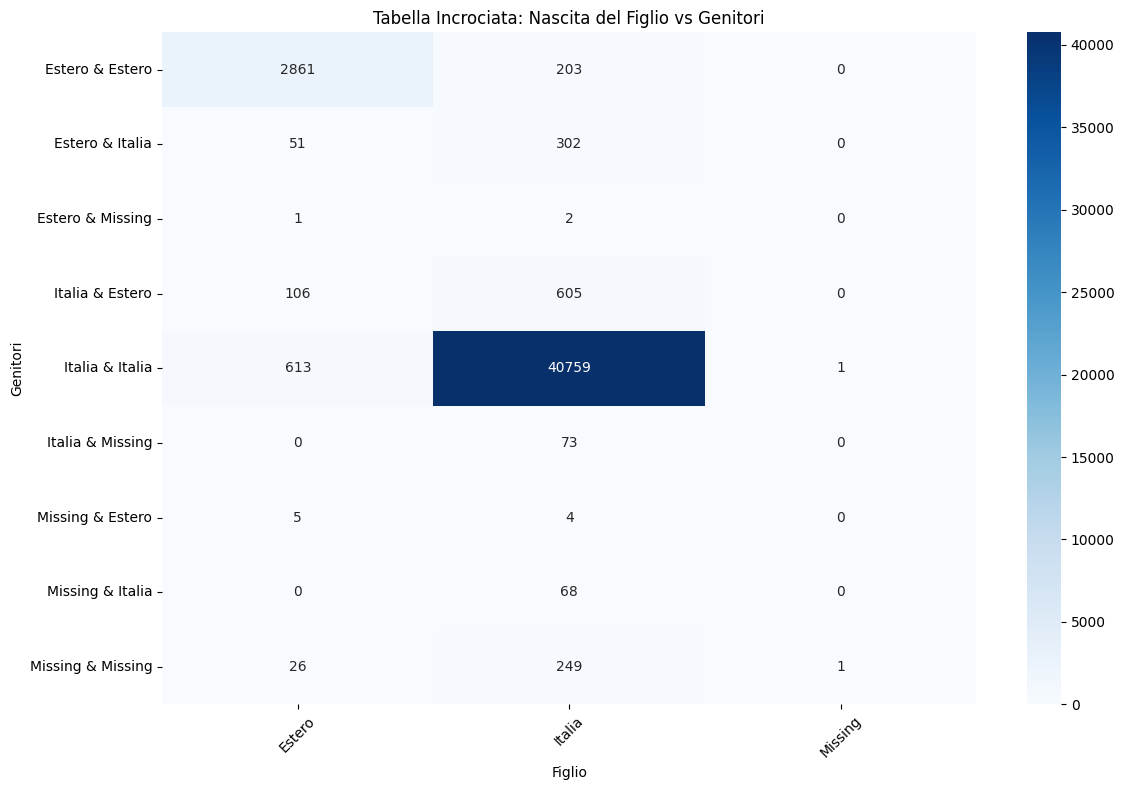

In [252]:
df['genitori_nati'] = df['padre_nato'] + ' & ' + df['madre_nata']
df['figlio_nato'] = df['BIRTHPLACE2'].map(place_map)

cross_tab_kid_vs_parents = pd.crosstab(df['genitori_nati'], df['figlio_nato'])

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab_kid_vs_parents, annot=True, fmt='d', cmap='Blues')
plt.title("Tabella Incrociata: Nascita del Figlio vs Genitori")
plt.xlabel("Figlio")
plt.ylabel("Genitori")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We can get some interesting dummies here later

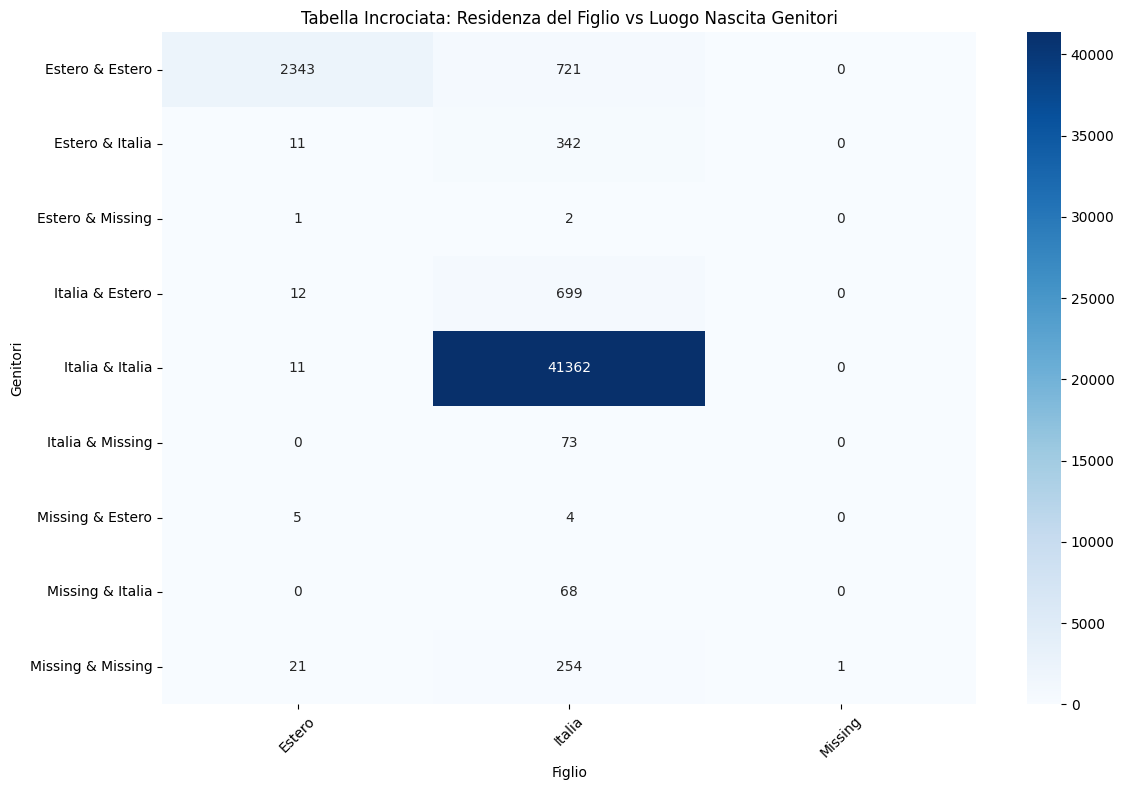

In [253]:
df['figlio_residenza'] = df['CITIZEN2'].map(place_map)

cross_tab_kid_vs_parents = pd.crosstab(df['genitori_nati'], df['figlio_residenza'])

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab_kid_vs_parents, annot=True, fmt='d', cmap='Blues')
plt.title("Tabella Incrociata: Residenza del Figlio vs Luogo Nascita Genitori")
plt.xlabel("Figlio")
plt.ylabel("Genitori")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

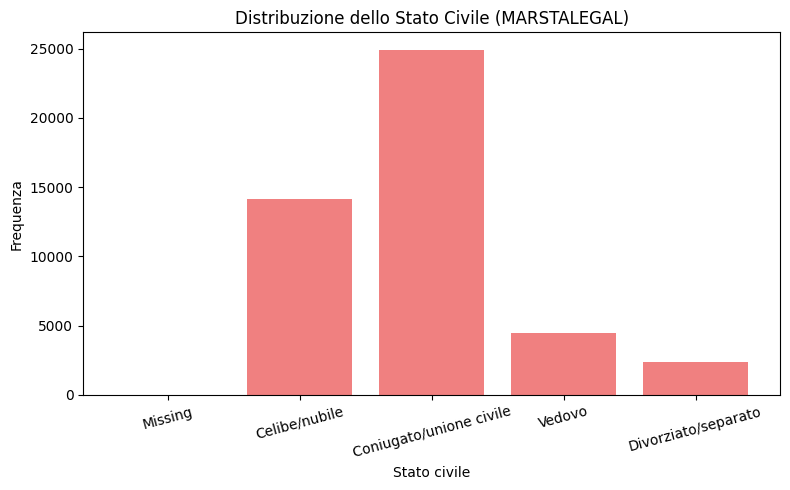

In [254]:
marital_status_labels = {
    1: "Celibe/nubile",
    2: "Coniugato/unione civile",
    3: "Vedovo",
    4: "Divorziato/separato",
   -1: "Missing"
}

marital_counts = df['MARSTALEGAL'].value_counts().sort_index()
labels = [marital_status_labels.get(code, str(code)) for code in marital_counts.index]

plt.figure(figsize=(8, 5))
plt.bar(labels, marital_counts.values, color='lightcoral')
plt.title("Distribuzione dello Stato Civile (MARSTALEGAL)")
plt.xlabel("Stato civile")
plt.ylabel("Frequenza")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [255]:
marital_counts

MARSTALEGAL
-1        6
 1    14161
 2    24936
 3     4473
 4     2354
Name: count, dtype: int64

##### Dummies for the final Dataset

In [256]:
df_finale['donna'] = (df_tema_anagrafe_famiglia['SEX'] == 1).astype(int)  # Donna = 1, Uomo = 0

# Classi d'età (AGE_CLA75): riferimento = '75+'
for code, label in zip([1,2,3,4,5,6,7,8,9,10], [
    'eta_15_17', 'eta_18_24', 'eta_25_34', 'eta_35_44', 'eta_45_49',
    'eta_50_54', 'eta_55_59', 'eta_60_64', 'eta_65_69', 'eta_70_74'
]):
    df_finale[label] = (df['AGE_CLA75'] == code).astype(int)

# Regione (REG):
reg_map = {
    -1: 'missing',  
    10: 'piemonte', 20: 'valle_aosta', 30: 'lombardia', 41: 'bolzano', 42: 'trento',
    50: 'veneto', 60: 'friuli_v_giulia', 70: 'liguria', 80: 'emilia_romagna',
    90: 'toscana', 100: 'umbria', 110: 'marche', 120: 'lazio', 130: 'abruzzo',
    140: 'molise', 150: 'campania', 160: 'puglia', 170: 'basilicata',
    180: 'calabria', 190: 'sicilia', 200: 'sardegna'
}
for code, name in reg_map.items():
    if code != -1:  # Dummy trap: salta missing
        df[f'regione_{name}'] = (df_tema_anagrafe_famiglia['REG'] == code).astype(int)

# Ripartizione geografica (RIP): riferimento = isole (5)
rip_map = {1: 'nord_ovest' , 2: 'nord_est', 3: 'centro', 4: 'sud'}
for code, name in rip_map.items():
    df[f'rip_{name}'] = (df_tema_anagrafe_famiglia['RIP'] == code).astype(int)

# Luogo di nascita (BIRTHPLACE2): riferimento = Italia
df_finale['nato_estero'] = (df_tema_anagrafe_famiglia['BIRTHPLACE2'] == 20).astype(int)
df_finale['nato_italia'] = (df_tema_anagrafe_famiglia['BIRTHPLACE2'] == 10).astype(int)

# Cittadinanza (CITIZEN2): riferimento = Italiana
df_finale['cittadinanza_straniera'] = (df_tema_anagrafe_famiglia['CITIZEN2'] == 20).astype(int)
df_finale['cittadinanza_italiana'] = (df_tema_anagrafe_famiglia['CITIZEN2'] == 10).astype(int)

# Cittadinanza dei genitori
df_finale['padre_nato_italiano'] = (df_tema_anagrafe_famiglia['BIRTHPLACEFATH2'] == 10).astype(int)
df_finale['madre_nata_italiano'] = (df_tema_anagrafe_famiglia['BIRTHPLACEMOTH2'] == 10).astype(int)
df_finale['padre_nato_estero'] = (df_tema_anagrafe_famiglia['BIRTHPLACEFATH2'] == 20).astype(int)
df_finale['madre_nata_estero'] = (df_tema_anagrafe_famiglia['BIRTHPLACEMOTH2'] == 20).astype(int)

# Stato civile (MARSTALEGAL): riferimento = Celibe/nubile
df_finale['celibe'] = (df['MARSTALEGAL'] == 1).astype(int)
df_finale['coniugato'] = (df['MARSTALEGAL'] == 2).astype(int)
df_finale['vedovo'] = (df['MARSTALEGAL'] == 3).astype(int)
df_finale['divorziato'] = (df['MARSTALEGAL'] == 4).astype(int)


# Condizione Socio - Economica

In [257]:
tema_scelto = "Condizione socio-economica"
df_tema_socio_economico = extract_df_by_tema(df, df_mapping, tema_scelto)
df_tema_socio_economico.head()

HATLEVEL4  MAINSTAT  POSIZ  HHINCOME  REDPR  PROBF1  ASS_SAN  BABYS  \
0          2        10      2         5      1       2        1      2   
1          2        10      2         5      1       2        1      2   
2          2        20     -2         1      3       1        1      2   
3          4        10      3         1      1       1        1      2   
4          2        80     -2         1      3       1        1      2   

   ASSIST  HCOLF  HBABYS  HASSIST  RISECO  
0       2     -2      -2       -2       2  
1       2     -2      -2       -2       2  
2       2     -2      -2       -2       3  
3       2     -2      -2       -2       3  
4       2     -2      -2       -2       3

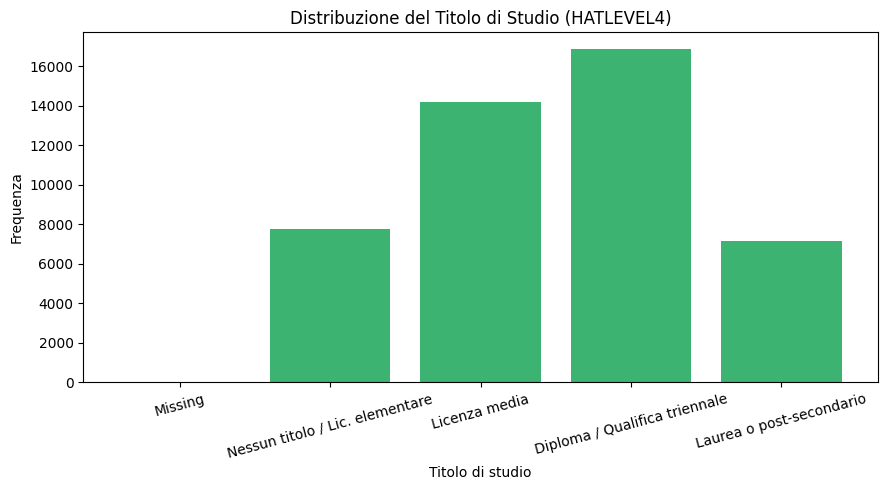

In [258]:
hatlevel_labels = {
    1: "Nessun titolo / Lic. elementare",
    2: "Licenza media",
    3: "Diploma / Qualifica triennale",
    4: "Laurea o post-secondario",
   -1: "Missing"
}

hat_counts = df_tema_socio_economico['HATLEVEL4'].value_counts().sort_index()
labels = [hatlevel_labels.get(code, str(code)) for code in hat_counts.index]

plt.figure(figsize=(9, 5))
plt.bar(labels, hat_counts.values, color='mediumseagreen')
plt.title("Distribuzione del Titolo di Studio (HATLEVEL4)")
plt.xlabel("Titolo di studio")
plt.ylabel("Frequenza")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [259]:
hat_counts 


HATLEVEL4
-1        1
 1     7740
 2    14176
 3    16875
 4     7138
Name: count, dtype: int64

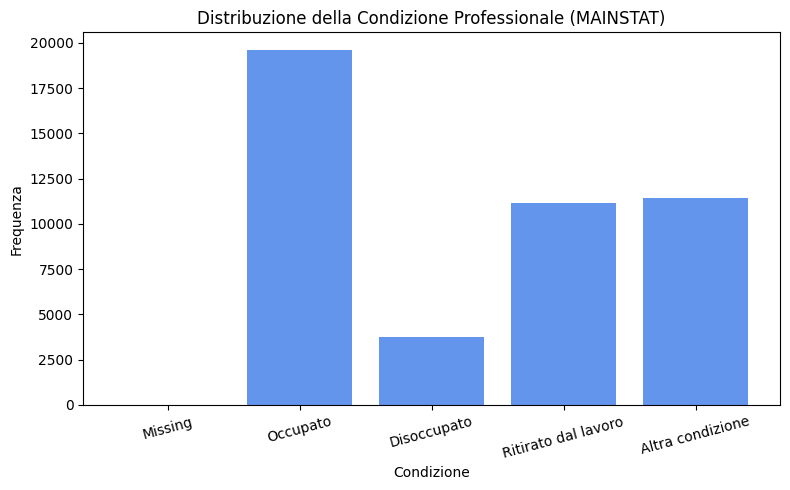

In [260]:
mainstat_labels = {
    10: "Occupato",
    20: "Disoccupato",
    30: "Ritirato dal lavoro",
    80: "Altra condizione",
    -1: "Missing"
}

# Conta e mappa etichette
mainstat_counts = df_tema_socio_economico['MAINSTAT'].value_counts().sort_index()
mainstat_names = [mainstat_labels.get(code, str(code)) for code in mainstat_counts.index]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(mainstat_names, mainstat_counts.values, color='cornflowerblue')
plt.title("Distribuzione della Condizione Professionale (MAINSTAT)")
plt.xlabel("Condizione")
plt.ylabel("Frequenza")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [261]:
mainstat_counts

MAINSTAT
-1         5
 10    19604
 20     3747
 30    11168
 80    11406
Name: count, dtype: int64

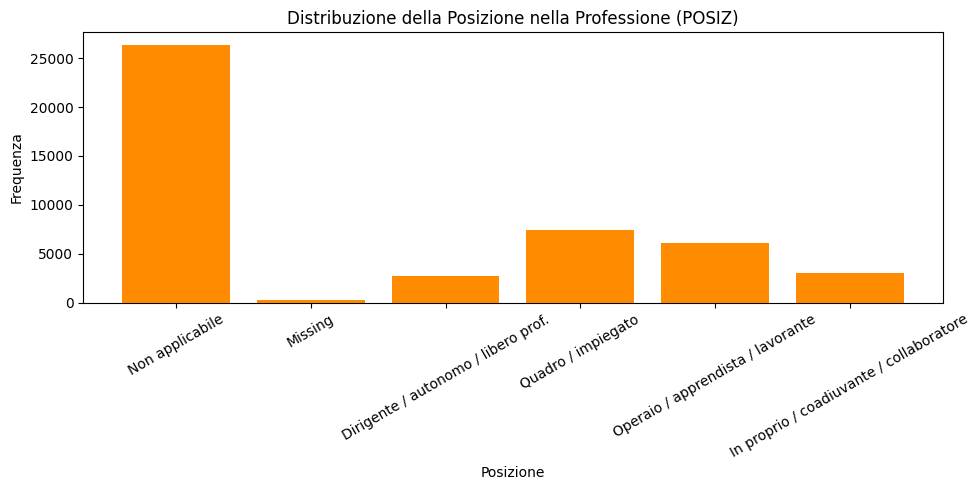

In [262]:
posiz_labels = {
    1: "Dirigente / autonomo / libero prof.",
    2: "Quadro / impiegato",
    3: "Operaio / apprendista / lavorante",
    4: "In proprio / coadiuvante / collaboratore",
   -1: "Missing",
   -2: "Non applicabile"
}

# Conta e mappa etichette
posiz_counts = df_tema_socio_economico['POSIZ'].value_counts().sort_index()
posiz_names = [posiz_labels.get(code, str(code)) for code in posiz_counts.index]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(posiz_names, posiz_counts.values, color='darkorange')
plt.title("Distribuzione della Posizione nella Professione (POSIZ)")
plt.xlabel("Posizione")
plt.ylabel("Frequenza")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [263]:
posiz_counts

POSIZ
-2    26326
-1      272
 1     2716
 2     7398
 3     6151
 4     3067
Name: count, dtype: int64

Il valore -2 = non applicabile per la variabile POSIZ si riferisce a persone per cui la domanda sulla posizione nella professione non è pertinente, cioè:

> persone che non lavorano, quindi non hanno una posizione lavorativa da indicare.



In [264]:
19604 + 26326
# Check if employed and unemployed are consistent with the total number of people

45930

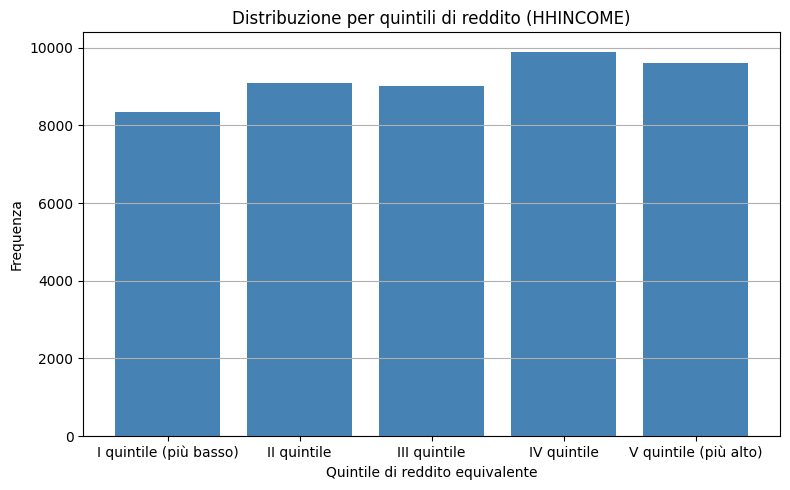

In [265]:
income_labels = {
    1: "I quintile (più basso)",
    2: "II quintile",
    3: "III quintile",
    4: "IV quintile",
    5: "V quintile (più alto)"
}

df_income = df_tema_socio_economico['HHINCOME'].value_counts().sort_index()
labels = [income_labels.get(val, str(val)) for val in df_income.index]

plt.figure(figsize=(8, 5))
plt.bar(labels, df_income.values, color='steelblue')
plt.title("Distribuzione per quintili di reddito (HHINCOME)")
plt.xlabel("Quintile di reddito equivalente")
plt.ylabel("Frequenza")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [266]:
df_income

HHINCOME
1    8339
2    9076
3    9018
4    9896
5    9601
Name: count, dtype: int64

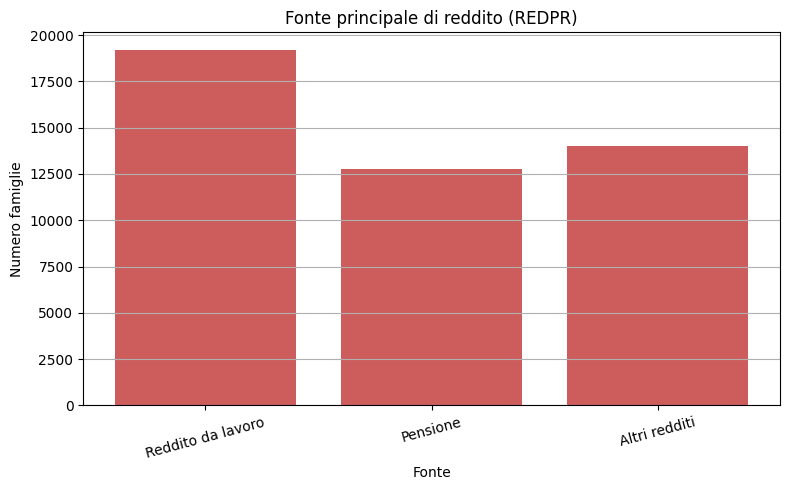

In [267]:
redpr_labels = {
    1: "Reddito da lavoro",
    2: "Pensione",
    3: "Altri redditi"
}

df_redpr = df_tema_socio_economico['REDPR'].value_counts().sort_index()
labels = [redpr_labels.get(val, f"Valore {val}") for val in df_redpr.index]

plt.figure(figsize=(8, 5))
plt.bar(labels, df_redpr.values, color='indianred')
plt.title("Fonte principale di reddito (REDPR)")
plt.xlabel("Fonte")
plt.ylabel("Numero famiglie")
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##### Dummies for the final dataset

In [268]:
# Titolo di studio (HATLEVEL4)
#df_finale['hat_nessun_titolo'] = (df_tema_socio_economico['HATLEVEL4'] == 1).astype(int)
# we merge missing with no title for simplicity
df_finale['hat_media'] = (df_tema_socio_economico['HATLEVEL4'] == 2).astype(int)
df_finale['hat_diploma'] = (df_tema_socio_economico['HATLEVEL4'] == 3).astype(int)
df_finale['hat_laurea'] = (df_tema_socio_economico['HATLEVEL4'] == 4).astype(int)

# Condizione professionale (MAINSTAT) 
df_finale['condizione_occupato'] = (df_tema_socio_economico['MAINSTAT'] == 10).astype(int)
df_finale['condizione_disoccupato'] = (df_tema_socio_economico['MAINSTAT'] == 20).astype(int)
df_finale['condizione_ritirato'] = (df_tema_socio_economico['MAINSTAT'] == 30).astype(int)
df_finale['condizione_altra'] = (df_tema_socio_economico['MAINSTAT'] == 80).astype(int)

# Posizione nella professione (POSIZ)
df_finale['posiz_dirigente_autonomo'] = (df_tema_socio_economico['POSIZ'] == 1).astype(int)
df_finale['posiz_impiegato'] = (df_tema_socio_economico['POSIZ'] == 2).astype(int)
df_finale['posiz_operaio'] = (df_tema_socio_economico['POSIZ'] == 3).astype(int)
df_finale['posiz_in_proprio'] = (df_tema_socio_economico['POSIZ'] == 4).astype(int)

# Quintile di reddito equivalente (HHINCOME)
df_finale['reddito'] = df_tema_socio_economico['HHINCOME']
# Fonte principale di reddito (REDPR) 
df_finale['fonte_reddito_da_lavoro'] = (df_tema_socio_economico['REDPR'] == 1).astype(int)
df_finale['fonte_pensione'] = (df_tema_socio_economico['REDPR'] == 2).astype(int)

# Condizioni Croniche e Limitazioni

In [269]:
tema_scelto = "Condizioni croniche e limitazioni"
df_tema_croniche_limitazioni = extract_df_by_tema(df, df_mapping, tema_scelto)
df_tema_croniche_limitazioni.head()

HS2  HS3  CD1A  CD1a1  CD1B  CD1b1  CD1C  CD1c1  CD1D  CD1d1  ...  ANSIA  \
0    2    3     2     -2     2     -2     2     -2     2     -2  ...      2   
1    1    2     2     -2     2     -2     2     -2     2     -2  ...      2   
2    1    2     2     -2     2     -2     2     -2     2     -2  ...      2   
3    2    3     2     -2     2     -2     2     -2     2     -2  ...      2   
4    2    3     2     -2     2     -2     2     -2     2     -2  ...      2   

   ANSIA1  TUMOR  TUMOR1  ALZH  ALZH1  PARKIN  PARKIN1  ALTCRO  ALTCRO1  
0      -2      2      -2     2     -2       2       -2      -1       -2  
1      -2      2      -2     2     -2       2       -2       2       -2  
2      -2      2      -2     2     -2       2       -2       2       -2  
3      -2      2      -2     2     -2       2       -2       2       -2  
4      -2      2      -2     2     -2       2       -2       2       -2  

[5 rows x 48 columns]

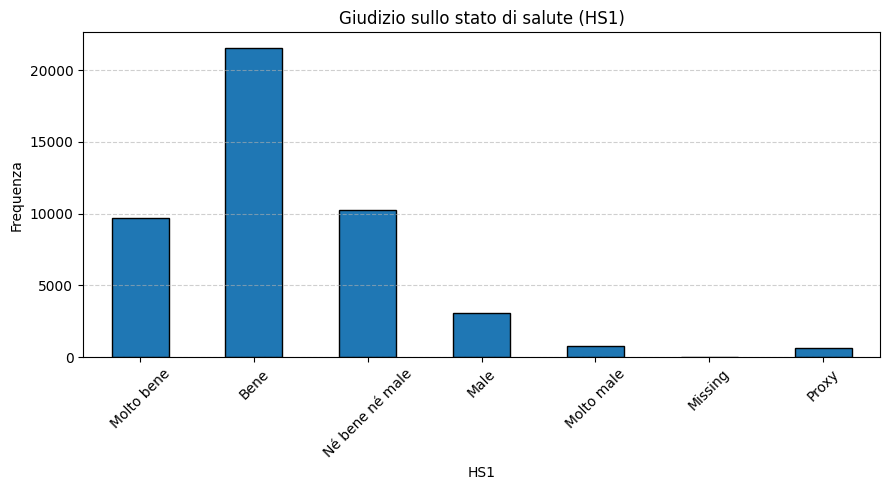

In [270]:
labels_HS1 = {
    1: "Molto bene",
    2: "Bene",
    3: "Né bene né male",
    4: "Male",
    5: "Molto male",
    -1: "Missing",
    -3: "Proxy"
}
order_HS1 = ["Molto bene", "Bene", "Né bene né male", "Male", "Molto male", "Missing", "Proxy"]

counts_HS1 = df['HS1'].value_counts().rename(index=labels_HS1)
counts_HS1 = counts_HS1.reindex(order_HS1)

plt.figure(figsize=(9, 5))
counts_HS1.plot(kind='bar', edgecolor='black')
plt.title("Giudizio sullo stato di salute (HS1)")
plt.ylabel("Frequenza")
plt.xlabel("HS1")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

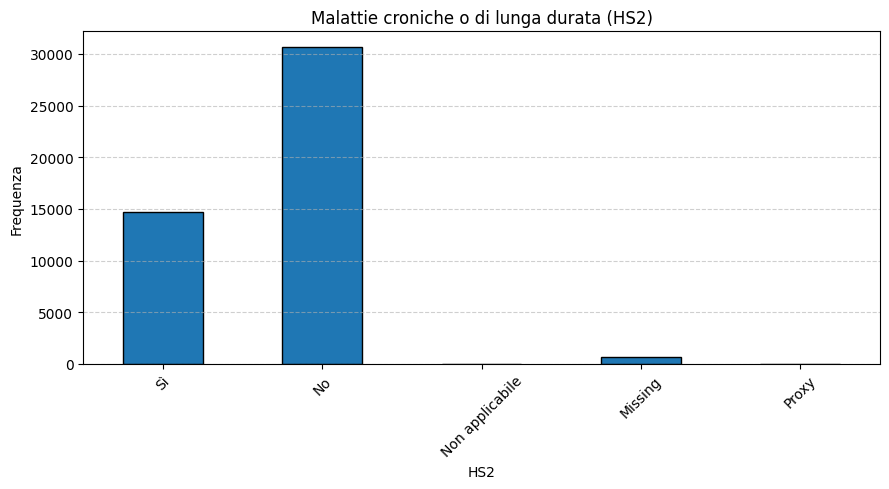

In [271]:
labels_HS2 = {
    1: "Sì",
    2: "No",
    -1: "Missing",
    -2: "Non applicabile",
    -3: "Proxy"
}
order_HS2 = ["Sì", "No", "Non applicabile", "Missing", "Proxy"]

counts_HS2 = df['HS2'].value_counts().rename(index=labels_HS2)
counts_HS2 = counts_HS2.reindex(order_HS2)

plt.figure(figsize=(9, 5))
counts_HS2.plot(kind='bar', edgecolor='black')
plt.title("Malattie croniche o di lunga durata (HS2)")
plt.ylabel("Frequenza")
plt.xlabel("HS2")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


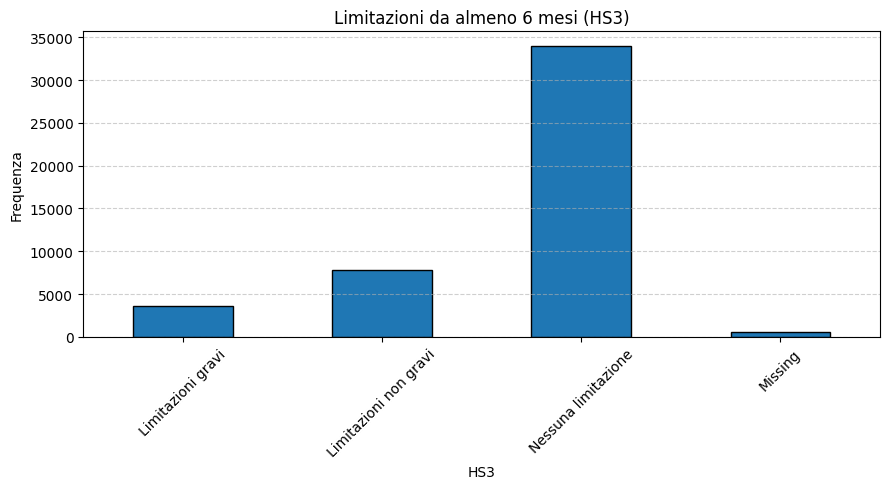

In [272]:
labels_HS3 = {
    1: "Limitazioni gravi",
    2: "Limitazioni non gravi",
    3: "Nessuna limitazione",
    -1: "Missing"
}
order_HS3 = ["Limitazioni gravi", "Limitazioni non gravi", "Nessuna limitazione", "Missing"]

counts_HS3 = df_tema_croniche_limitazioni['HS3'].value_counts().rename(index=labels_HS3)
counts_HS3 = counts_HS3.reindex(order_HS3)

plt.figure(figsize=(9, 5))
counts_HS3.plot(kind='bar', edgecolor='black')
plt.title("Limitazioni da almeno 6 mesi (HS3)")
plt.ylabel("Frequenza")
plt.xlabel("HS3")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


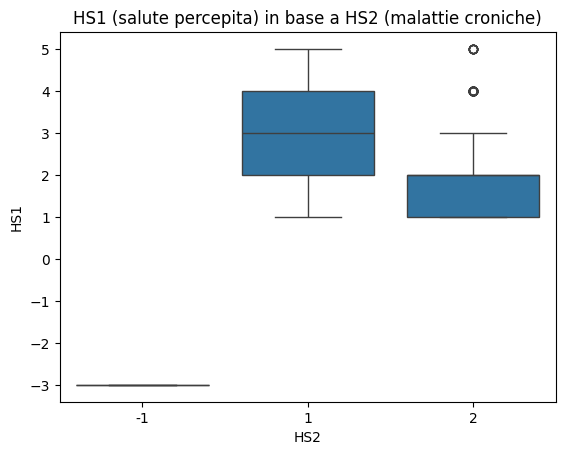

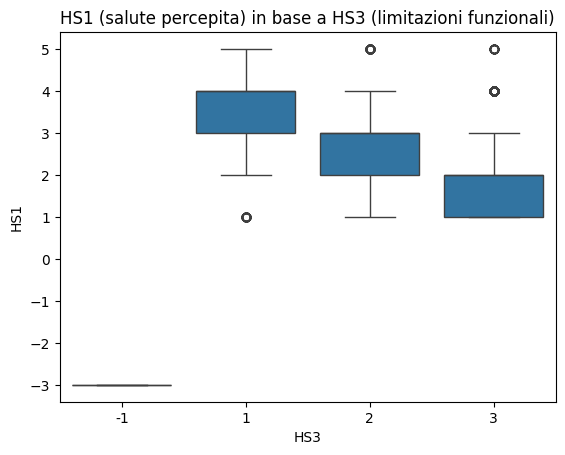

In [273]:
sns.boxplot(x='HS2', y='HS1', data=df)
plt.title("HS1 (salute percepita) in base a HS2 (malattie croniche)")
plt.show()

sns.boxplot(x='HS3', y='HS1', data=df)
plt.title("HS1 (salute percepita) in base a HS3 (limitazioni funzionali)")
plt.show()

In [274]:
pd.crosstab(df['HS2'], df['HS3'], normalize='index')

HS3   -1         1         2         3
HS2                                   
-1   1.0  0.000000  0.000000  0.000000
 1   0.0  0.230822  0.416434  0.352745
 2   0.0  0.005676  0.054120  0.940204

In [275]:
subset = df[['HS1', 'HS2', 'HS3']].copy()
# Rimuovi valori speciali (missing/proxy)
subset = subset[(subset['HS1'] > 0) & (subset['HS2'] > 0) & (subset['HS3'] > 0)]
subset.corr(method='spearman')


HS1       HS2       HS3
HS1  1.000000 -0.558684 -0.587206
HS2 -0.558684  1.000000  0.640036
HS3 -0.587206  0.640036  1.000000

Le correlazioni sono moderatamente forti e coerenti col modello teorico.

- La salute percepita (HS1) è più negativa in presenza di malattie croniche (HS2) e limitazioni funzionali (HS3).

- Le limitazioni sono un ponte tra condizioni oggettive (HS2) e percezioni soggettive (HS1).



In [276]:
df_finale["HS1_ord"] = df["HS1"].replace({-1: 0, -3: 0})  # Missing and Proxy to 0

# --- Dummies per HS2 (baseline implicita: Missing) ---
df_finale["cronico_sì"] = (df["HS2"] == 1).astype(int)
df_finale["cronico_no"] = (df["HS2"] == 2).astype(int)
# HS2 == -1 è il baseline (Missing)

# --- Dummies per HS3 (baseline implicita: Missing) ---
df_finale["lim_gravi"] = (df["HS3"] == 1).astype(int)
df_finale["lim_non_gravi"] = (df["HS3"] == 2).astype(int)
df_finale["lim_nessuna"] = (df["HS3"] == 3).astype(int)
# HS3 == -1 è il baseline (Missing)
#df_finale.drop(columns=['HS1_ord'], inplace=True)
# --- Facoltativo: Visualizza le prime righe per controllo ---
df_finale[["HS1_ord", "cronico_sì", "cronico_no", "lim_gravi", "lim_non_gravi", "lim_nessuna"]].head()

HS1_ord  cronico_sì  cronico_no  lim_gravi  lim_non_gravi  lim_nessuna
0        3           0           1          0              0            1
1        3           1           0          0              1            0
2        3           1           0          0              1            0
3        2           0           1          0              0            1
4        1           0           1          0              0            1

### Focus su Sintomi / Diagnosi

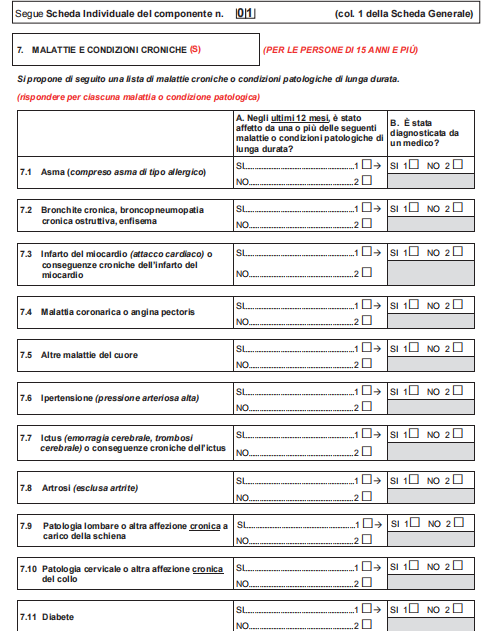

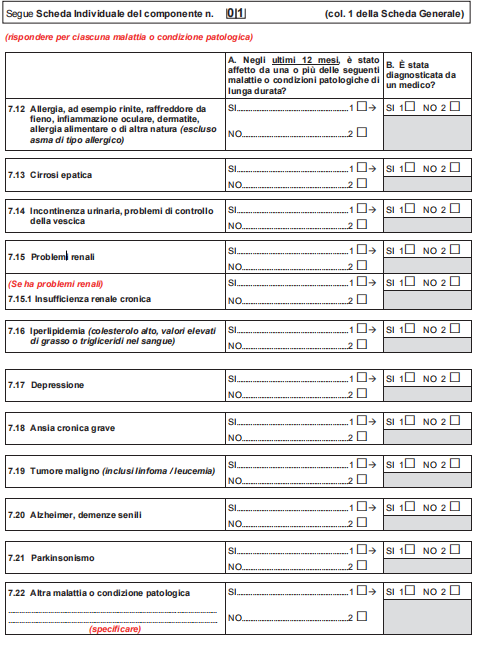

In [277]:
cd_labels = {
    1: "Sì",
    2: "No",
   -1: "Missing",
   -2: "Non applicabile",
   -3: "Proxy" # We didn't find any case with this value
}

pairs = [
    ('CD1A', 'CD1a1'),
    ('CD1B', 'CD1b1'),
    ('CD1C', 'CD1c1'),
    ('CD1D', 'CD1d1'),
    ('CD1E', 'CD1e1'),
    ('CUORE', 'CUORE1'),
    ('CD1F', 'CD1f1'),
    ('CD1G', 'CD1g1'),
    ('CD1H', 'CD1h1'),
    ('CD1I', 'CD1i1'),
    ('CD1J', 'CD1j1'),
    ('CD1K', 'CD1k1'),
    ('CD1L', 'CD1l1'),
    ('CD1M', 'CD1m1'),
   # ('CD1N', 'CD1n1'), reason we will not consider them for now later
   # ('INREN', 'INREN1'),
    ('CD1O', 'CD1o1'),
    ('CD1P', 'CD1p1'),
    ('ANSIA', 'ANSIA1'),
    ('TUMOR', 'TUMOR1'),
    ('ALZH', 'ALZH1'),
    ('PARKIN', 'PARKIN1'),
    ('ALTCRO', 'ALTCRO1')
]


In [278]:
# plot remove to save space, it was usefull for the insights of the next analysis
""""
for sintomo, diagnosi in pairs:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot sintomo riferito
    val_counts_s = df_tema_croniche_limitazioni[sintomo].value_counts().sort_index()
    labels_s = [cd_labels.get(val, str(val)) for val in val_counts_s.index]
    axs[0].bar(labels_s, val_counts_s.values, color='skyblue')
    axs[0].set_title(f"{sintomo} – Sintomo riferito")
    axs[0].set_ylabel("Frequenza")
    #print(val_counts_s)
    # Plot diagnosi medica
    val_counts_d = df_tema_croniche_limitazioni[diagnosi].value_counts().sort_index()
    labels_d = [cd_labels.get(val, str(val)) for val in val_counts_d.index]
    axs[1].bar(labels_d, val_counts_d.values, color='salmon')
    axs[1].set_title(f"{diagnosi} – Diagnosi medica")
    #print(val_counts_d)
    # Layout
    for ax in axs:
        ax.grid(True)
        ax.set_xlabel("Risposta")
    plt.tight_layout()
    plt.show()
"""

'"\nfor sintomo, diagnosi in pairs:\n    fig, axs = plt.subplots(1, 2, figsize=(12, 4))\n    \n    # Plot sintomo riferito\n    val_counts_s = df_tema_croniche_limitazioni[sintomo].value_counts().sort_index()\n    labels_s = [cd_labels.get(val, str(val)) for val in val_counts_s.index]\n    axs[0].bar(labels_s, val_counts_s.values, color=\'skyblue\')\n    axs[0].set_title(f"{sintomo} – Sintomo riferito")\n    axs[0].set_ylabel("Frequenza")\n    #print(val_counts_s)\n    # Plot diagnosi medica\n    val_counts_d = df_tema_croniche_limitazioni[diagnosi].value_counts().sort_index()\n    labels_d = [cd_labels.get(val, str(val)) for val in val_counts_d.index]\n    axs[1].bar(labels_d, val_counts_d.values, color=\'salmon\')\n    axs[1].set_title(f"{diagnosi} – Diagnosi medica")\n    #print(val_counts_d)\n    # Layout\n    for ax in axs:\n        ax.grid(True)\n        ax.set_xlabel("Risposta")\n    plt.tight_layout()\n    plt.show()\n'

I have found out that:
> non applicabile = NO + sintomo MISSING

> Sintomo SI = diagnosi SI + diagnosi NO

We can reduce the total number of variables from 6 each pair to just 4, it will reduce our dataset by more than 40 variables keeping the same information (actually making it more clear for interpretation also)

In [279]:
# Funzione generica per classificare ogni riga
def classify_cronic_pair(sintomo, diagnosi):
    if sintomo == 2:
        return 'sintomo_no'
    elif sintomo == -1:
        return 'sintomo_missing'
    elif sintomo == 1 and diagnosi == 1:
        return 'sintomo_con_diagnosi'
    elif sintomo == 1 and diagnosi == 2:
        return 'sintomo_senza_diagnosi'

# Loop su tutte le coppie
for sintomo_var, diagnosi_var in pairs:
    cat_var = f"{sintomo_var}_CAT"
    df_tema_croniche_limitazioni[cat_var] = df_tema_croniche_limitazioni.apply(
        lambda row: classify_cronic_pair(row[sintomo_var], row[diagnosi_var]), axis=1
    )


C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1637840284.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tema_croniche_limitazioni[cat_var] = df_tema_croniche_limitazioni.apply(
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1637840284.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tema_croniche_limitazioni[cat_var] = df_tema_croniche_limitazioni.apply(
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1637840284.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [280]:
sum(df_tema_croniche_limitazioni['CD1B_CAT'] == 'sintomo_con_diagnosi') + \
    sum(df_tema_croniche_limitazioni['CD1B_CAT'] == 'sintomo_senza_diagnosi') + \
    sum(df_tema_croniche_limitazioni['CD1B_CAT'] == 'sintomo_no') + \
    sum(df_tema_croniche_limitazioni['CD1B_CAT'] == 'sintomo_missing') 
# check that sum match

45930

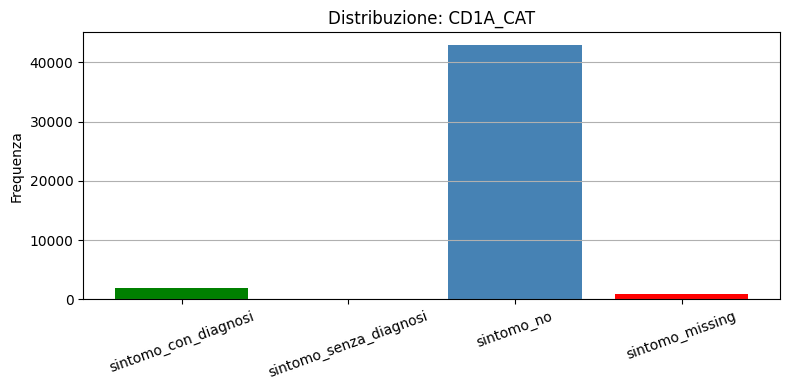

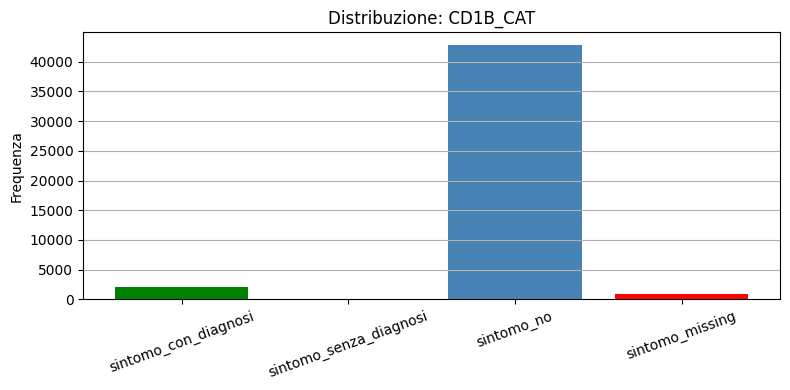

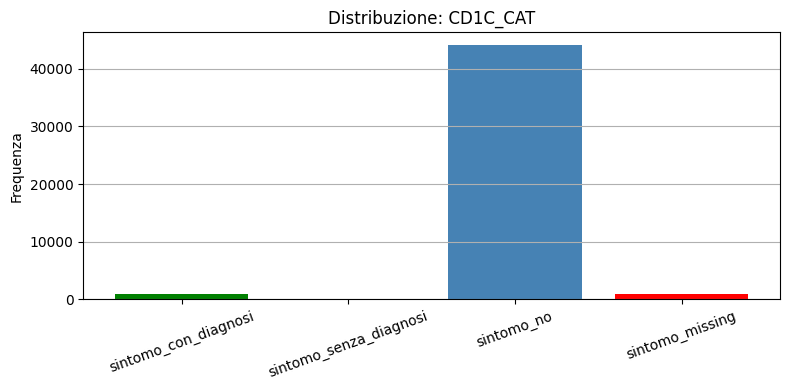

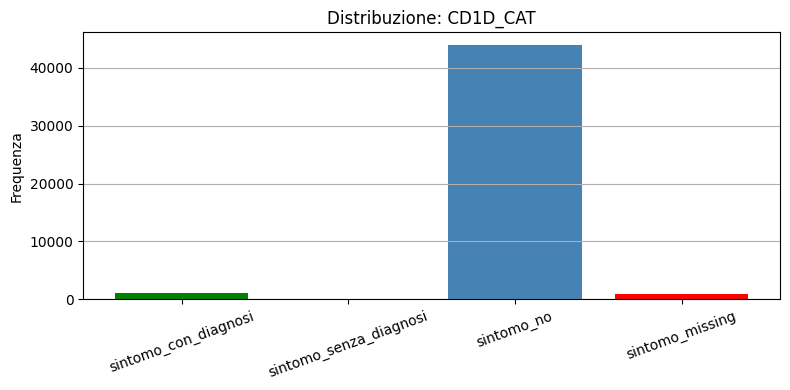

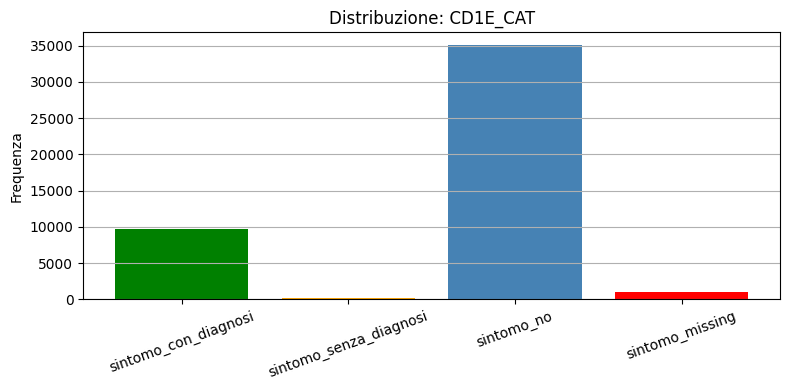

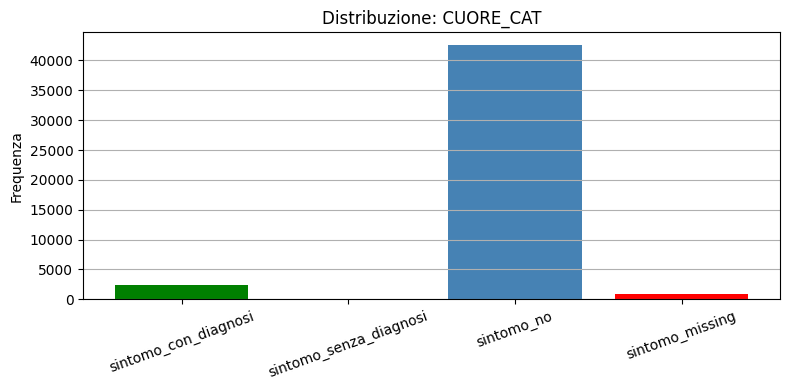

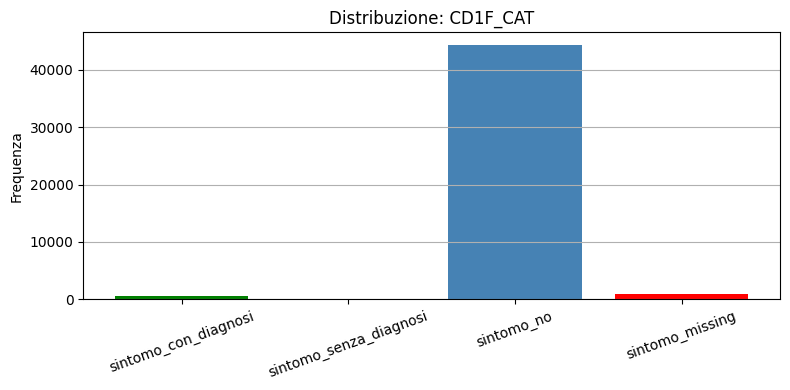

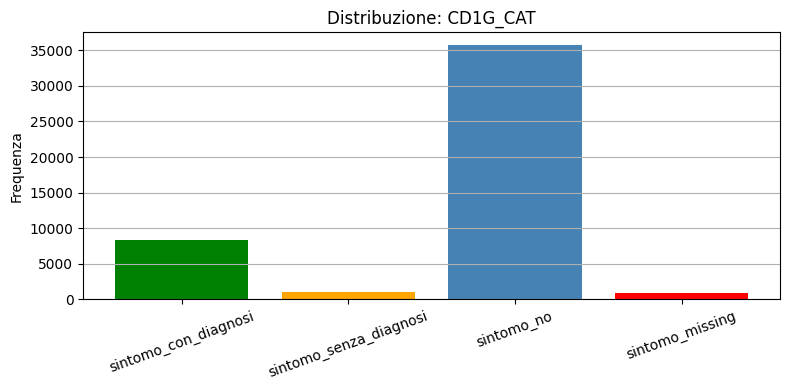

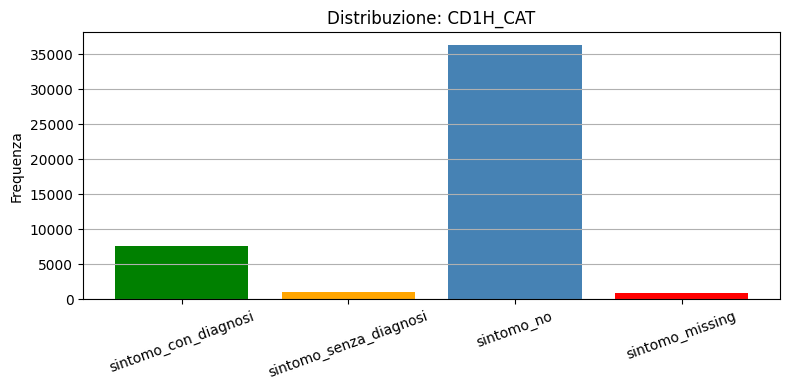

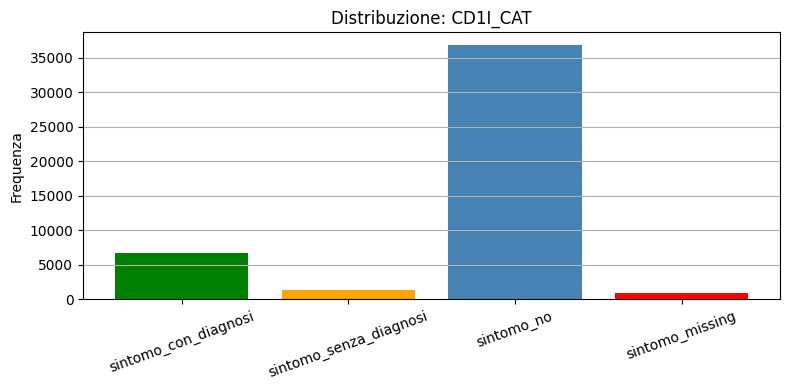

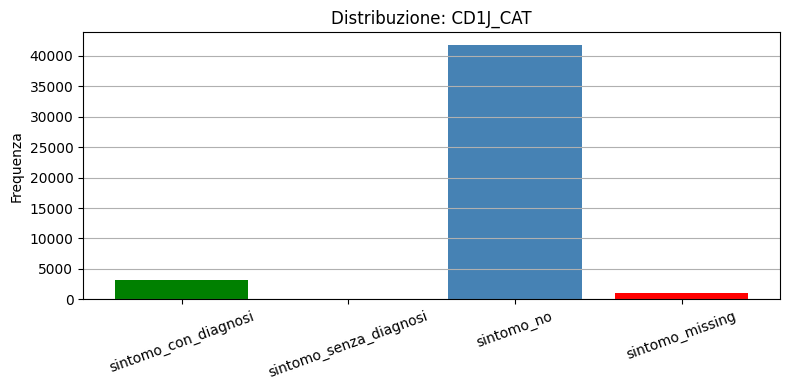

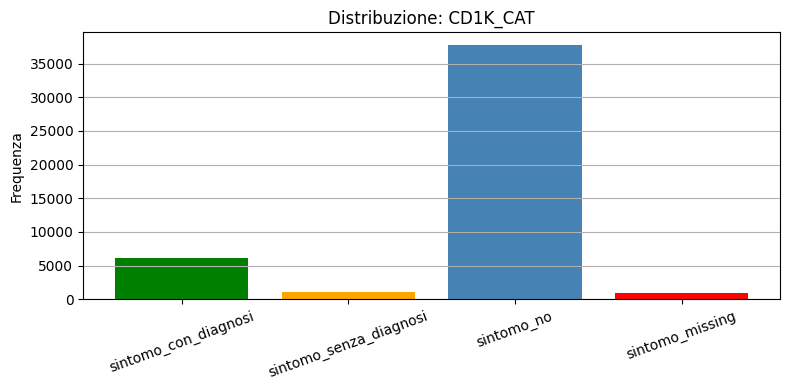

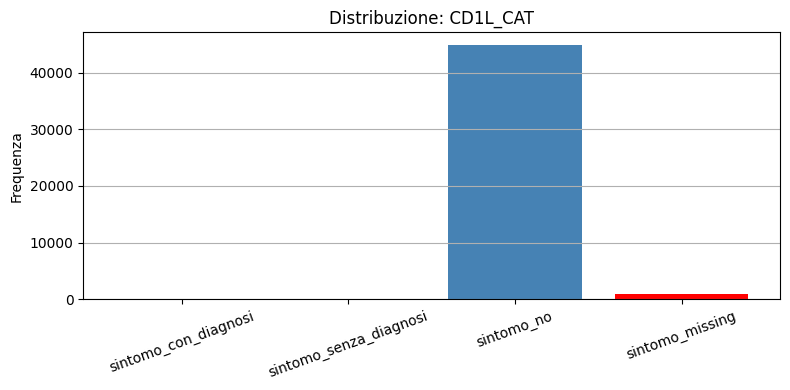

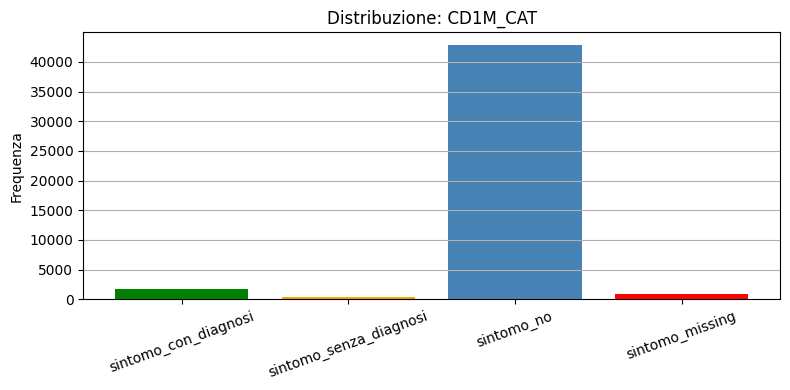

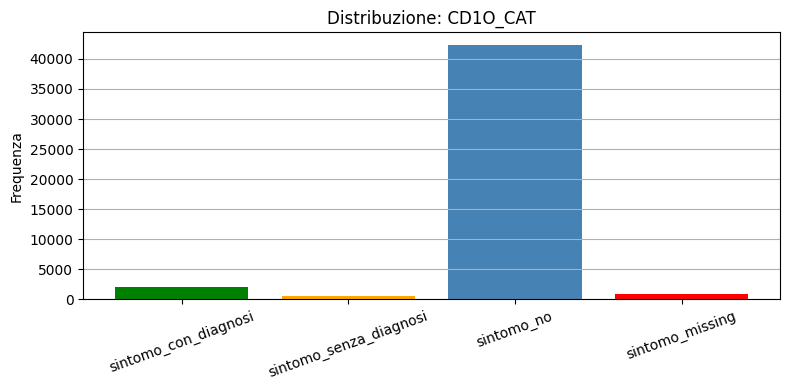

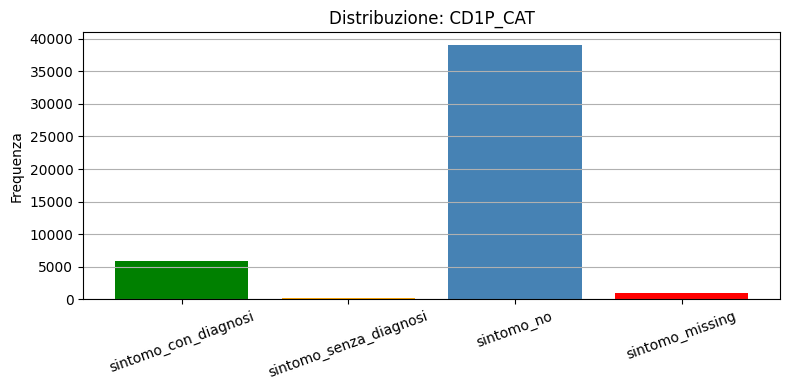

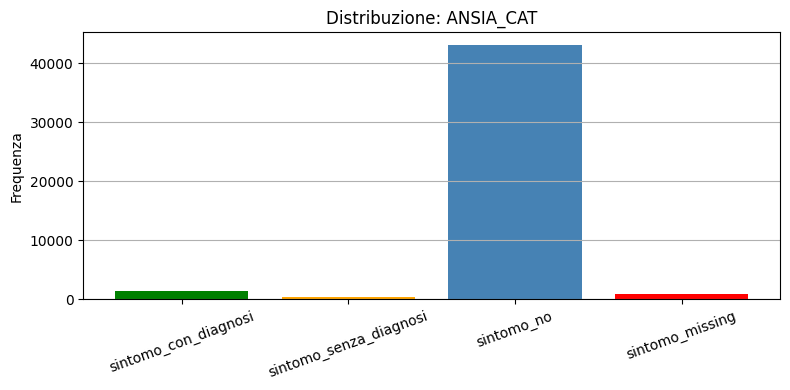

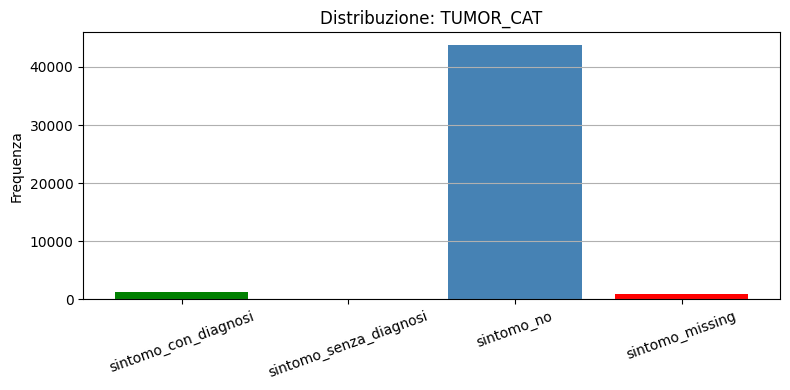

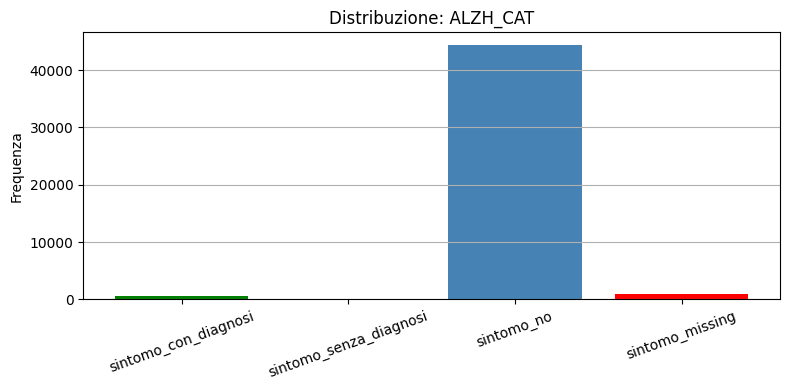

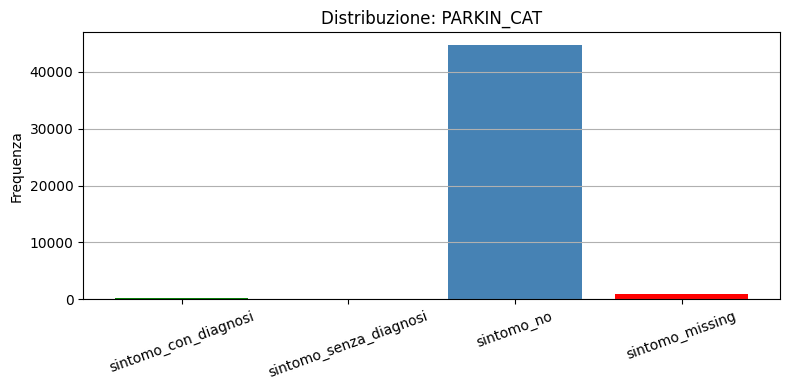

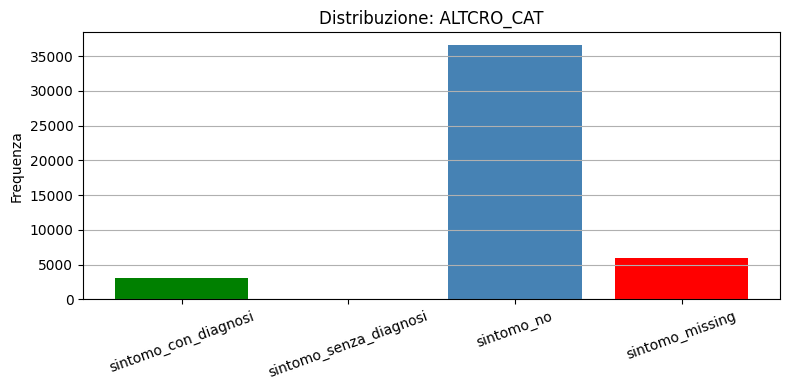

In [281]:
# cat vars = var that end with _CAT
cat_vars = [col for col in df_tema_croniche_limitazioni.columns if col.endswith('_CAT')]
category_order = ['sintomo_con_diagnosi', 'sintomo_senza_diagnosi', 'sintomo_no', 'sintomo_missing']
colors = ['green', 'orange', 'steelblue', 'red']

# Loop per plot
for var in cat_vars:
    counts = df_tema_croniche_limitazioni[var].value_counts().reindex(category_order, fill_value=0)
    
    plt.figure(figsize=(8, 4))
    plt.bar(counts.index, counts.values, color=colors)
    plt.title(f"Distribuzione: {var}")
    plt.ylabel("Frequenza")
    plt.xticks(rotation=20)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


In [282]:
# insufficienza renale cronica è l'unica patologia con andamento particolare
print("Distribuzione INREN e INREN1:")
print(df_tema_croniche_limitazioni['INREN'].value_counts().sort_index())
print(df_tema_croniche_limitazioni['INREN1'].value_counts().sort_index())

Distribuzione INREN e INREN1:
INREN
-2    44058
 1      537
 2     1335
Name: count, dtype: int64
INREN1
-2    45393
 1      537
Name: count, dtype: int64


INREN1 si può semplicemente eliminare, servono piu' insights su INREN

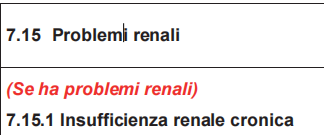

In [283]:
df_tema_croniche_limitazioni['CD1N_CAT'] = df_tema_croniche_limitazioni.apply(
    lambda row: classify_cronic_pair(row['CD1N'], row['CD1n1']), axis=1
)

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1127566541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tema_croniche_limitazioni['CD1N_CAT'] = df_tema_croniche_limitazioni.apply(


In [284]:
df_tema_croniche_limitazioni['CD1N_CAT'].value_counts().sort_index()

CD1N_CAT
sintomo_con_diagnosi       1797
sintomo_missing             962
sintomo_no                43096
sintomo_senza_diagnosi       75
Name: count, dtype: int64

In [285]:
# Copia la colonna originale
df_tema_croniche_limitazioni['CD1N_CAT_EXT'] = df_tema_croniche_limitazioni['CD1N_CAT']

df_tema_croniche_limitazioni.loc[
    (df_tema_croniche_limitazioni['CD1N_CAT'] == 'sintomo_con_diagnosi') & 
    (df_tema_croniche_limitazioni['INREN'] == 1),
    'CD1N_CAT_EXT'
] = 'sintomo_con_diagnosi_calcolo_si'

df_tema_croniche_limitazioni.loc[
    (df_tema_croniche_limitazioni['CD1N_CAT'] == 'sintomo_con_diagnosi') & 
    (df_tema_croniche_limitazioni['INREN'] != 1),
    'CD1N_CAT_EXT'
] = 'sintomo_con_diagnosi_calcolo_no'

df_tema_croniche_limitazioni.loc[
    (df_tema_croniche_limitazioni['CD1N_CAT'] == 'sintomo_senza_diagnosi') & 
    (df_tema_croniche_limitazioni['INREN'] == 1),
    'CD1N_CAT_EXT'
] = 'sintomo_senza_diagnosi_calcolo_si'

df_tema_croniche_limitazioni.loc[
    (df_tema_croniche_limitazioni['CD1N_CAT'] == 'sintomo_senza_diagnosi') & 
    (df_tema_croniche_limitazioni['INREN'] != 1),
    'CD1N_CAT_EXT'
] = 'sintomo_senza_diagnosi_calcolo_no'
print(df_tema_croniche_limitazioni['CD1N_CAT_EXT'].value_counts())


CD1N_CAT_EXT
sintomo_no                           43096
sintomo_con_diagnosi_calcolo_no       1262
sintomo_missing                        962
sintomo_con_diagnosi_calcolo_si        535
sintomo_senza_diagnosi_calcolo_no       73
sintomo_senza_diagnosi_calcolo_si        2
Name: count, dtype: int64


C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\4252585541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tema_croniche_limitazioni['CD1N_CAT_EXT'] = df_tema_croniche_limitazioni['CD1N_CAT']


In [286]:
43096 + 1262 + 962 + 535 + 73 + 2

45930

##### Saving in final DF

In [287]:
# Funzione per classificare ogni coppia sintomo/diagnosi
def classify_cronic_pair(sintomo, diagnosi):
    #if sintomo == 2:
        #return 'sintomo_no'  # this will be our baseline
    if sintomo == -1:
        return 'sintomo_missing'
    elif sintomo == 1 and diagnosi == 1:
        return 'sintomo_con_diagnosi'
    elif sintomo == 1 and diagnosi == 2:
        return 'sintomo_senza_diagnosi'

# Lista delle coppie da processare (escludendo INREN per ora)
pairs = [
    ('CD1A', 'CD1a1'), ('CD1B', 'CD1b1'), ('CD1C', 'CD1c1'), ('CD1D', 'CD1d1'),
    ('CD1E', 'CD1e1'), ('CUORE', 'CUORE1'), ('CD1F', 'CD1f1'), ('CD1G', 'CD1g1'),
    ('CD1H', 'CD1h1'), ('CD1I', 'CD1i1'), ('CD1J', 'CD1j1'), ('CD1K', 'CD1k1'),
    ('CD1L', 'CD1l1'), ('CD1M', 'CD1m1'), ('CD1O', 'CD1o1'), ('CD1P', 'CD1p1'),
    ('ANSIA', 'ANSIA1'), ('TUMOR', 'TUMOR1'), ('ALZH', 'ALZH1'),
    ('PARKIN', 'PARKIN1'), ('ALTCRO', 'ALTCRO1')
]

# Codifica le nuove variabili di categoria nel dataframe finale
for sintomo_var, diagnosi_var in pairs:
    cat_var = f"{sintomo_var}_CAT"
    df_finale[cat_var] = df_tema_croniche_limitazioni.apply(
        lambda row: classify_cronic_pair(row[sintomo_var], row[diagnosi_var]), axis=1
    )
    
    # Crea dummies 0/1 a partire dalla variabile categoriale (tutte le 4 modalità)
    dummies = pd.get_dummies(df_finale[cat_var], prefix=cat_var)
    df_finale = pd.concat([df_finale, dummies], axis=1)

# --- CD1N + INREN: categorizzazione estesa ---
df_finale['CD1N_CAT'] = df_tema_croniche_limitazioni.apply(
    lambda row: classify_cronic_pair(row['CD1N'], row['CD1n1']), axis=1
)

# Estensione della categoria in base a INREN
df_finale['CD1N_CAT_EXT'] = df_finale['CD1N_CAT']
df_finale.loc[
    (df_finale['CD1N_CAT'] == 'sintomo_con_diagnosi') & (df_tema_croniche_limitazioni['INREN'] == 1),
    'CD1N_CAT_EXT'
] = 'sintomo_con_diagnosi_calcolo_si'
df_finale.loc[
    (df_finale['CD1N_CAT'] == 'sintomo_con_diagnosi') & (df_tema_croniche_limitazioni['INREN'] != 1),
    'CD1N_CAT_EXT'
] = 'sintomo_con_diagnosi_calcolo_no'
df_finale.loc[
    (df_finale['CD1N_CAT'] == 'sintomo_senza_diagnosi') & (df_tema_croniche_limitazioni['INREN'] == 1),
    'CD1N_CAT_EXT'
] = 'sintomo_senza_diagnosi_calcolo_si'
df_finale.loc[
    (df_finale['CD1N_CAT'] == 'sintomo_senza_diagnosi') & (df_tema_croniche_limitazioni['INREN'] != 1),
    'CD1N_CAT_EXT'
] = 'sintomo_senza_diagnosi_calcolo_no'

# Dummies anche per CD1N esteso
dummies_cd1n = pd.get_dummies(df_finale['CD1N_CAT_EXT'], prefix='CD1N_CAT_EXT')
df_finale = pd.concat([df_finale, dummies_cd1n], axis=1)

colonne_da_rimuovere = [col for col in df_finale.columns if col.endswith('_CAT')]
df_finale.drop(columns=colonne_da_rimuovere, inplace=True)

# Seleziona solo le colonne booleane (True/False)
colonne_bool = df_finale.select_dtypes(include=['bool']).columns

# Converte ogni colonna boolean in 0/1 in-place
for col in colonne_bool:
    df_finale[col] = df_finale[col].astype(int)

df_finale.drop(columns=['CD1N_CAT_EXT'], inplace=True)

# Salute percepita

In [288]:
tema_scelto = "Salute percepita"
df_tema_salute_percepita = extract_df_by_tema(df, df_mapping, tema_scelto)
df_tema_salute_percepita.head()

HS1  CD2  PN1  PN2  MH1A  MH1B  MH1C  MH1D
0    3    2    1    1     2     1     2     2
1    3    2    1    1     1     2     4     2
2    3    3    4    3     2     2     1     4
3    2    4    1    1     1     1     1     1
4    1    2    3    1     2     2     1     1

# Infortuni e Assenze

In [289]:
tema_scelto = "Infortuni e assenze"
df_tema_infortuni_assenze = extract_df_by_tema(df, df_mapping, tema_scelto)
df_tema_infortuni_assenze.head()

AC1A  AC1AN  AC1B  AC1BN  AC1C  AC1cN  AC2  AW1  AW2
0     2     -2     2     -2     2     -2   -2    1    2
1     2     -2     2     -2     2     -2   -2    2   -2
2     2     -2     2     -2     2     -2   -2   -2   -2
3     2     -2     2     -2     2     -2   -2    1    1
4     2     -2     2     -2     2     -2   -2   -2   -2

In [290]:
df['AC1A'].value_counts()
# 768 + 56 = 824 

AC1A
 2    44234
-1      872
 1      824
Name: count, dtype: int64

In [291]:
# --- INFORTUNI STRADALI ---
df_finale['incidenti_stradali_no'] = (df['AC1A'] == 2).astype(int)
df_finale['un_incidente_stradale'] = (df['AC1AN'] == 1).astype(int)
df_finale['duepiu_incidenti_stradali'] = (df['AC1AN'] == 2).astype(int)

# --- INFORTUNI DOMESTICI ---
df_finale['infortunio_domestico_no'] = (df['AC1B'] == 2).astype(int)
df_finale['un_infortunio_domestico'] = (df['AC1BN'] == 1).astype(int)
df_finale['duepiu_infortuni_domestici'] = (df['AC1BN'] == 2).astype(int)

# --- INFORTUNI TEMPO LIBERO ---
df_finale['infortunio_tempo_libero_no'] = (df['AC1C'] == 2).astype(int)
df_finale['un_infortunio_tempo_libero'] = (df['AC1cN'] == 1).astype(int)
df_finale['duepiu_infortuni_tempo_libero'] = (df['AC1cN'] == 2).astype(int)

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1014167810.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['incidenti_stradali_no'] = (df['AC1A'] == 2).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1014167810.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['un_incidente_stradale'] = (df['AC1AN'] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1014167810.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

In [292]:
print(df['AW1'].value_counts())
print(df['AW2'].value_counts())
# 5813
3457 + 934 + 889 + 480 + 53
# AW1 info is already contained in AW2, so we can drop AW1

AW1
-2    26326
 2    13521
 1     5813
-1      270
Name: count, dtype: int64
AW2
-2    40117
 1     3457
 3      934
 2      889
 4      480
 5       53
Name: count, dtype: int64


5813

In [293]:
df['AW1'].value_counts()
# from AW1 : (-2), (2), (-1)
# 26326 + 13521 + 270

AW1
-2    26326
 2    13521
 1     5813
-1      270
Name: count, dtype: int64

In [294]:
df_finale["ac2_ricovero"] = (df["AC2"] == 1).astype(int)
df_finale["ac2_cure_senza_ricovero"] = (df["AC2"] == 2).astype(int)
df_finale["ac2_cure_non_necessarie"] = (df["AC2"] == 3).astype(int)

df_finale["aw2_1_7giorni"] = (df["AW2"] == 1).astype(int)
df_finale["aw2_8_14giorni"] = (df["AW2"] == 2).astype(int)
df_finale["aw2_15_30giorni"] = (df["AW2"] == 3).astype(int)
df_finale["aw2_31_180giorni"] = (df["AW2"] == 4).astype(int)
df_finale["aw2_181plus_giorni"] = (df["AW2"] == 5).astype(int)

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1323778717.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["ac2_ricovero"] = (df["AC2"] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1323778717.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["ac2_cure_senza_ricovero"] = (df["AC2"] == 2).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1323778717.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

# Vista / Udito

In [295]:
tema_scelto = "Vista / Udito"
df_tema_vista_udito = extract_df_by_tema(df, df_mapping, tema_scelto)
df_tema_vista_udito.head()

PL1  PL2  PL3  PL4  PL5
0    1    1    2    1    1
1    2    1    2    1    1
2    1    1    2    2    2
3    2    1    2    1    1
4    1    1    2    1    2

In [296]:
# Variabili binarie (uso ausili)
df_finale['usa_occhiali'] = (df['PL1'] == 1).astype(int)
df_finale['non_usa_occhiali'] = (df['PL1'] == 2).astype(int)
df_finale['usa_apparecchio_acustico'] = (df['PL3'] == 1).astype(int)
df_finale['non_usa_apparecchio_acustico'] = (df['PL3'] == 2).astype(int)

# df_tema_vista_udito['PL2'].where(df_tema_vista_udito['PL1'] == 2).value_counts()
# You can have difficulties even if you wear or not glasses, so we will not drop PL2 == 2

# Difficoltà visiva anche con occhiali (PL2)
# da non ho difficolta -> a la difficoltà è grave
df_finale['difficolta_visiva_ord'] = df['PL2'].replace({
    1: 1, 2: 2, 3: 3, 4: 4, -1: 0
})

# Difficoltà uditiva (PL4: in stanza silenziosa, PL5: in stanza rumorosa)
df_finale['difficolta_udito_silenzio_ord'] = df['PL4'].replace({
    1: 1, 2: 2, 3: 3, 4: 4, -1: 0
})
df_finale['difficolta_udito_rumore_ord'] = df['PL5'].replace({
    1: 1, 2: 2, 3: 3, 4: 4, -1: 0
})

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\144820961.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['usa_occhiali'] = (df['PL1'] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\144820961.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['non_usa_occhiali'] = (df['PL1'] == 2).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\144820961.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has p

# Limitazioni funzionali e autonomia

In [297]:
tema_scelto = "Limitazioni funzionali e autonomia"
df_tema_autonomia = extract_df_by_tema(df, df_mapping, tema_scelto)
df_tema_autonomia.head()

PL6  PL7  PL8  PL9  PC1A  PC1B  PC1C  PC1D  PC1E  PC2  ...  HA1E  HA1F  \
0    1    1    1   -2    -2    -2    -2    -2    -2   -2  ...    -2    -2   
1    1    1    1   -2    -2    -2    -2    -2    -2   -2  ...    -2    -2   
2    1    1    2    2     1     1     1     1     1   -2  ...     1     1   
3    1    1    1   -2    -2    -2    -2    -2    -2   -2  ...    -2    -2   
4    1    1    1   -2    -2    -2    -2    -2    -2   -2  ...    -2    -2   

   HA1G  HA2  HA21AB  HA21CEF  HA21d  HA21g  HA3  HA45  
0    -2   -2      -2       -2     -2     -2   -2    -2  
1    -2   -2      -2       -2     -2     -2   -2    -2  
2     1   -2      -2       -2     -2     -2   -2    -2  
3    -2   -2      -2       -2     -2     -2   -2    -2  
4    -2   -2      -2       -2     -2     -2   -2    -2  

[5 rows x 30 columns]

In [298]:
# CAMMINARE 500m
df_finale['cammina_500m'] = df['PL6'].replace({1: 1, 2: 2, 3: 4, 4: 4, -1: 0})

# SCALE (12 scalini)
df_finale['fa_scale'] = df['PL7'].replace({1: 1, 2: 2, 3: 4, 4: 4, -1: 0})

# MEMORIA / CONCENTRAZIONE
df_finale['memoria'] = df['PL8'].replace({1: 1, 2: 2, 3: 4, 4: 4, -1: 0})

# MASTICAZIONE (mela dura)
df_finale['mastica'] = df['PL9'].replace({1: 1, 2: 2, 3: 4, 4: 4, -1: 0, -2:0})

# we keep missing data here, maybe a boosting model might help to deal with it

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1941290437.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['cammina_500m'] = df['PL6'].replace({1: 1, 2: 2, 3: 4, 4: 4, -1: 0})
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1941290437.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['fa_scale'] = df['PL7'].replace({1: 1, 2: 2, 3: 4, 4: 4, -1: 0})
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1941290437.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling

In [299]:
# PC2 = 1 is 2463
50 + 439 + 1974
# not applicable for later
42725 + 742

43467

In [300]:
df['PC21AB'].value_counts()

PC21AB
-2    43467
 1     2035
 2      378
-1       50
Name: count, dtype: int64

In [301]:
# Conversione ordinale per ogni funzione base
for col in ['PC1A', 'PC1B', 'PC1C', 'PC1D', 'PC1E']:
    df_finale[col + '_ord'] = df[col].replace({1: 1, 2: 2, 3: 3, 4: 4, -1: 0, -2: 0})

df_finale['non_riceve_aiuto'] = (df['PC2'] == 1).astype(int)

df_finale['usa_ausili'] = (df['PC21G'] == 1).astype(int)
df_finale['non_usa_ausili'] = (df['PC21G'] == 2).astype(int)
df_finale['aiuto_familiari'] = (df['PC21AB'] == 1).astype(int)
df_finale['no_aiuto_familiari'] = (df['PC21AB'] == 2).astype(int)
df_finale['aiuto_terzi'] = (df['PC21CEF'] == 1).astype(int)
df_finale['no_aiuto_terzi'] = (df['PC21CEF'] == 1).astype(int)
df_finale['aiuto_pagato'] = (df['PC21D'] == 1).astype(int)
df_finale['no_aiuto_pagato'] = (df['PC21D'] == 1).astype(int)


# Ha bisogno di più aiuto
df_finale['bisogno_aiuto_aggiuntivo'] = (df['PC3'] == 1).astype(int)
df_finale['non_ho_bisogno_aiuto_aggiuntivo'] = (df['PC3'] == 2).astype(int)

# Tipo di aiuto usato
df_finale['usa_solo_ausili'] = (df['PC45'] == 1).astype(int)
df_finale['usa_solo_persone'] = (df['PC45'] == 2).astype(int)
df_finale['usa_entrambi'] = (df['PC45'] == 3).astype(int)

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1060111917.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale[col + '_ord'] = df[col].replace({1: 1, 2: 2, 3: 3, 4: 4, -1: 0, -2: 0})
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1060111917.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale[col + '_ord'] = df[col].replace({1: 1, 2: 2, 3: 3, 4: 4, -1: 0, -2: 0})
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1060111917.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

In [302]:
# Ordinali: converto le modalità valide
for col in ['HA1A', 'HA1B', 'HA1C', 'HA1D', 'HA1E', 'HA1F', 'HA1G']:
    df_finale[col + '_ord'] = df[col].replace({1: 0, 2: 1, 3: 2, 4: 3, -1: 0, -2: 0})


C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\61107723.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale[col + '_ord'] = df[col].replace({1: 0, 2: 1, 3: 2, 4: 3, -1: 0, -2: 0})
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\61107723.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale[col + '_ord'] = df[col].replace({1: 0, 2: 1, 3: 2, 4: 3, -1: 0, -2: 0})
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\61107723.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

In [303]:
df['HA3'].value_counts()

HA3
-2    38601
 2     5286
 1     2043
Name: count, dtype: int64

In [304]:
# Riceve aiuto o usa ausili per attività domestiche
df_finale['riceve_aiuto_iadl'] = (df['HA2'] == 1).astype(int)
df_finale['non_riceve_aiuto_iadl'] = (df['HA2'] == 2).astype(int)

# Bisogno di più aiuto
df_finale['bisogno_aiuto_domestico'] = (df['HA3'] == 1).astype(int)
df_finale['non_ha_bisogno_aiuto_domestico'] = (df['HA3'] == 2).astype(int)

# Tipo di aiuto
df_finale['usa_solo_ausili_iadl'] = (df['HA45'] == 1).astype(int)
df_finale['usa_solo_persone_iadl'] = (df['HA45'] == 2).astype(int)
df_finale['usa_entrambi_iadl'] = (df['HA45'] == 3).astype(int)

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1461783177.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['riceve_aiuto_iadl'] = (df['HA2'] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1461783177.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['non_riceve_aiuto_iadl'] = (df['HA2'] == 2).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1461783177.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

In [305]:
# Riceve aiuto da familiari
df_finale["ha21ab_aiuto_familiari"] = (df["HA21AB"] == 1).astype(int)
df_finale["non_ha21ab_aiuto_familiari"] = (df["HA21AB"] == 2).astype(int)

# Riceve aiuto da altre persone (non familiari)
df_finale["ha21cef_aiuto_altri"] = (df["HA21CEF"] == 1).astype(int)
df_finale["non_ha21cef_aiuto_altri"] = (df["HA21CEF"] == 2).astype(int)

# Riceve aiuto da persone a pagamento
df_finale["ha21d_aiuto_pagato"] = (df["HA21d"] == 1).astype(int)
df_finale["non_ha21d_aiuto_pagato"] = (df["HA21d"] == 2).astype(int)
# Utilizza ausili
df_finale["ha21g_ausili"] = (df["HA21g"] == 1).astype(int)
df_finale["non_ha21g_ausili"] = (df["HA21g"] == 2).astype(int)


C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\2137731518.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["ha21ab_aiuto_familiari"] = (df["HA21AB"] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\2137731518.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["non_ha21ab_aiuto_familiari"] = (df["HA21AB"] == 2).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\2137731518.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

# Accesso ai servizi sanitari

In [306]:
tema_scelto = "Accesso ai servizi sanitari"
df_tema_servizi_sanitari = extract_df_by_tema(df, df_mapping, tema_scelto)
df_tema_servizi_sanitari.head()

HO12  AM1  DOVEDENT  AM2  AM3  AM4  VSTRUT  VVIC  VECO1  VFID  ...  PA8  \
0     0    3        -2    1    0   -1      -2    -2     -2    -2  ...   -2   
1     0    3        -2    1    0    1       1     1      2     2  ...    2   
2     0    1         2    1    2    1       1     2      1     1  ...    4   
3     2    1         2    1    0    1       1     1      1     1  ...   -2   
4     0    1         2    2   -2    1       1     2      1     1  ...   -2   

   PA89  CETAPAPH  NPAPHPV  UN1A  UN1B  UN2A  UN2B  UN2C  UN2D  
0    -2        -2       -2     1     2     3     3     3     3  
1     2         9        2     2     2     2     2     2     3  
2     3         9        2     1     1     1     2     2     2  
3    -2        -2       -2     3     3     3     3     3     3  
4    -2        -2       -2     3     3     3     2     3     3  

[5 rows x 51 columns]

### Salute orale e accesso a cure odontoiatriche

In [307]:
# Stato salute dentale percepito (ordinal)
df_finale['salute_denti_ord'] = df['CD2'].replace({1: 5, 2: 4, 3: 3, 4: 2, 5: 1, -3: 0, -1: 0})
# switched order: now low is bad teeth health, high is good tooth health
# Frequenza igiene orale
df_finale['lavaggio_denti_ord'] = df['LAVDEN'].replace({1: 4, 2: 3, 3: 2, 4: 1, -1: 0})
# switched order: now low is bad teeth hygiene, high is good teeth hygiene
# Tempo dall'ultima visita dentistica
df_finale['visita_dentista_meno6mesi'] = (df['AM1'] == 1).astype(int)
df_finale['visita_dentista_6_12mesi'] = (df['AM1'] == 2).astype(int)
df_finale['visita_dentista_oltre1anno'] = (df['AM1'] == 3).astype(int)
df_finale['visita_dentista_mai'] = (df['AM1'] == 4).astype(int)

# Tipo di struttura odontoiatrica
df_finale['dentista_privato'] = (df['DOVEDENT'] == 2).astype(int)
df_finale['dentista_pubblico'] = (df['DOVEDENT'] == 1).astype(int)

# Pagamento cure dentali
df_finale['paga_interamente'] = (df['PAG_DENT1'] == 1).astype(int)
df_finale['paga_ticket'] = (df['PAG_DENT1'] == 2).astype(int)
df_finale['non_paga'] = (df['PAG_DENT1'] == 3).astype(int)

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\2687759029.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['salute_denti_ord'] = df['CD2'].replace({1: 5, 2: 4, 3: 3, 4: 2, 5: 1, -3: 0, -1: 0})
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\2687759029.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['lavaggio_denti_ord'] = df['LAVDEN'].replace({1: 4, 2: 3, 3: 2, 4: 1, -1: 0})
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\2687759029.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is

# Salute Percepita

In [308]:
tema_scelto = "Salute percepita"
df_tema_salute_percepita = extract_df_by_tema(df, df_mapping, tema_scelto)
df_tema_salute_percepita.head()

HS1  CD2  PN1  PN2  MH1A  MH1B  MH1C  MH1D
0    3    2    1    1     2     1     2     2
1    3    2    1    1     1     2     4     2
2    3    3    4    3     2     2     1     4
3    2    4    1    1     1     1     1     1
4    1    2    3    1     2     2     1     1

In [309]:
df['PN1'].value_counts()

PN1
 1    26189
 4     6770
 3     4333
 5     3397
 2     3160
-3     1049
 6     1032
Name: count, dtype: int64

In [310]:
# PN1 - intensità del dolore
df_finale['dolore_intensita'] = df['PN1'].replace({
    1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, -3: None
})

# PN2 - interferenza del dolore
df_finale['dolore_interferenza'] = df['PN2'].replace({
    1: 0, 2: 1, 3: 2, 4: 3, 5: 4, -3: None
})


C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\715671245.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['dolore_intensita'] = df['PN1'].replace({
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\715671245.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['dolore_interferenza'] = df['PN2'].replace({


# Salute Mentale

In [ ]:
mental_health_vars = ['MH1A', 'MH1B', 'MH1C', 'MH1D', 'MH1E', 'MH1F', 'MH1G', 'MH1H']

for var in mental_health_vars:
    df_finale[var + '_ord'] = df[var].replace({
        1: 0, 2: 1, 3: 2, 4: 3, -3: None
    })


C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1930323197.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale[var + '_ord'] = df[var].replace({
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1930323197.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale[var + '_ord'] = df[var].replace({
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1930323197.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

# Stile di Vita

### Attività Fisica

In [312]:
# Etichette BMI
df_finale['BMI_CLASS'] = df['BMI_CLASS'] 
# Ordinalità crescente dello sforzo
df_finale['sforzo_lavoro'] = df['PE1'].replace({4: 0}).replace({-1: 0, -3: 0})

# Giorni alla settimana di cammino, bici, sport
df_finale['giorni_cammino'] = df['PE2'].replace({-1: 0, -3: 0})
df_finale['giorni_bici'] = df['PE4'].replace({-1: 0, -3: 0})
df_finale['giorni_sport'] = df['PE6'].replace({-1: 0, -3: 0})
df_finale['giorni_muscoli'] = df['PE8'].replace({-1: 0, -3: 0})

# Classi ordinali già pronte per durata (minuti al giorno/settimana)
df_finale['tempo_cammino'] = df['PE3'].replace({-1: 0, -2: 0, -3: 0})
df_finale['tempo_bici'] = df['PE5'].replace({-1: 0, -2: 0, -3: 0})
df_finale['tempo_sport_sett'] = df['PE7_CL'].replace({-1: 0, -2: 0, -3: 0})

df_finale['sedentarieta_ore'] = df['PE9_CL'].replace({-1: 0, -3: 0})


C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\2411424457.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['BMI_CLASS'] = df['BMI_CLASS']
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\2411424457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['sforzo_lavoro'] = df['PE1'].replace({4: 0}).replace({-1: 0, -3: 0})
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\2411424457.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

### Abitudini Alimentari

In [313]:
df['DH1'].value_counts()

DH1
 1    31678
 2     5332
 3     5254
 4     1981
 5     1043
-1      381
-3      261
Name: count, dtype: int64

In [314]:
# Frutta
df_finale['freq_frutta'] = df['DH1'].replace({5:0, 4:1, 3:2, 2:3, 1:4}).replace({-1: 0, -3: 0})
df_finale['porzioni_frutta'] = df['DH2'].replace({-1: 0, -2: 0, -3: 0})

# Verdura
df_finale['freq_verdura'] = df['DH3'].replace({5:0, 4:1, 3:2, 2:3, 1:4}).replace({-1: 0, -3: 0})
df_finale['porzioni_verdura'] = df['DH4'].replace({-1: 0, -2: 0, -3: 0})
df_finale['freq_bevande_naturali'] = df['DH5'].replace({5:0, 4:1, 3:2, 2:3, 1:4}).replace({-1: 0, -3: 0})
# Bevande zuccherate → più alto = peggior abitudine
df_finale['freq_bevande_zuccherate'] = df['DH6'].replace({5:0, 4:1, 3:2, 2:3, 1:4}).replace({-1: 0, -3: 0})


C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\234417938.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['freq_frutta'] = df['DH1'].replace({5:0, 4:1, 3:2, 2:3, 1:4}).replace({-1: 0, -3: 0})
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\234417938.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['porzioni_frutta'] = df['DH2'].replace({-1: 0, -2: 0, -3: 0})
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\234417938.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

In [315]:
# per gli ordinali dato che stiamo usando la logica valore piu alto, maggiore consumo, invertiamo acqua

df_finale['acqua_litri_ord'] = df['ACQUA'].replace({
    1: 4,  # 2 litri o più
    2: 3,  # 1.5 litri
    3: 2,  # 1 litro
    4: 1,  # mezzo litro
    5: 0   # meno di mezzo litro
})

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\283071024.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['acqua_litri_ord'] = df['ACQUA'].replace({


### Fumo

In [316]:
df['FUMO'].value_counts()

FUMO
 4    25538
 3     9422
 1     7456
 2     2201
-1     1313
Name: count, dtype: int64

In [317]:
# Indicatori binari
df_finale['fumatore_abituale'] = (df['FUMO'] == 1).astype(int)
df_finale['fumatore_occasionale'] = (df['FUMO'] == 2).astype(int)
df_finale['mai_fumatore'] = (df['FUMO'] == 4).astype(int)

df_finale['ex_fumatore_giornaliero'] = (df['SK2'] == 1).astype(int)
df_finale['ex_fumatore_occasionale'] = (df['SK2'] == 2).astype(int)

# Converti sigarette al giorno in numerico
df_finale['sigarette_al_giorno'] = pd.to_numeric(df['SK2'], errors='coerce')

# Ordinale crescente (anni di fumo)
df_finale['anni_fumo_classe'] = df['SK4_CL'].replace({
    -2: 0, -1: 0 
})

# Classe età inizio fumo (ordinalità crescente)
df_finale['eta_inizio_fumo'] = df['CETAFU'].replace({
    -2: 0, -1: 0 
})

# Ordinale inversa (più alto = maggiore esposizione)
df_finale['fumo_passivo'] = df['SK5'].replace({1: 4, 2: 3, 3: 2, 4: 1, 5: 0}).replace({
    -2: 0, -1: 0 
})

# Sigaretta elettronica
df_finale['svapo_ord'] = df['SK6'].replace({4: 0, 3: 1, 2: 2, 1: 3}).replace({
    -2: 0, -1: 0 
})

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1321475724.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['fumatore_abituale'] = (df['FUMO'] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1321475724.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['fumatore_occasionale'] = (df['FUMO'] == 2).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1321475724.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

# Condizioni Abitative

In [318]:
# Tipo di abitazione (GODAB)
df_finale['abitazione_affitto'] = (df['GODAB'] == 1).astype(int)
df_finale['abitazione_proprieta'] = (df['GODAB'] == 2).astype(int)
df_finale['abitazione_usufrutto'] = (df['GODAB'] == 3).astype(int)
df_finale['abitazione_gratuita'] = (df['GODAB'] == 4).astype(int)

# numero stanze
df_finale['stanze_numero'] = pd.to_numeric(df['STANZE'], errors='coerce').replace({
    -1: 0 })

piano_map = {
    -1: "seminterrato",
     0: "piano_terra",
     1: "1_piano",
     2: "2_piano",
     3: "3_piano",
     4: "4_piano",
     5: "5_o_piu"
}

for code, label in piano_map.items():
    df_finale[f"piano_ingresso_{label}"] = (df["PIANOINGR"] == code).astype(int)
df_finale['scale_presenti'] = (df['SCALE'] == 2).astype(int)
df_finale['ascensore_presente'] = (df['ASCEN'] == 2).astype(int)


C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\2285775774.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['abitazione_affitto'] = (df['GODAB'] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\2285775774.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['abitazione_proprieta'] = (df['GODAB'] == 2).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\2285775774.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

### Servizi di cui si avvale la famiglia

In [319]:
df_finale['problema_spese_troppo_alte'] = (df['PROBF1'] == 1).astype(int)
df_finale['problema_spazio_limitato'] = (df['PROBF2'] == 1).astype(int)
df_finale['problema_distanza_famiglia'] = (df['PROBF3'] == 1).astype(int)
df_finale['problema_erogazione_acqua'] = (df['PROBF4'] == 1).astype(int)
df_finale['problema_umidita_muffa'] = (df['PROBF5'] == 1).astype(int)
df_finale['problema_condizioni_strutturali'] = (df['PROBF6'] == 1).astype(int)

df_finale['non_ha_problema_spese_troppo_alte'] = (df['PROBF1'] == 2).astype(int)
df_finale['non_ha_problema_spazio_limitato'] = (df['PROBF2'] == 2).astype(int)
df_finale['non_ha_problema_distanza_famiglia'] = (df['PROBF3'] == 2).astype(int)
df_finale['non_ha_problema_erogazione_acqua'] = (df['PROBF4'] == 2).astype(int)
df_finale['non_ha_problema_umidita_muffa'] = (df['PROBF5'] == 2).astype(int)
df_finale['non_ha_problema_condizioni_strutturali'] = (df['PROBF6'] == 2).astype(int)

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1920209386.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['problema_spese_troppo_alte'] = (df['PROBF1'] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1920209386.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['problema_spazio_limitato'] = (df['PROBF2'] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1920209386.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

In [320]:
df_finale['ass_san_nessuna'] = (df['ASS_SAN'] == 1).astype(int)
df_finale['ass_san_parziale'] = (df['ASS_SAN'] == 3).astype(int)
df_finale['ass_san_totale'] = (df['ASS_SAN'] == 2).astype(int)

df_finale['ore_colf'] = pd.to_numeric(df['HCOLF'], errors='coerce').replace(-2, 0)
df_finale['ore_babysitter'] = pd.to_numeric(df['HBABYS'], errors='coerce').replace(-2, 0)
df_finale['ore_assistente'] = pd.to_numeric(df['HASSIST'], errors='coerce').replace(-2, 0)

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\3855764274.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['ass_san_nessuna'] = (df['ASS_SAN'] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\3855764274.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale['ass_san_parziale'] = (df['ASS_SAN'] == 3).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\3855764274.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

# Utime visite Specialistiche

In [321]:
# Mappatura dettagliata per HO12 con stima ragionata
ho12_map = {
    0: 0,     # nessun ricovero
    1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7,  # valori puntuali
    8: 9,     # 8–10 notti → media 9
    9: 15,    # 11–19 notti → media stimata 15
    10: 25    # 20+ notti → scelta convenzionale
}
df_finale["ho12_notti_ospedale"] = df["HO12"].map(ho12_map)

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\172537428.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["ho12_notti_ospedale"] = df["HO12"].map(ho12_map)


In [322]:
# Dummies interpretabili per AM2
df_finale["am2_visita_recentemente"] = (df["AM2"] == 1).astype(int)
df_finale["am2_visita_vecchia"] = (df["AM2"] == 2).astype(int)
df_finale["am2_mai"] = (df["AM2"] == 3).astype(int)

# Dummies per AM4
df_finale["am4_specialista_recentemente"] = (df["AM4"] == 1).astype(int)
df_finale["am4_specialista_vecchia"] = (df["AM4"] == 2).astype(int)
df_finale["am4_mai"] = (df["AM4"] == 3).astype(int)


C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1001831559.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["am2_visita_recentemente"] = (df["AM2"] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1001831559.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["am2_visita_vecchia"] = (df["AM2"] == 2).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1001831559.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many ti

In [323]:
# AM3 – Visite medico base 
df_finale["am3_num_visite_base"] = df["AM3"].replace({ -1: 0, -2: 0 })

# AM5 – Visite specialistiche 
df_finale["am5_num_visite_specialista"] = df["AM5"].replace({ -1: 0, -2: 0 })

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\3447575079.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["am3_num_visite_base"] = df["AM3"].replace({ -1: 0, -2: 0 })
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\3447575079.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["am5_num_visite_specialista"] = df["AM5"].replace({ -1: 0, -2: 0 })


In [324]:
df_finale["vstrut_pubblico_convenzionato"] = (df["VSTRUT"] == 1).astype(int)
df_finale["vstrut_privato"] = (df["VSTRUT"] == 2).astype(int)

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\492814254.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["vstrut_pubblico_convenzionato"] = (df["VSTRUT"] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\492814254.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["vstrut_privato"] = (df["VSTRUT"] == 2).astype(int)


In [325]:
# Motivazioni di scelta struttura

df_finale["vvic_vicina"] = (df["VVIC"] == 1).astype(int)
df_finale["veco1_risparmio"] = (df["VECO1"] == 1).astype(int)
df_finale["fid_fiducia"] = (df["VFID"] == 1).astype(int)
df_finale["vatt_attesa_lunga_altrove"] = (df["VATT"] == 1).astype(int)
df_finale["valtro_altro"] = (df["VALTRO"] == 1).astype(int)

df_finale["non_per_vvic_vicina"] = (df["VVIC"] == 1).astype(int)
df_finale["non_per_veco1_risparmio"] = (df["VECO1"] == 1).astype(int)
df_finale["non_per_fid_fiducia"] = (df["VFID"] == 1).astype(int)
df_finale["non_per_vatt_attesa_lunga_altrove"] = (df["VATT"] == 1).astype(int)
df_finale["non_per_valtro_altro"] = (df["VALTRO"] == 1).astype(int)

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1061115919.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["vvic_vicina"] = (df["VVIC"] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1061115919.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["veco1_risparmio"] = (df["VECO1"] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1061115919.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

In [326]:
df_finale["vspesa_nulla"] = (df["VSPESA"] == 1).astype(int)
df_finale["vspesa_ticket"] = (df["VSPESA"] == 2).astype(int)
df_finale["vspesa_intera"] = (df["VSPESA"] == 3).astype(int)

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\283651505.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["vspesa_nulla"] = (df["VSPESA"] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\283651505.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["vspesa_ticket"] = (df["VSPESA"] == 2).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\283651505.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which ha

In [327]:
# Accesso a figure sanitarie

df_finale["am6a_fisioterapista"] = (df["AM6A"] == 1).astype(int)
df_finale["am6b_psicologo"] = (df["AM6B"] == 1).astype(int)
df_finale["am64_logopedista"] = (df["AM64"] == 1).astype(int)
df_finale["spe_accertamenti"] = (df["SPE"] == 1).astype(int)

df_finale["am6a_fisioterapista_no"] = (df["AM6A"] == 2).astype(int)
df_finale["am6b_psicologo_no"] = (df["AM6B"] == 2).astype(int)
df_finale["am64_logopedista_no"] = (df["AM64"] == 2).astype(int)
df_finale["spe_accertamenti_no"] = (df["SPE"] == 2).astype(int)

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\921114651.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["am6a_fisioterapista"] = (df["AM6A"] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\921114651.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["am6b_psicologo"] = (df["AM6B"] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\921114651.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whic

In [328]:
df_finale["rispes_nulla"] = (df["RISPES"] == 1).astype(int)
df_finale["rispes_ticket"] = (df["RISPES"] == 2).astype(int)
df_finale["rispes_intera"] = (df["RISPES"] == 3).astype(int)


C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1405634656.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["rispes_nulla"] = (df["RISPES"] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1405634656.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["rispes_ticket"] = (df["RISPES"] == 2).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1405634656.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which

In [329]:
df_finale["astrut_pubblico_convenzionato"] = (df["ASTRUT"] == 1).astype(int)
df_finale["astrut_privato"] = (df["ASTRUT"] == 2).astype(int)

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\560488896.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["astrut_pubblico_convenzionato"] = (df["ASTRUT"] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\560488896.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["astrut_privato"] = (df["ASTRUT"] == 2).astype(int)


In [330]:
df_finale["aeco1_risparmio"] = (df["AECO1"] == 1).astype(int)
df_finale["afid_fiducia"] = (df["AFID"] == 1).astype(int)
df_finale["aatt_attesa_lunga_altrove"] = (df["AATT"] == 1).astype(int)
df_finale["aaltro_altro"] = (df["AALTRO"] == 1).astype(int)

df_finale["no_aeco1_risparmio"] = (df["AECO1"] == 2).astype(int)
df_finale["no_afid_fiducia"] = (df["AFID"] == 2).astype(int)
df_finale["no_aatt_attesa_lunga_altrove"] = (df["AATT"] == 2).astype(int)
df_finale["no_aaltro_altro"] = (df["AALTRO"] == 2).astype(int)

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\983409366.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["aeco1_risparmio"] = (df["AECO1"] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\983409366.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["afid_fiducia"] = (df["AFID"] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\983409366.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

In [331]:
df_finale["aspesas_nulla"] = (df["ASPESAS"] == 1).astype(int)
df_finale["aspesas_ticket"] = (df["ASPESAS"] == 2).astype(int)
df_finale["aspesas_intera"] = (df["ASPESAS"] == 3).astype(int)

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\3116831591.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["aspesas_nulla"] = (df["ASPESAS"] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\3116831591.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["aspesas_ticket"] = (df["ASPESAS"] == 2).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\3116831591.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

### Vaccini

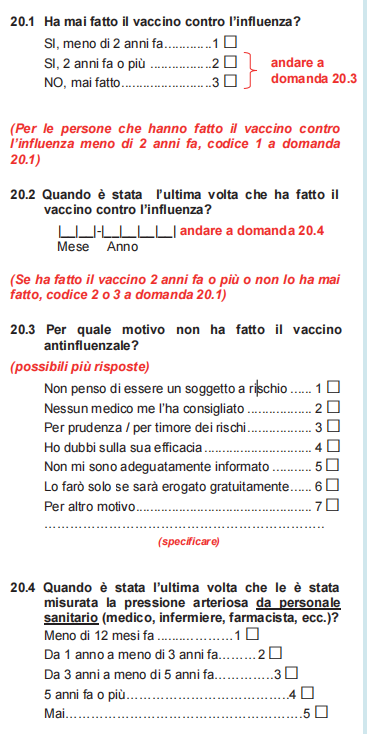

In [332]:
df['PA1'].value_counts()

PA1
 3    31815
 1     9202
 2     3649
-3      757
-1      507
Name: count, dtype: int64

In [333]:
5028 + 2493 + 4786 + 20576
# df['PA1'].value_counts()
9202 + 757 + 507 # not applicable in any MONOVAC

10466

In [334]:
df_finale["monovac_non_a_rischio"] = (df["MONOVAC1"] == 1).astype(int)
df_finale["monovac_non_consigliato"] = (df["MONOVAC2"] == 1).astype(int)
df_finale["monovac_paura_rischi"] = (df["MONOVAC3"] == 1).astype(int)
df_finale["monovac_dubbi_efficacia"] = (df["MONOVAC4"] == 1).astype(int)
df_finale["monovac_altro"] = (df["MONOVAC7"] == 1).astype(int)
df_finale['vaccino_ultimi_due_anni'] = (df['PA1'] == 1).astype(int)
df_finale['vaccino_piu_di_due_anni'] = (df['PA1'] == 2).astype(int)
df_finale['mai_vaccinato'] = (df['PA1'] == 3).astype(int)

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\3994480033.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["monovac_non_a_rischio"] = (df["MONOVAC1"] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\3994480033.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["monovac_non_consigliato"] = (df["MONOVAC2"] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\3994480033.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

### Diagnosi Mediche

In [335]:
df_finale

WGT  PROXY  famiglia_1_bambino  famiglia_2+_bambini  \
0      1054.076      1                   0                    0   
1      1054.076      1                   0                    0   
2      1264.041      1                   0                    0   
3      1264.041      1                   0                    0   
4      1264.041      1                   0                    0   
...         ...    ...                 ...                  ...   
45925   609.352      1                   0                    0   
45926   475.785      1                   0                    0   
45927   475.785      1                   0                    0   
45928   968.754      1                   0                    0   
45929   968.754      1                   0                    0   

       relazione_nipote_figlio  relazione_nipote_fratello  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   
...                        ...                        ...   
45925                        0                          0   
45926                        0                          0   
45927                        0                          0   
45928                        0                          0   
45929                        0                          0   

       relazione_fratello_sorella  relazione_fratello_coniuge  \
0                               0                           0   
1                               0                           0   
2                               0                           0   
3                               0                           0   
4                               0                           0   
...                           ...                         ...   
45925                           0                           0   
45926                           0                           0   
45927                           0                           0   
45928                           0                           0   
45929                           0                           0   

       relazione_coniuge_fratello  relazione_convivente_fratello  ...  \
0                               0                              0  ...   
1                               0                              0  ...   
2                               0                              0  ...   
3                               0                              0  ...   
4                               0                              0  ...   
...                           ...                            ...  ...   
45925                           0                              0  ...   
45926                           0                              0  ...   
45927                           0                              0  ...   
45928                           0                              0  ...   
45929                           0                              0  ...   

       aspesas_ticket  aspesas_intera  monovac_non_a_rischio  \
0                   0               0                      0   
1                   0               0                      0   
2                   1               0                      0   
3                   0               0                      0   
4                   0               0                      0   
...               ...             ...                    ...   
45925               0               0                      0   
45926               1               0                      1   
45927               0               0                      0   
45928               0               0                      0   
45929               0               0                      0   

       monovac_non_consigliato  monovac_paura_r

In [336]:
df['PA2'].value_counts()

PA2
 1    27323
 2     9841
 5     3336
 3     2537
 4     2165
-3      728
Name: count, dtype: int64

In [337]:
variabili_ordinali = ["PA2", "PA3", "PA4", "PA5", "PA6"]

for var in variabili_ordinali:
    # Mantieni solo valori validi (1-5), trasforma in ordinale
    df_finale[f"{var.lower()}_tempo_ultimo_controllo"] = df[var].replace({
        -3: 0 })

# df_finale[["pa2_tempo_ultimo_controllo"]].value_counts()
# smaller is better

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\2521881395.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale[f"{var.lower()}_tempo_ultimo_controllo"] = df[var].replace({
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\2521881395.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale[f"{var.lower()}_tempo_ultimo_controllo"] = df[var].replace({
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\2521881395.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

### Altre Dipendenze

In [338]:
# AM7 – Assistenza domiciliare
df_finale["am7_assistenza_domiciliare"] = (df["AM7"] == 1).astype(int)
df_finale["no_am7_assistenza_domiciliare"] = (df["AM7"] == 2).astype(int)

# MD1 – Farmaci prescritti
df_finale["md1_farmaci_prescritti"] = (df["MD1"] == 1).astype(int)
df_finale["no_md1_farmaci_prescritti"] = (df["MD1"] == 2).astype(int)

# MD2 – Farmaci non prescritti
df_finale["md2_farmaci_non_prescritti"] = (df["MD2"] == 1).astype(int)
df_finale["no_md2_farmaci_non_prescritti"] = (df["MD2"] == 2).astype(int)

# ABUSO – Abuso giornaliero
df_finale["abuso_alcol"] = (df["ABUSO"] == 1).astype(int)
df_finale["no_abuso_alcol"] = (df["ABUSO"] == 2).astype(int)

# RISCHIO – Consumo a rischio
df_finale["rischio_alcol"] = (df["RISCHIO"] == 1).astype(int)
df_finale["no_rischio_alcol"] = (df["RISCHIO"] == 2).astype(int)


C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1280532838.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["am7_assistenza_domiciliare"] = (df["AM7"] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1280532838.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["no_am7_assistenza_domiciliare"] = (df["AM7"] == 2).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1280532838.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.i

### Essere Mamma

In [339]:
df["INDMAM"].value_counts()

INDMAM
-2    28950
 1     8832
 2     4310
 3     1850
 4     1589
-1      233
 5      166
Name: count, dtype: int64

In [340]:
# MAMSINT: Mammografia senza sintomi – dummies
df_finale["mammografia_senza_sintomi"] = (df["MAMSINT"] ==1).astype(int)
df_finale["mammografia_con_sintomi"] = (df["MAMSINT"] == 2).astype(int)

# INDMAM: Motivazione dell'ultima mammografia – dummies
indmam_labels = {
    1: 'su_invito_screening_pubblico',
    2: 'iniziativa_personale',
    3: 'consiglio_medico_generico',
    4: 'consiglio_specialista',
    5: 'altro_motivo'
}
for code, label in indmam_labels.items():
    df_finale[f"motivo_mammografia_{label}"] = (df["INDMAM"] == code).astype(int)

# CETAMAM: Età alla prima mammografia – ordinal 1–14, else 0
df_finale["eta_prima_mammografia"] = pd.to_numeric(df["CETAMAM"], errors="coerce").fillna(0).astype(int)
df_finale["eta_prima_mammografia"] = df_finale["eta_prima_mammografia"].where(
    df_finale["eta_prima_mammografia"].between(1, 14), 0
)

# NMAMMO: Frequenza della mammografia – ordinal 1–4, else 0
df_finale["frequenza_mammografia"] = pd.to_numeric(df["NMAMMO"], errors="coerce").fillna(0).astype(int)
df_finale["frequenza_mammografia"] = df_finale["frequenza_mammografia"].where(
    df_finale["frequenza_mammografia"].between(1, 4), 0
)


C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\3384248267.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["mammografia_senza_sintomi"] = (df["MAMSINT"] ==1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\3384248267.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["mammografia_con_sintomi"] = (df["MAMSINT"] == 2).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\3384248267.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

### Test Malattie (Pap-test / HPV)

In [341]:
# PA8: Quando ha fatto l'ultima volta il pap-test?
df_finale["ultimo_paptest"] = pd.to_numeric(df["PA8"], errors="coerce").fillna(0).astype(int)
df_finale["ultimo_paptest"] = df_finale["ultimo_paptest"].where(df_finale["ultimo_paptest"].between(1, 5), 0)

# PA89: Ultimo pap-test o HPV
df_finale["ultimo_paptest_o_hpv"] = pd.to_numeric(df["PA89"], errors="coerce").fillna(0).astype(int)
df_finale["ultimo_paptest_o_hpv"] = df_finale["ultimo_paptest_o_hpv"].where(df_finale["ultimo_paptest_o_hpv"].between(1, 5), 0)
# Unfortunately there is no way to isolate the HPV test from the pap-test, so we will keep them together

# CETAPAPH: Età al primo pap-test o HPV – ordinal 1–14, else 0
df_finale["eta_primo_paptest_o_hpv"] = pd.to_numeric(df["CETAPAPH"], errors="coerce").fillna(0).astype(int)
df_finale["eta_primo_paptest_o_hpv"] = df_finale["eta_primo_paptest_o_hpv"].where(df_finale["eta_primo_paptest_o_hpv"].between(1, 14), 0)

# NPAPHPV: Frequenza dei controlli successivi – ordinal 1–4, else 0
df_finale["frequenza_controlli_paptest_o_hpv"] = pd.to_numeric(df["NPAPHPV"], errors="coerce").fillna(0).astype(int)
df_finale["frequenza_controlli_paptest_o_hpv"] = df_finale["frequenza_controlli_paptest_o_hpv"].where(df_finale["frequenza_controlli_paptest_o_hpv"].between(1, 4), 0)

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\2725381393.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["ultimo_paptest"] = pd.to_numeric(df["PA8"], errors="coerce").fillna(0).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\2725381393.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["ultimo_paptest_o_hpv"] = pd.to_numeric(df["PA89"], errors="coerce").fillna(0).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\2725381393.py:11: PerformanceWarning: DataFrame is highly fragment

In [342]:
# Dummies per UN1A – ritardi per lista d’attesa
df_finale["ha_ritardi_lista_attesa"] = (df["UN1A"] == 1).astype(int)
df_finale["no_ritardi_lista_attesa"] = (df["UN1A"] == 2).astype(int)
df_finale["nessun_bisogno_lista_attesa"] = (df["UN1A"] == 3).astype(int)

# Dummies per UN1B – ritardi per trasporto o distanza
df_finale["ha_ritardi_trasporto_distanza"] = (df["UN1B"] == 1).astype(int)
df_finale["no_ritardi_trasporto_distanza"] = (df["UN1B"] == 2).astype(int)
df_finale["nessun_bisogno_trasporto_distanza"] = (df["UN1B"] == 3).astype(int)


C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1255771738.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["ha_ritardi_lista_attesa"] = (df["UN1A"] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1255771738.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["no_ritardi_lista_attesa"] = (df["UN1A"] == 2).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\1255771738.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

### Assistenza

In [343]:
df['UN2A'].value_counts()

UN2A
 2    24812
 3    17850
 1     2281
-3      987
Name: count, dtype: int64

In [344]:
# SS1: Persone su cui contare – ordinal 1 (nessuna) a 4 (molte)
df_finale["supporto_sociale_quanti"] = pd.to_numeric(df["SS1"], errors="coerce").fillna(0).astype(int)
df_finale["supporto_sociale_quanti"] = df_finale["supporto_sociale_quanti"].where(df_finale["supporto_sociale_quanti"].between(1, 4), 0)

# SS2: Quanto gli altri sono attenti – ordinal 1 (molto) a 5 (nessuno)
df_finale["supporto_sociale_percepito"] = pd.to_numeric(df["SS2"], errors="coerce").fillna(0).astype(int)
df_finale["supporto_sociale_percepito"] = df_finale["supporto_sociale_percepito"].where(df_finale["supporto_sociale_percepito"].between(1, 5), 0)

# SS3: Aiuto dai vicini – ordinal 1 (molto facile) a 5 (molto difficile)
df_finale["facilita_aiuto_vicini"] = pd.to_numeric(df["SS3"], errors="coerce").fillna(0).astype(int)
df_finale["facilita_aiuto_vicini"] = df_finale["facilita_aiuto_vicini"].where(df_finale["facilita_aiuto_vicini"].between(1, 5), 0)

# IC1: Si prende cura di qualcuno – dummies
df_finale["cura_settimanale_yes"] = (df["IC1"] == 1).astype(int)
df_finale["cura_settimanale_no"] = (df["IC1"] == 2).astype(int)

# IC2: Chi assiste – dummies
df_finale["cura_familiari"] = (df["IC2"] == 1).astype(int)
df_finale["cura_non_familiari"] = (df["IC2"] == 2).astype(int)

# IC3: Ore dedicate all’assistenza – ordinal 1–3
df_finale["ore_settimanali_assistenza"] = pd.to_numeric(df["IC3"], errors="coerce").fillna(0).astype(int)
df_finale["ore_settimanali_assistenza"] = df_finale["ore_settimanali_assistenza"].where(df_finale["ore_settimanali_assistenza"].between(1, 3), 0)


C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\3403995541.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["supporto_sociale_quanti"] = pd.to_numeric(df["SS1"], errors="coerce").fillna(0).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\3403995541.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["supporto_sociale_percepito"] = pd.to_numeric(df["SS2"], errors="coerce").fillna(0).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\3403995541.py:10: PerformanceWarning: DataFrame is h

### Altro

In [345]:
# EVDOL: Evento doloroso negli ultimi 3 anni → dummies
df_finale["evento_doloroso_yes"] = (df["EVDOL"] == 1).astype(int)
df_finale["evento_doloroso_no"] = (df["EVDOL"] == 2).astype(int)

# VALSSN: Valutazione SSN → ordinal 1 (migliora) a 3 (peggiora), 4=non so → 0
df_finale["valutazione_ssn"] = pd.to_numeric(df["VALSSN"], errors="coerce").fillna(0).astype(int)
df_finale["valutazione_ssn"] = df_finale["valutazione_ssn"].where(df_finale["valutazione_ssn"].between(1, 3), 0)

# RISECO: Giudizio sulle risorse economiche → ordinal 1 (ottime) a 4 (insufficienti)
df_finale["giudizio_risorse_economiche"] = pd.to_numeric(df["RISECO"], errors="coerce").fillna(0).astype(int)
df_finale["giudizio_risorse_economiche"] = df_finale["giudizio_risorse_economiche"].where(
    df_finale["giudizio_risorse_economiche"].between(1, 4), 0
)

C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\2700013181.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["evento_doloroso_yes"] = (df["EVDOL"] == 1).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\2700013181.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_finale["evento_doloroso_no"] = (df["EVDOL"] == 2).astype(int)
C:\Users\emanu\AppData\Local\Temp\ipykernel_3148\2700013181.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many ti

In [346]:
# Salva il DataFrame finale in un file XSLX
output_path = r"EHIS_2019_IT\MICRODATI\EHIS_2019_IT_finale.csv"
df_finale.to_csv(output_path, index=False, encoding='utf-8-sig')

In [347]:
df_finale.shape

(45930, 405)

In [348]:
# check missing values, return col with nans
def check_missing_values(df):
    missing_cols = df.columns[df.isnull().any()].tolist()
    return {col: df[col].isnull().sum() for col in missing_cols}

missing_values = check_missing_values(df_finale)
missing_values

{'dolore_intensita': 1049,
 'dolore_interferenza': 1049,
 'MH1A_ord': 1185,
 'MH1B_ord': 1185,
 'MH1C_ord': 1185,
 'MH1D_ord': 1185,
 'MH1E_ord': 1185,
 'MH1F_ord': 1185,
 'MH1G_ord': 1185,
 'MH1H_ord': 1185,
 'ho12_notti_ospedale': 960}